In [8]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import seaborn as sns
sns.set(rc={'figure.figsize':(15,10)})

import yfinance as yf

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score

In [9]:
def Result(Symbol):
    data = yf.download(Symbol, start='2016-01-02', end='2021-2-22')
    
    data['Return'] = np.log(data['Adj Close'] / data['Adj Close'].shift())
    data.dropna(inplace=True)
    data['Target'] = (data['Return']>0).astype(int)

    data_train = data.loc[:'2020-2-3'].shift().dropna()
    data_test = data.loc['2020-2-3':].shift().dropna()

    X = data.loc[:]
    X_train = data_train.loc[:'2020-2-3',:'Volume']
    X_test = data_test.loc['2020-2-3':,:'Volume']

    y = data['Target'].dropna()
    y_train = data_train['Target'].loc[:'2020-2-3']
    y_test = data_test['Target'].loc['2020-2-3':]
    
    model_2 = Pipeline([('scl', StandardScaler()),
                        ('clf', SVC(C=68.66, gamma=1.29, cache_size=5000))])
    model_2.fit(X_test, y_test)

    data_test['Pred'] = model_2.predict(X_test)
    pred_2 = data_test['Pred']
    data_test['Strategy'] = data_test['Return'] * data_test['Pred']

    #删掉引号跑图
    data_test[['Return', 'Strategy']].cumsum().plot()
    (data_test['Return'] * data_test['Target']).cumsum().plot(label=r'Actual')
    plt.legend()
    plt.ylabel('Alpha Factor Return')
    plt.title('Testing Dataset Result'+
              str('  RMSE: %0.3f' % mean_squared_error(y_test, pred_2, squared=False))+
              str('  R^2 Score: %0.3f' % r2_score(y_test, pred_2)))
    
    
    print(Symbol+
          str('  RMSE: %0.3f' % mean_squared_error(y_test, pred_2, squared=False))+
          str('  R^2 Score: %0.3f' % r2_score(y_test, pred_2)))

[*********************100%***********************]  1 of 1 completed
AAPL  RMSE: 0.261  R^2 Score: 0.726


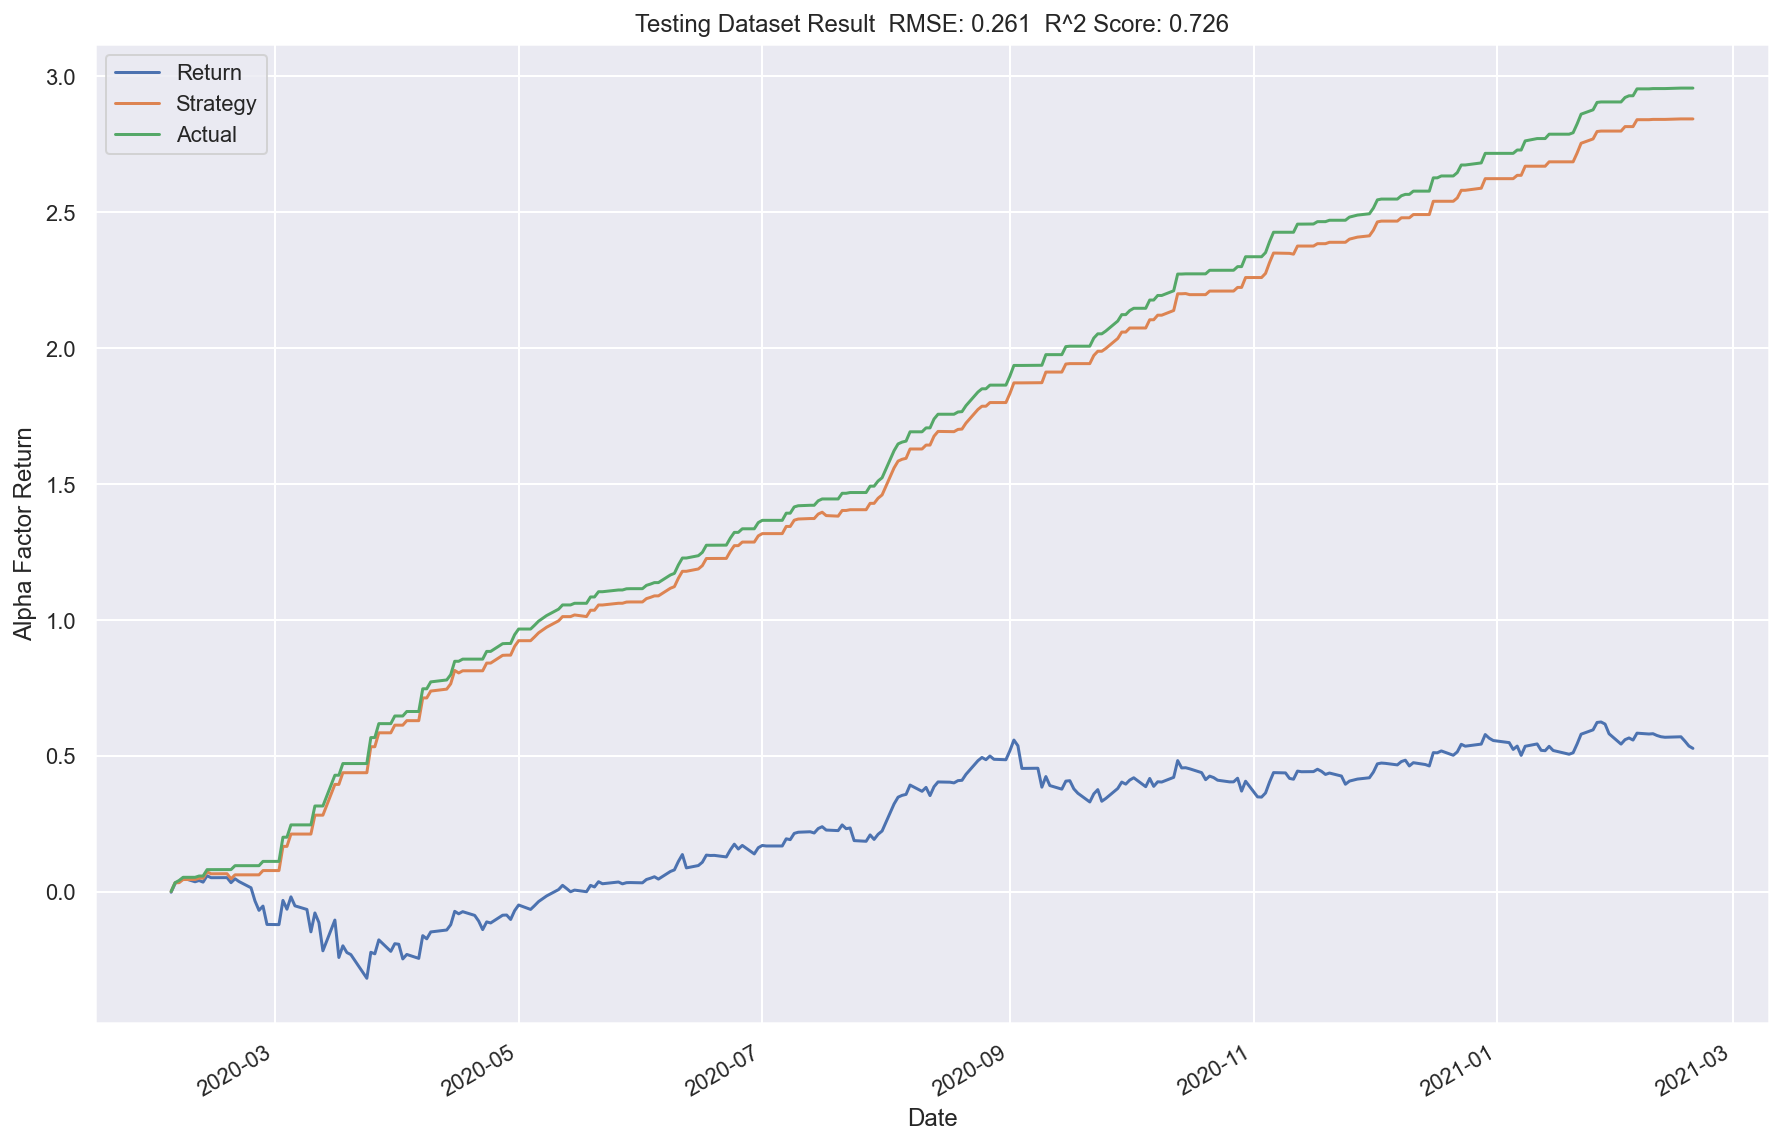

In [10]:
Result('AAPL')

[*********************100%***********************]  1 of 1 completed
601012.SS  RMSE: 0.306  R^2 Score: 0.621
[*********************100%***********************]  1 of 1 completed
601138.SS  RMSE: 0.250  R^2 Score: 0.749
[*********************100%***********************]  1 of 1 completed
603501.SS  RMSE: 0.188  R^2 Score: 0.859


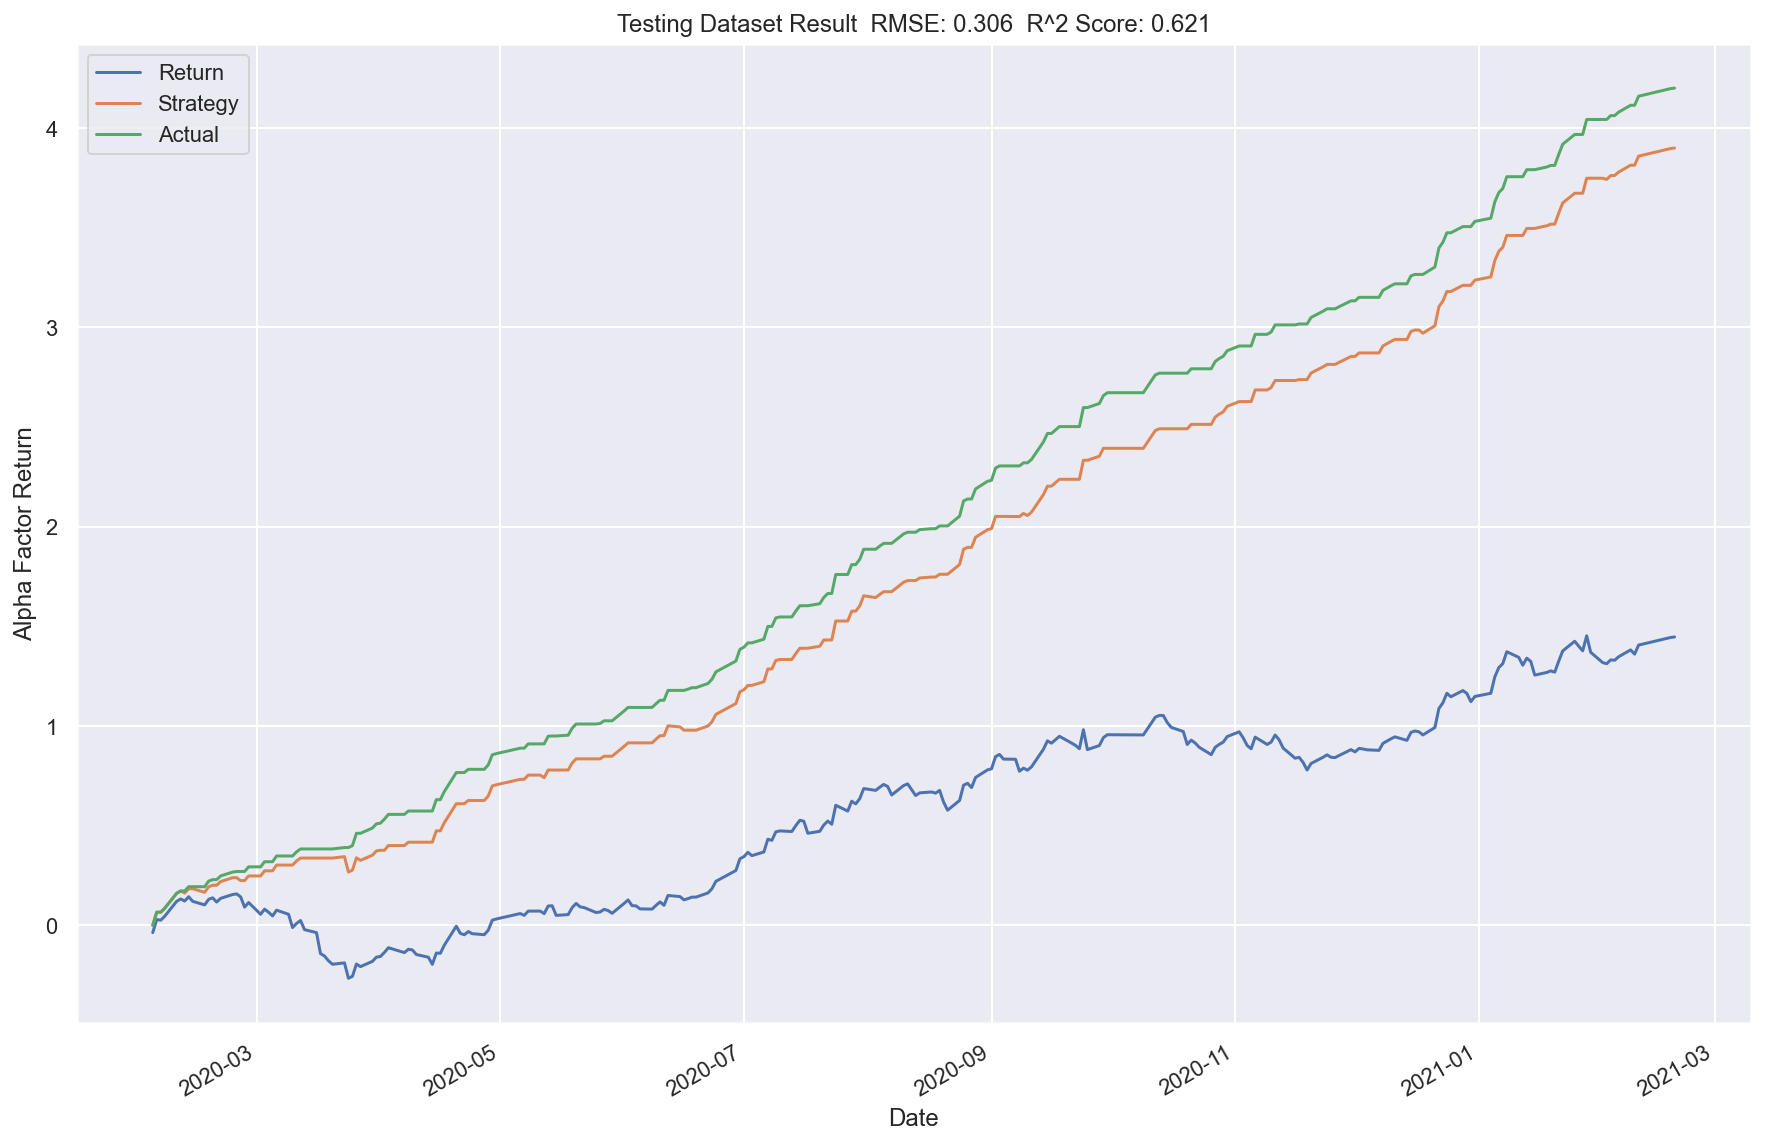

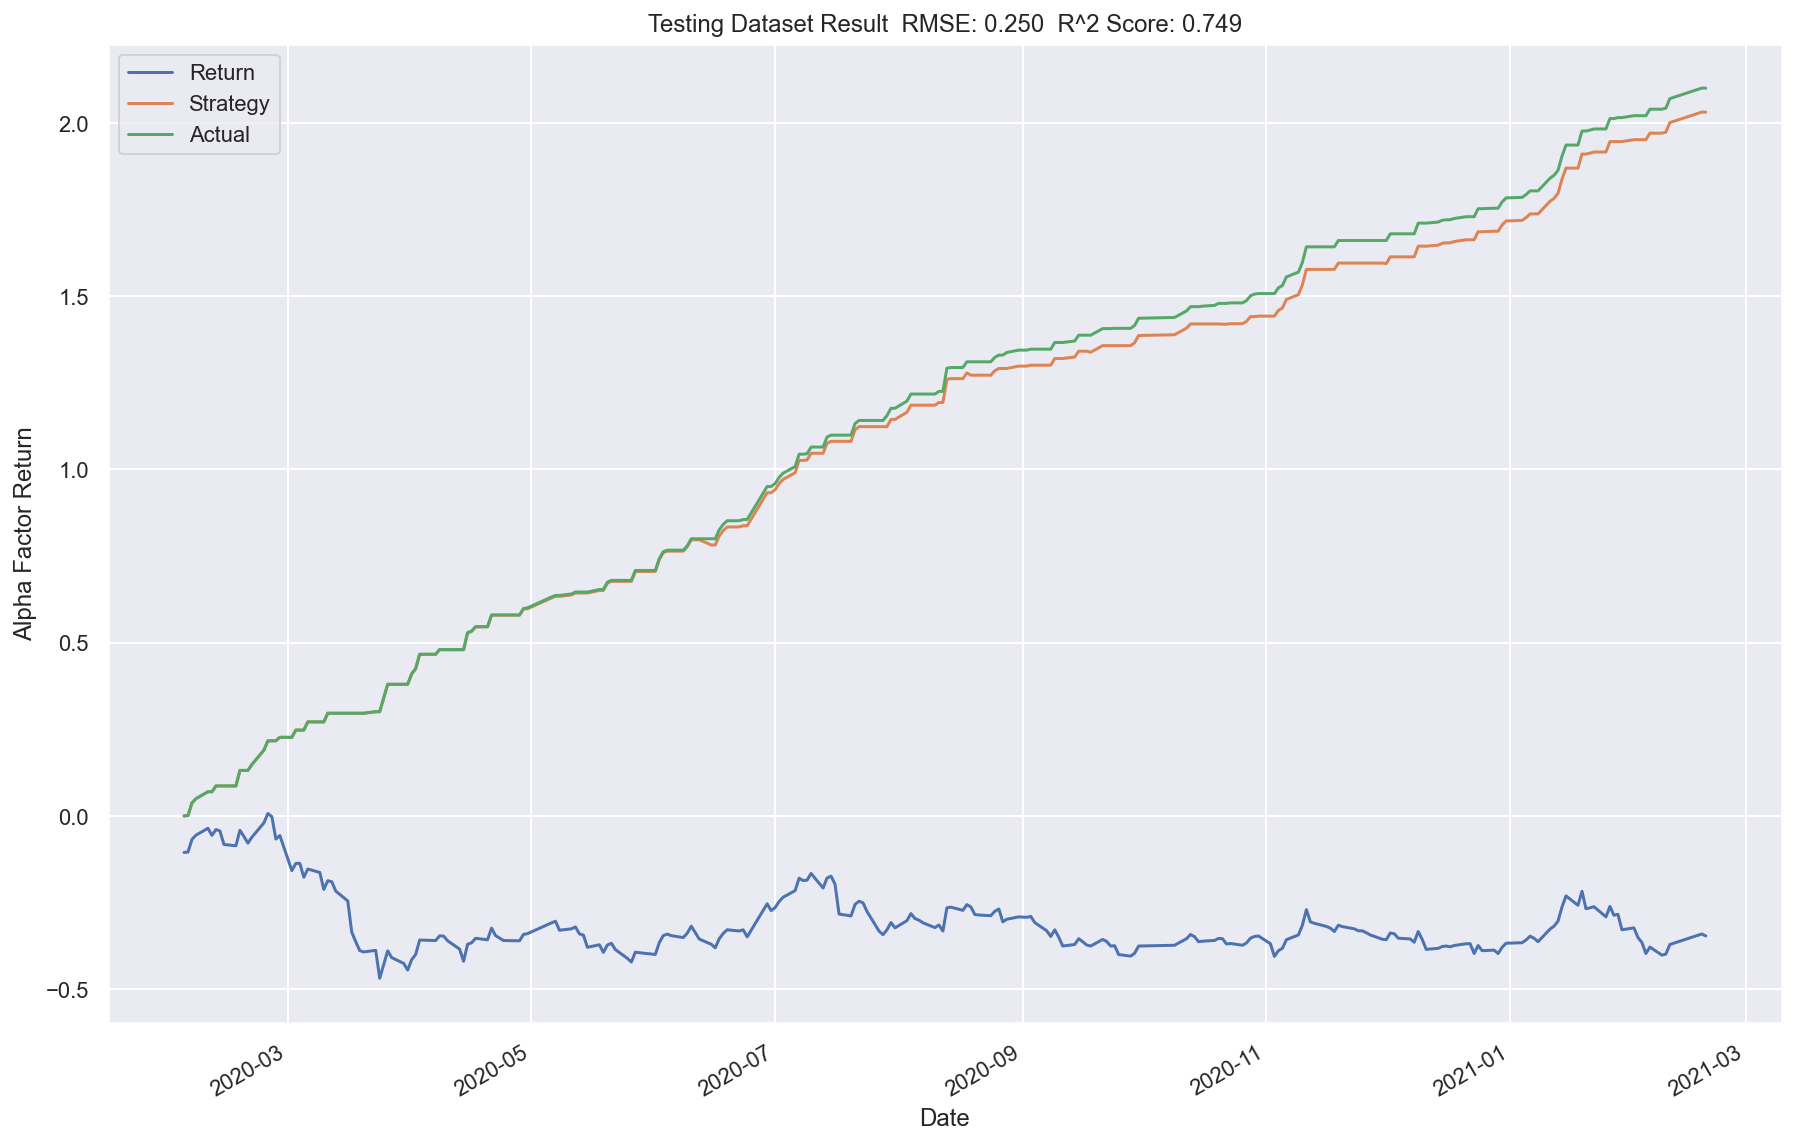

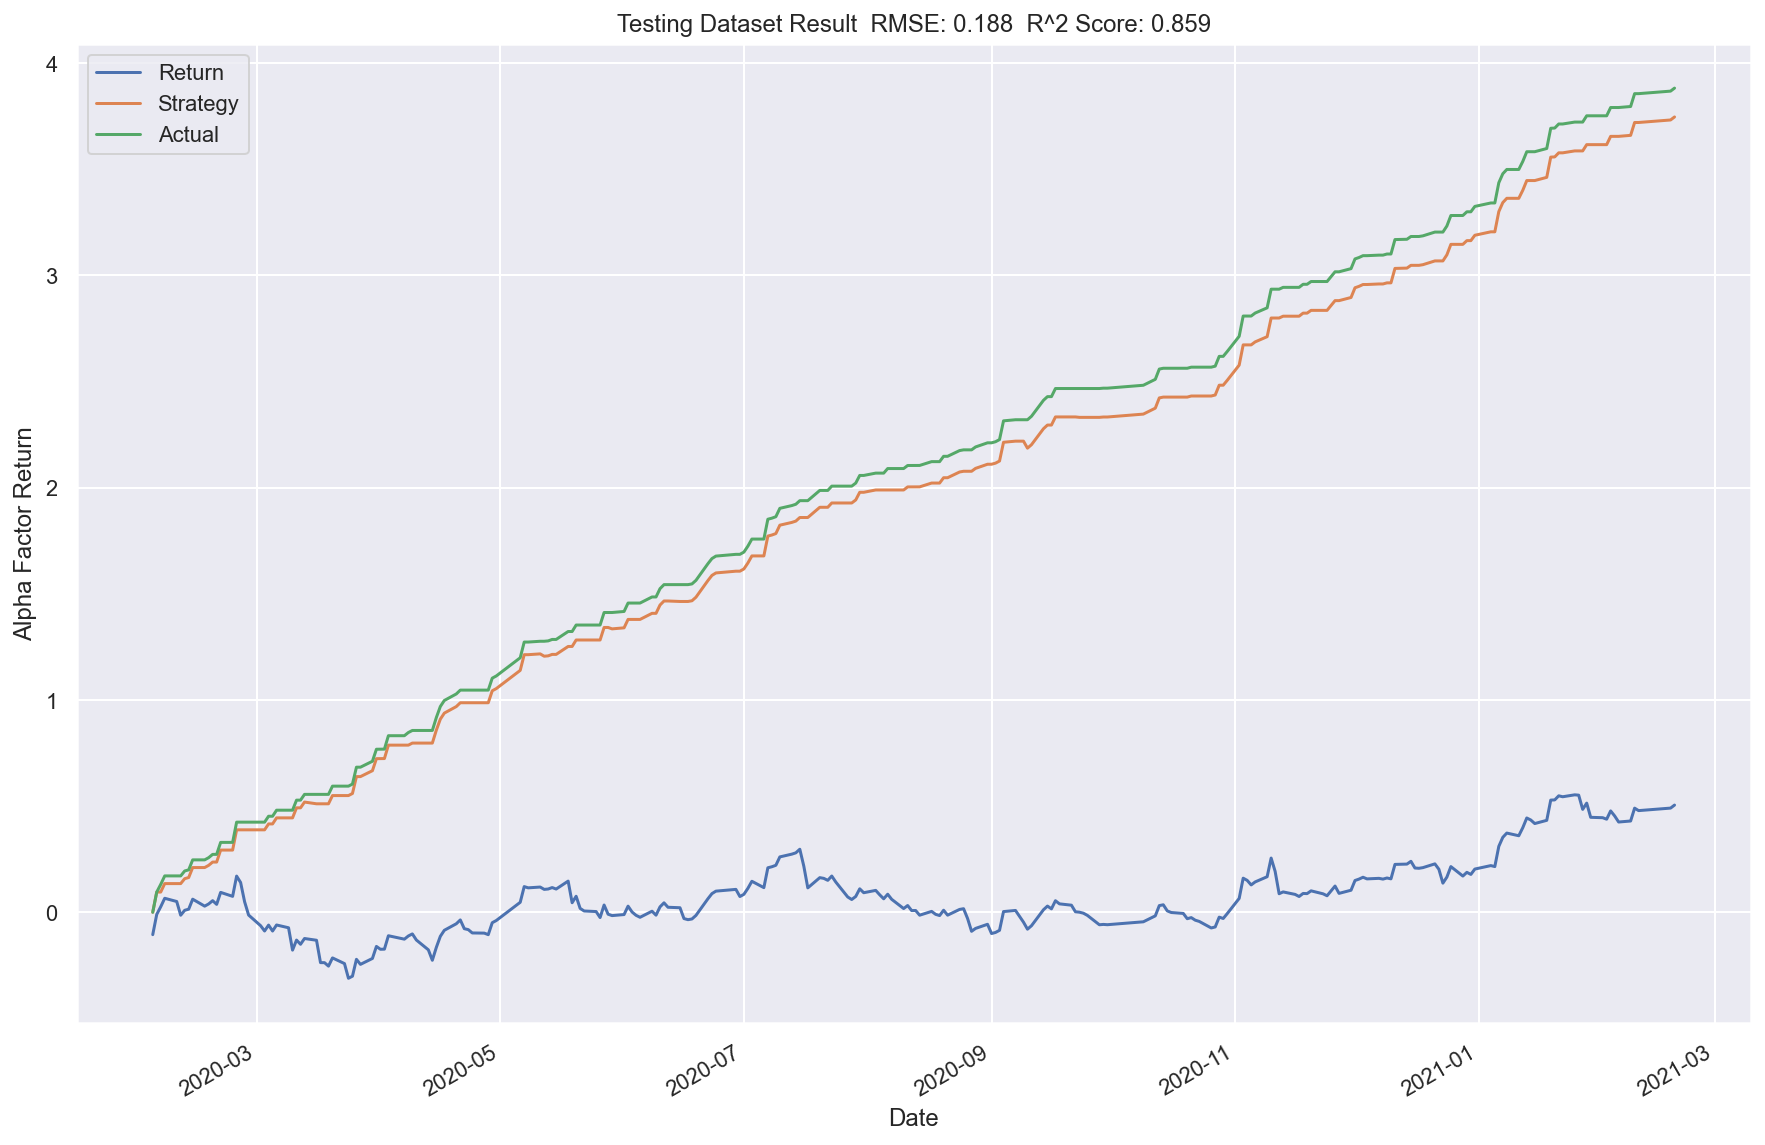

In [18]:
Dict = {
    'Basic_Materials' : ['BHP','LIN','RIO'],
    'Communication' : ['GOOG','FB','DIS'],
    'Consumer_Cyclical' : ['AMZN','BABA','TSLA'],
    'Consumer_Defensive' : ['WMT','PG','UL'],
    'Energy' : ['XOM','CVX','RDS-A'],
    'Financial' : ['BRK-A','JPM','V'],
    'Healthcase' : ['JNJ','UNH','ABT'],
    'Industrials' : ['HON','UNP','UPS'],
    'Real_Estate' : ['AMT','BEKE','PLD'],
    'Technology' : ['MSFT','NVDA','INTC','ADBE','CRM'],
    'Utilities' : ['NEE','DUK-PA','SO'],
    'HK_Hardware' : ['0992.HK','2018.HK','0148.HK'],
    'HK_Software' : ['0700.HK','0241.HK','0268.HK'],
    'SZ_Technology' : ['000333.SZ','002415.SZ','000651.SZ'],
    'SS_Technology' : ['601012.SS','601138.SS','603501.SS']
}

#for one Specific industry
for Symbol in Dict['SS_Technology']:
    Result(Symbol)

[*********************100%***********************]  1 of 1 completed
BHP  RMSE: 0.408  R^2 Score: 0.332
[*********************100%***********************]  1 of 1 completed
LIN  RMSE: 0.374  R^2 Score: 0.439
[*********************100%***********************]  1 of 1 completed
RIO  RMSE: 0.369  R^2 Score: 0.453
[*********************100%***********************]  1 of 1 completed
GOOG  RMSE: 0.246  R^2 Score: 0.751
[*********************100%***********************]  1 of 1 completed
FB  RMSE: 0.268  R^2 Score: 0.710
[*********************100%***********************]  1 of 1 completed
DIS  RMSE: 0.326  R^2 Score: 0.576
[*********************100%***********************]  1 of 1 completed
AMZN  RMSE: 0.174  R^2 Score: 0.877
[*********************100%***********************]  1 of 1 completed
BABA  RMSE: 0.364  R^2 Score: 0.467
[*********************100%***********************]  1 of 1 completed
TSLA  RMSE: 0.389  R^2 Score: 0.381
[*********************100%***********************]  1 of 1 co

/Users/perrywu/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


[*********************100%***********************]  1 of 1 completed
HON  RMSE: 0.282  R^2 Score: 0.680
[*********************100%***********************]  1 of 1 completed
UNP  RMSE: 0.268  R^2 Score: 0.709
[*********************100%***********************]  1 of 1 completed
UPS  RMSE: 0.369  R^2 Score: 0.454
[*********************100%***********************]  1 of 1 completed
AMT  RMSE: 0.163  R^2 Score: 0.894
[*********************100%***********************]  1 of 1 completed
BEKE  RMSE: 0.125  R^2 Score: 0.938
[*********************100%***********************]  1 of 1 completed
PLD  RMSE: 0.289  R^2 Score: 0.662
[*********************100%***********************]  1 of 1 completed
MSFT  RMSE: 0.246  R^2 Score: 0.752
[*********************100%***********************]  1 of 1 completed
TSM  RMSE: 0.337  R^2 Score: 0.540
[*********************100%***********************]  1 of 1 completed
NVDA  RMSE: 0.222  R^2 Score: 0.799
[*********************100%***********************]  1 of 1 co

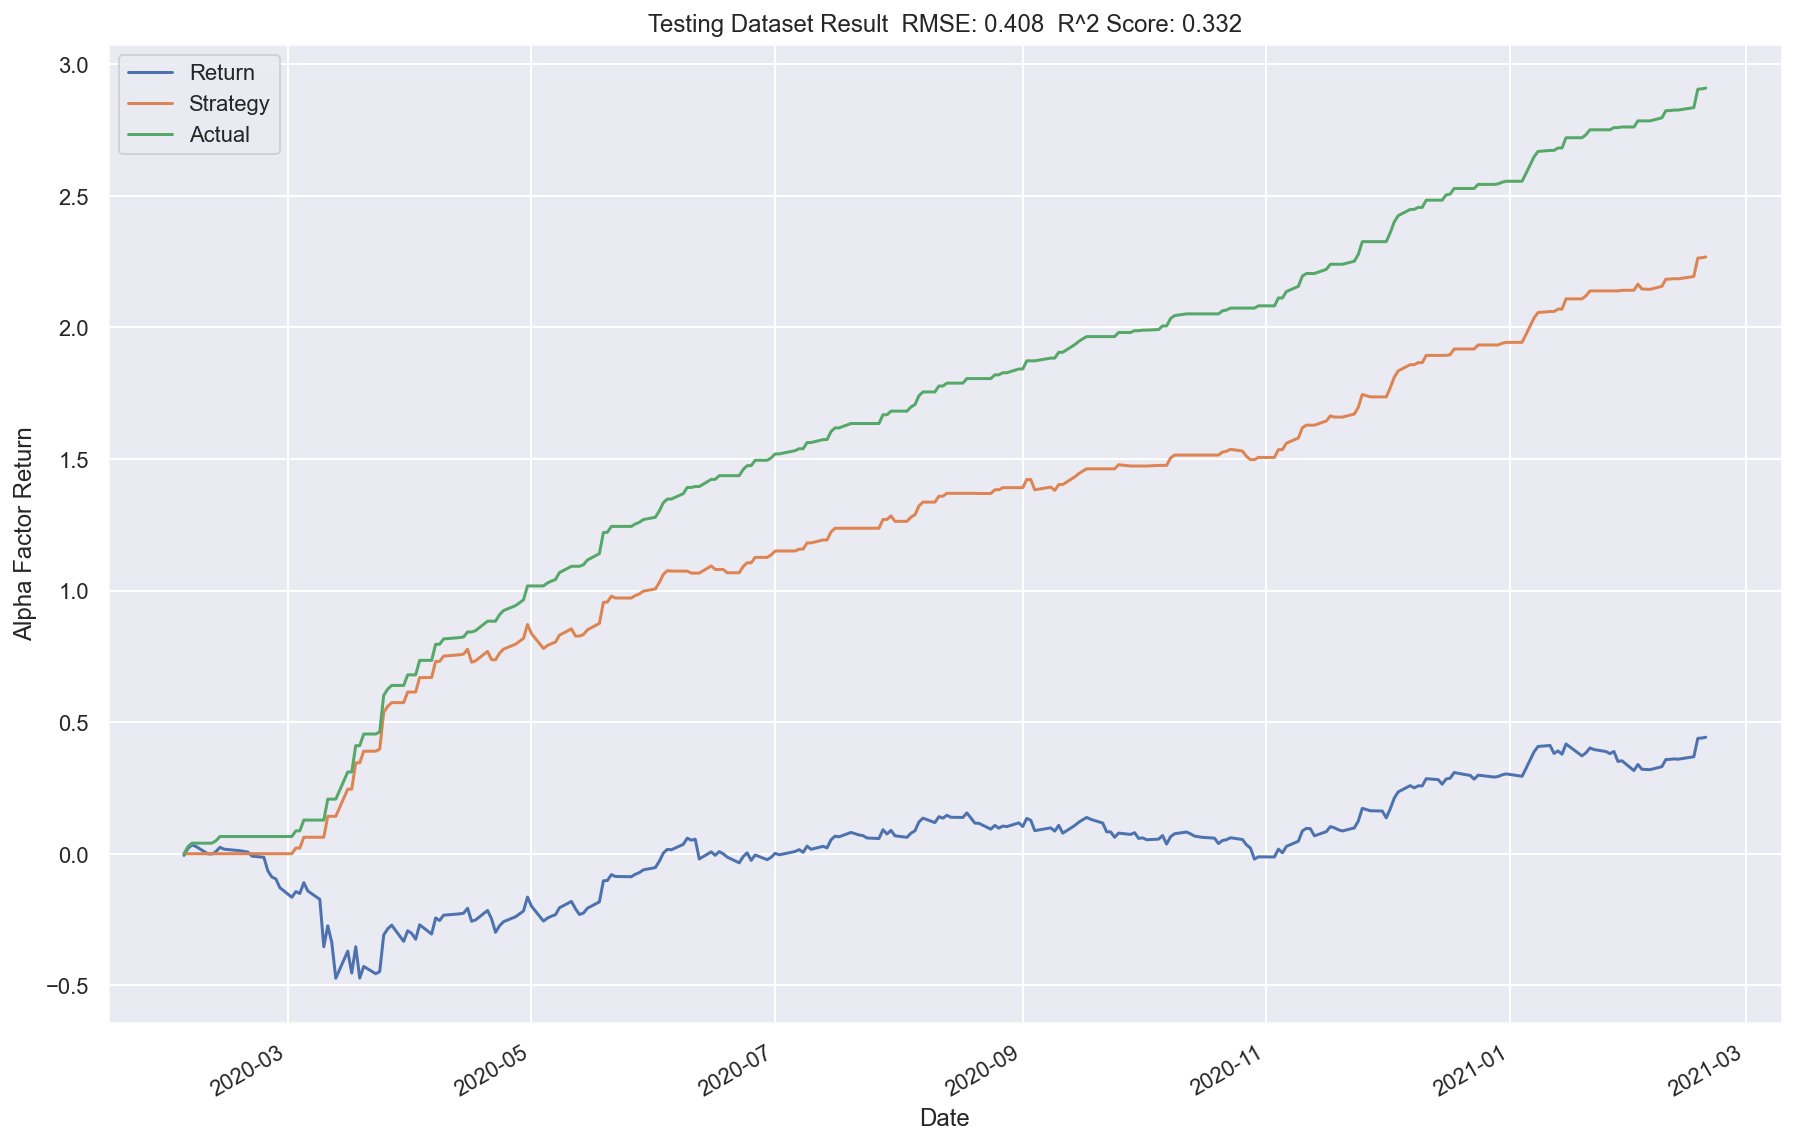

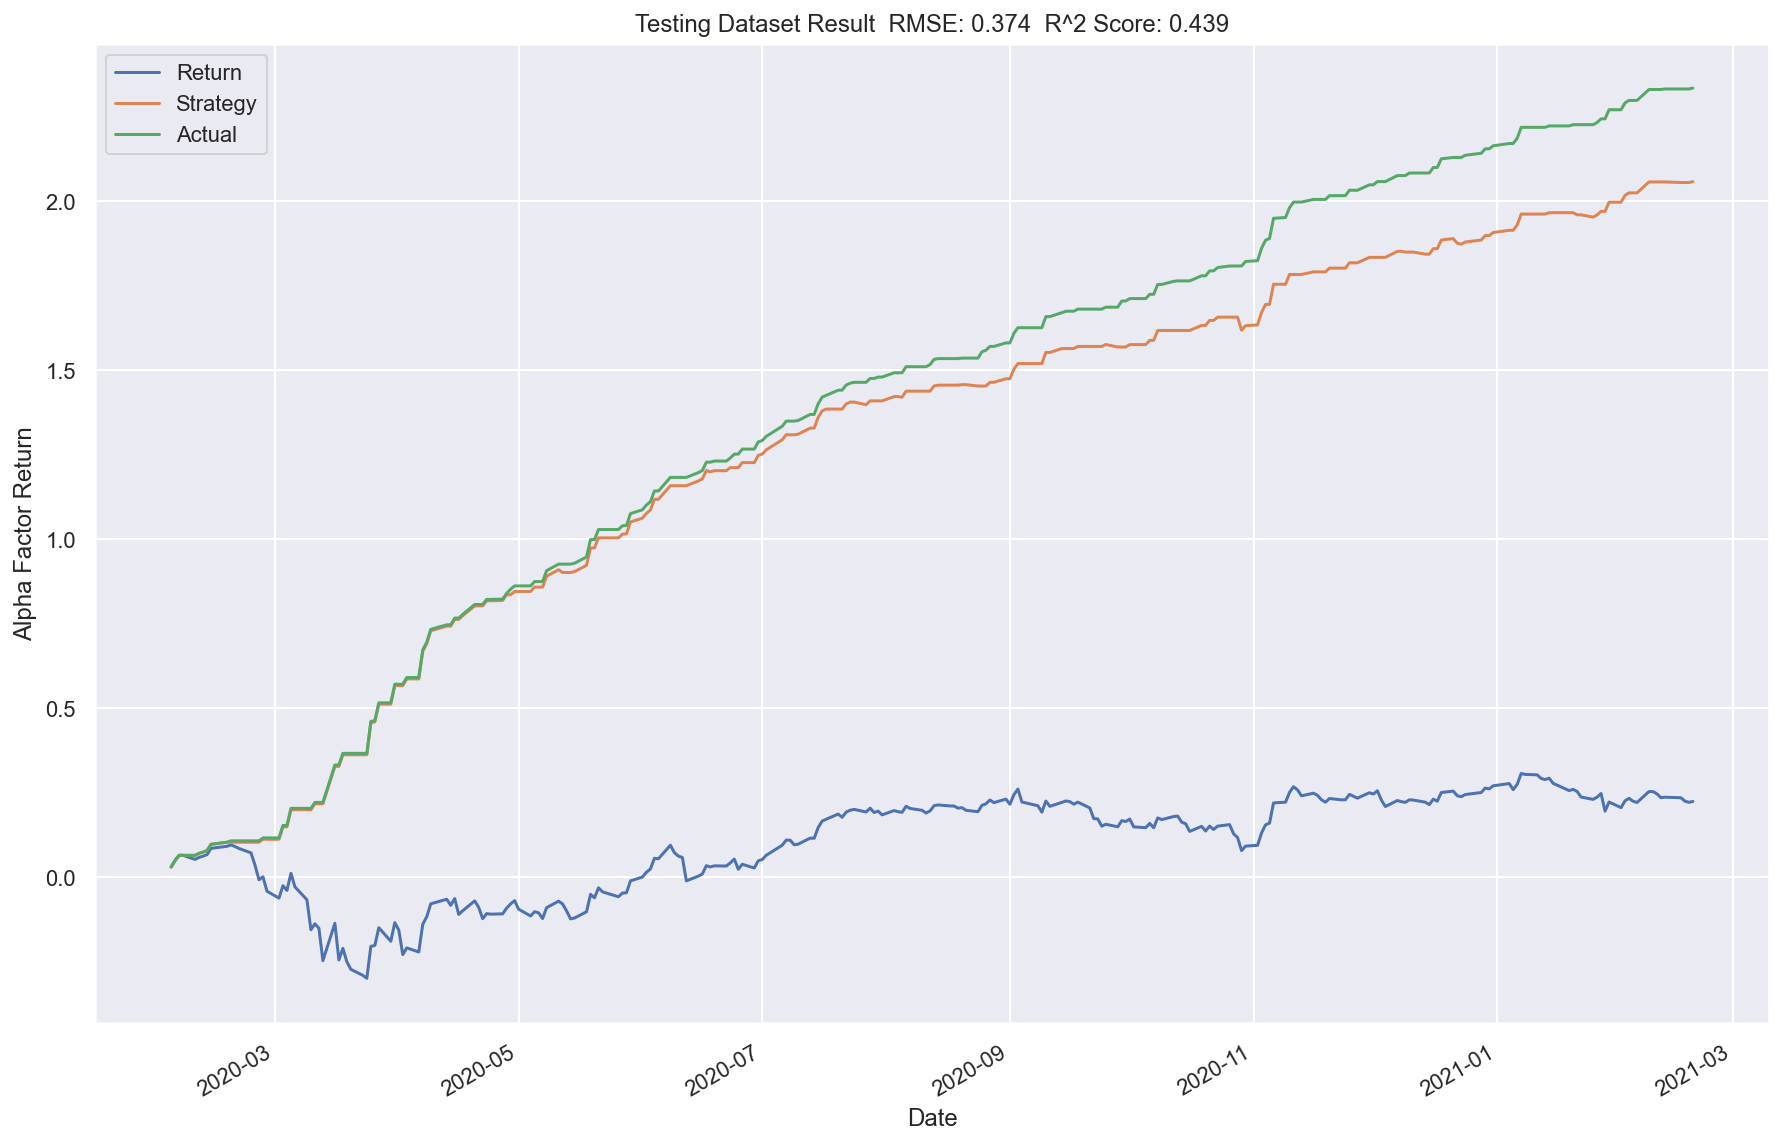

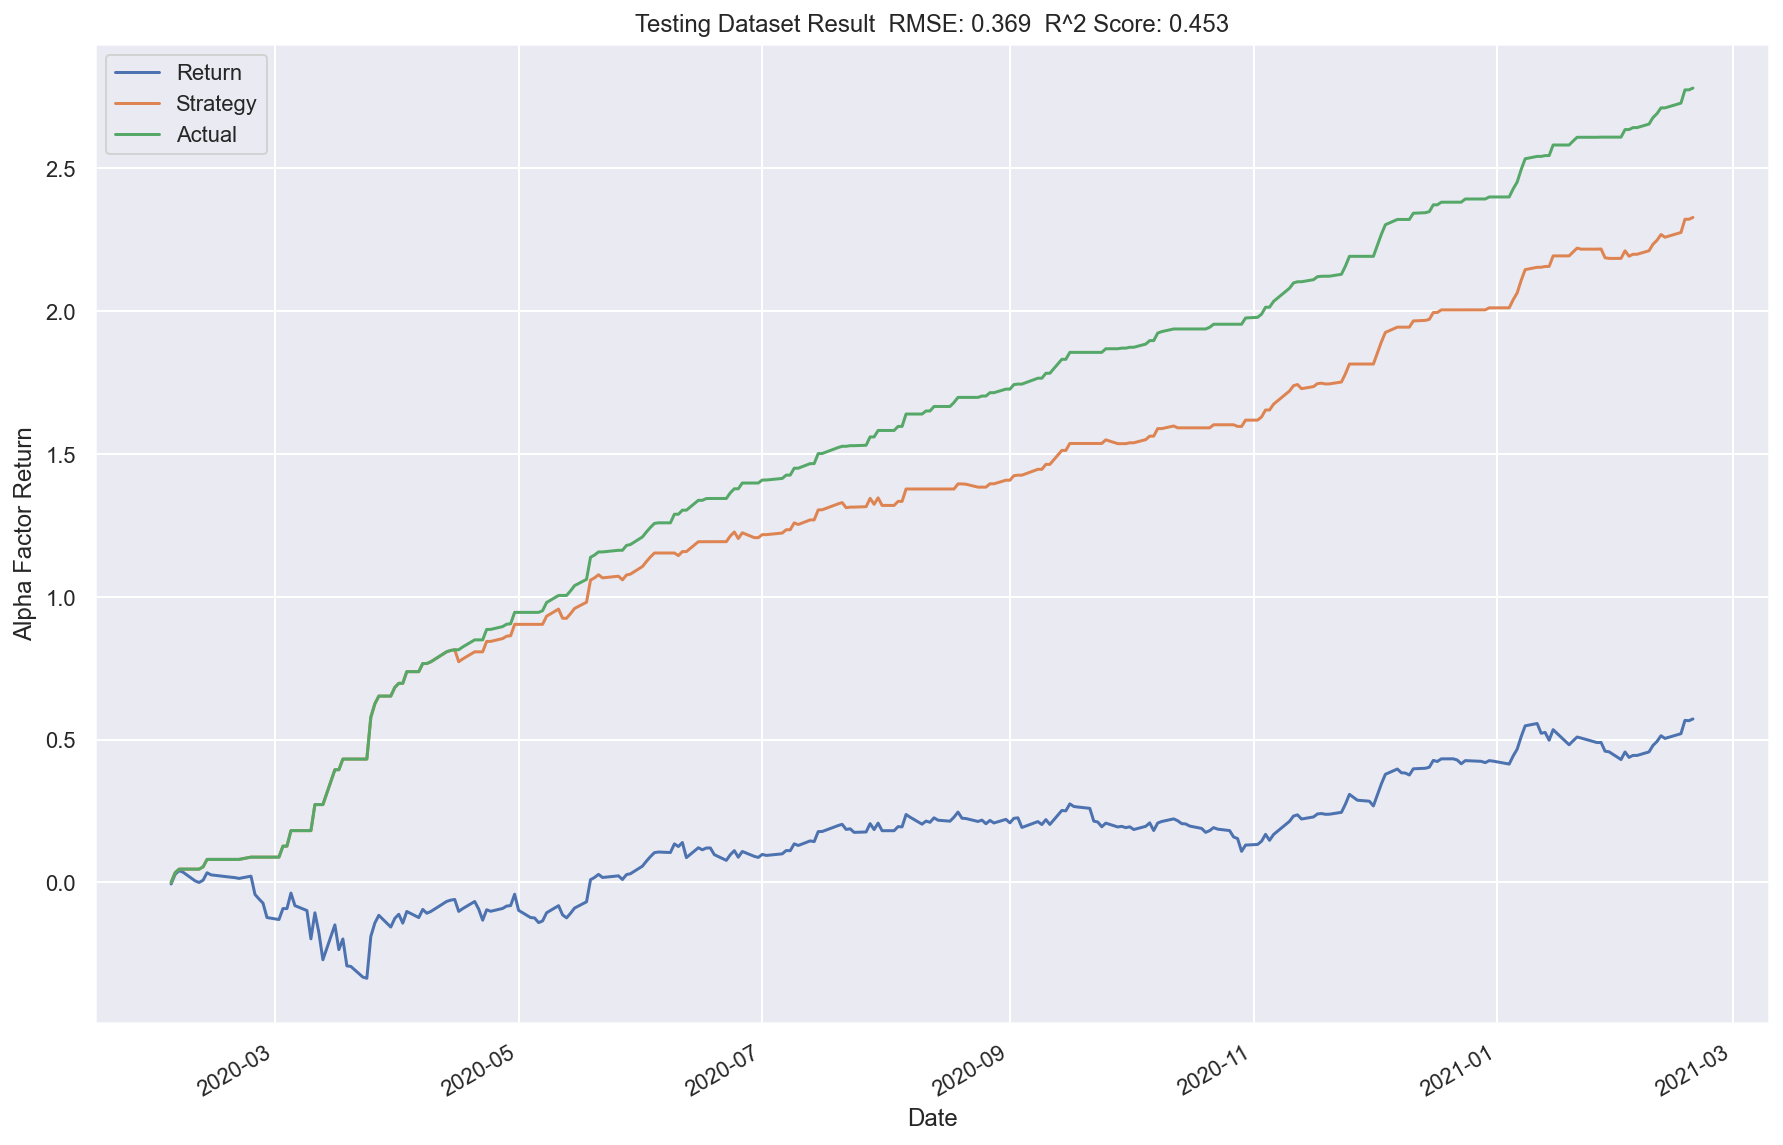

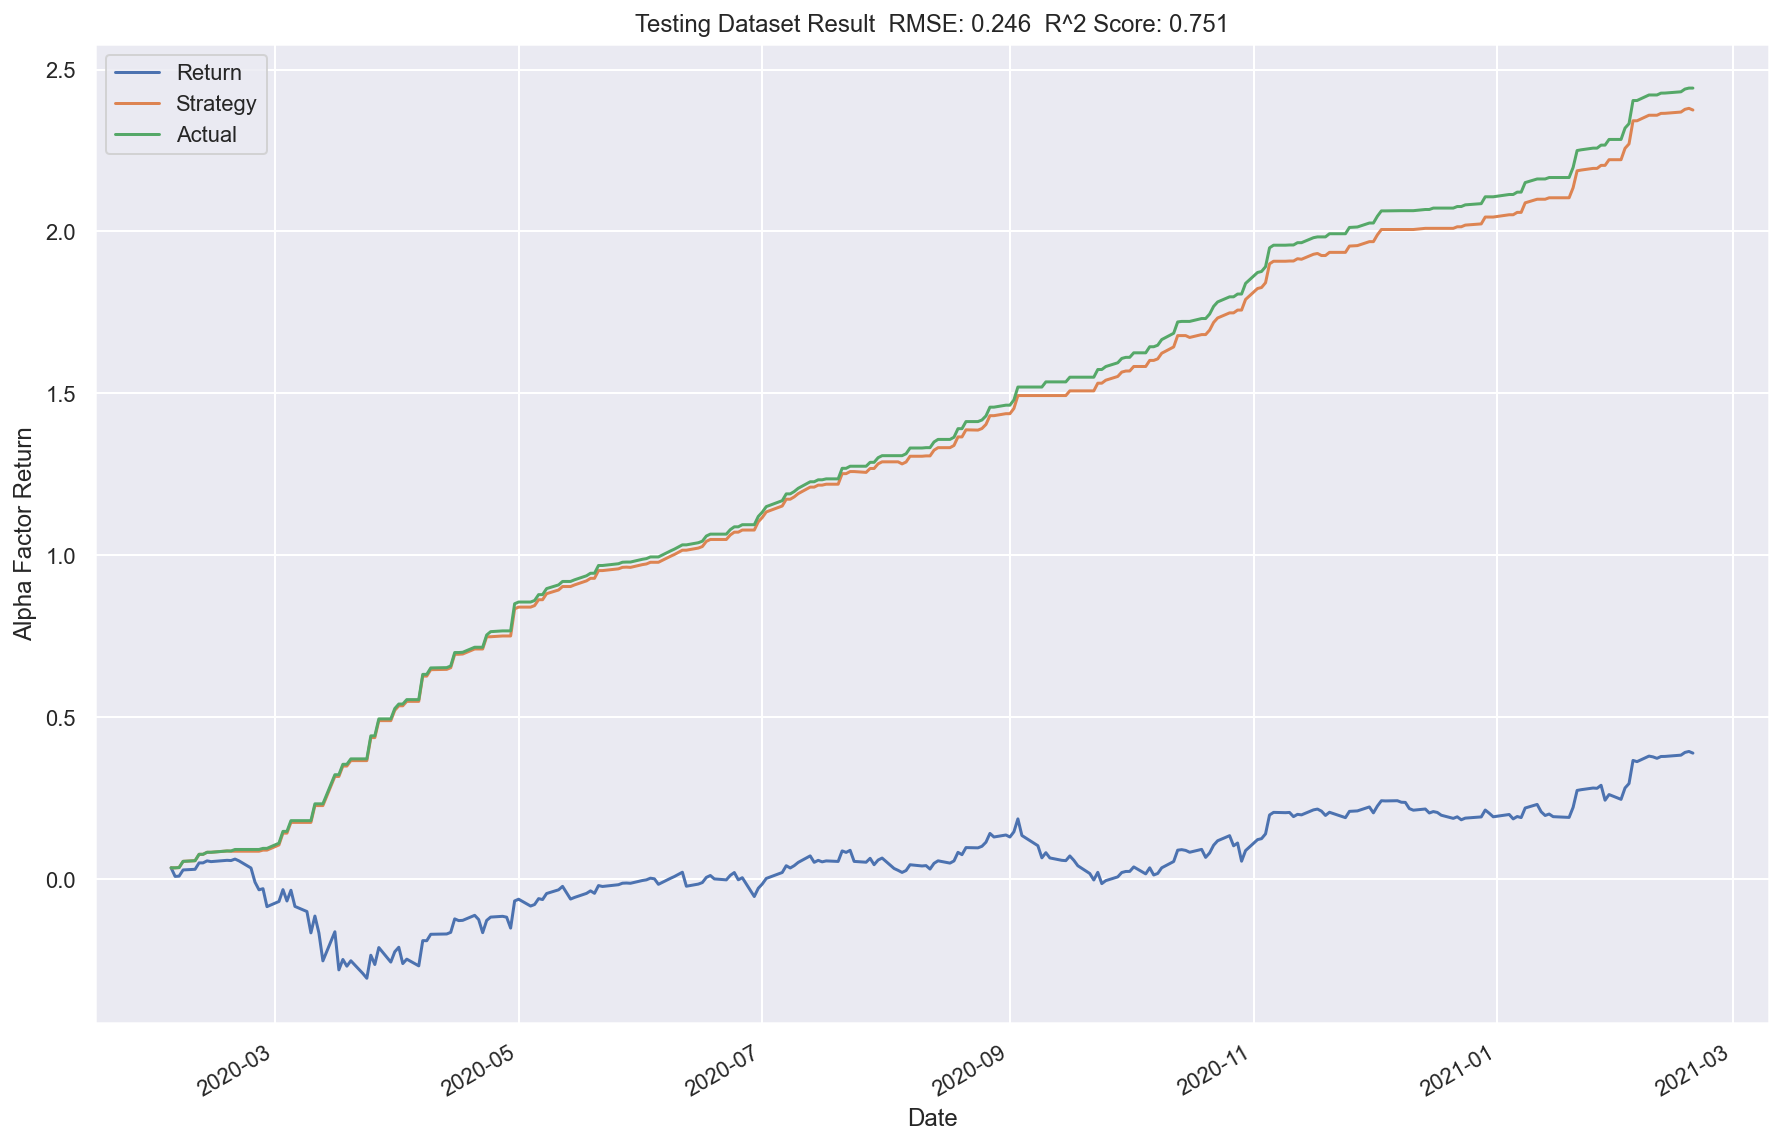

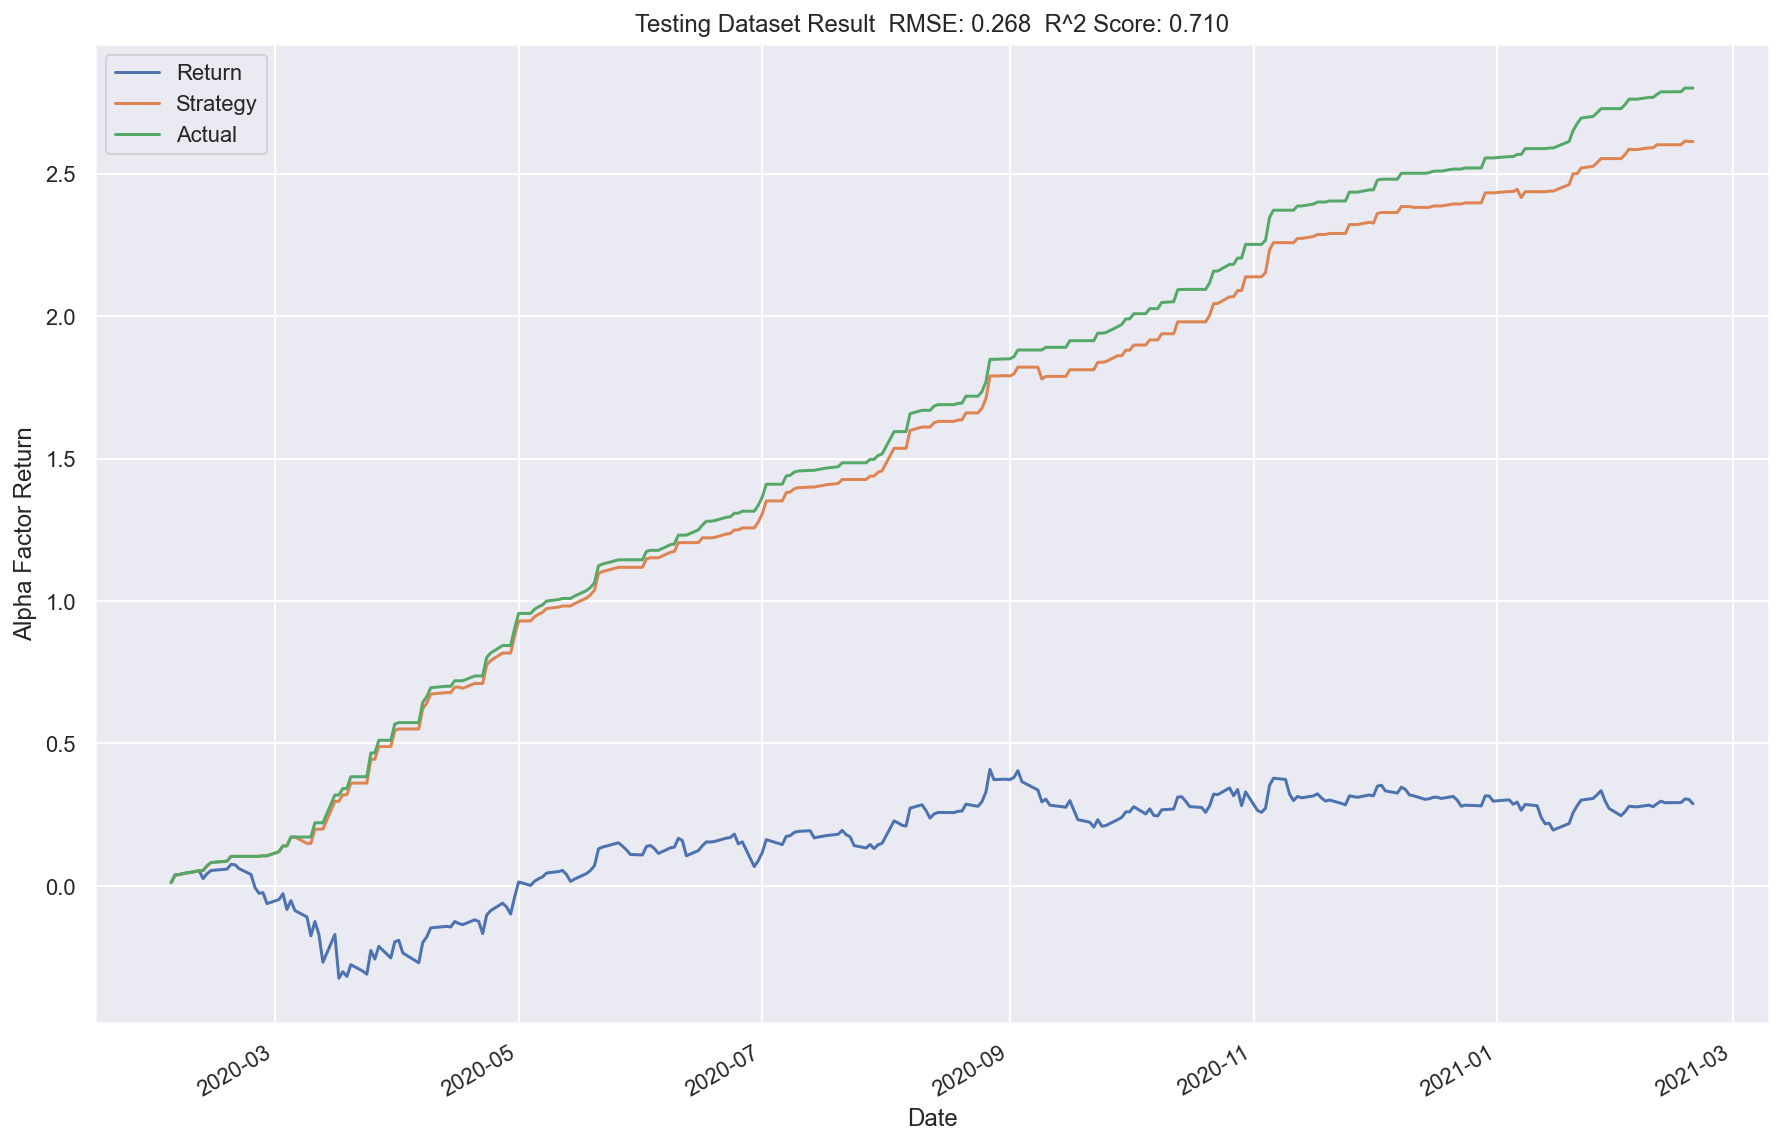

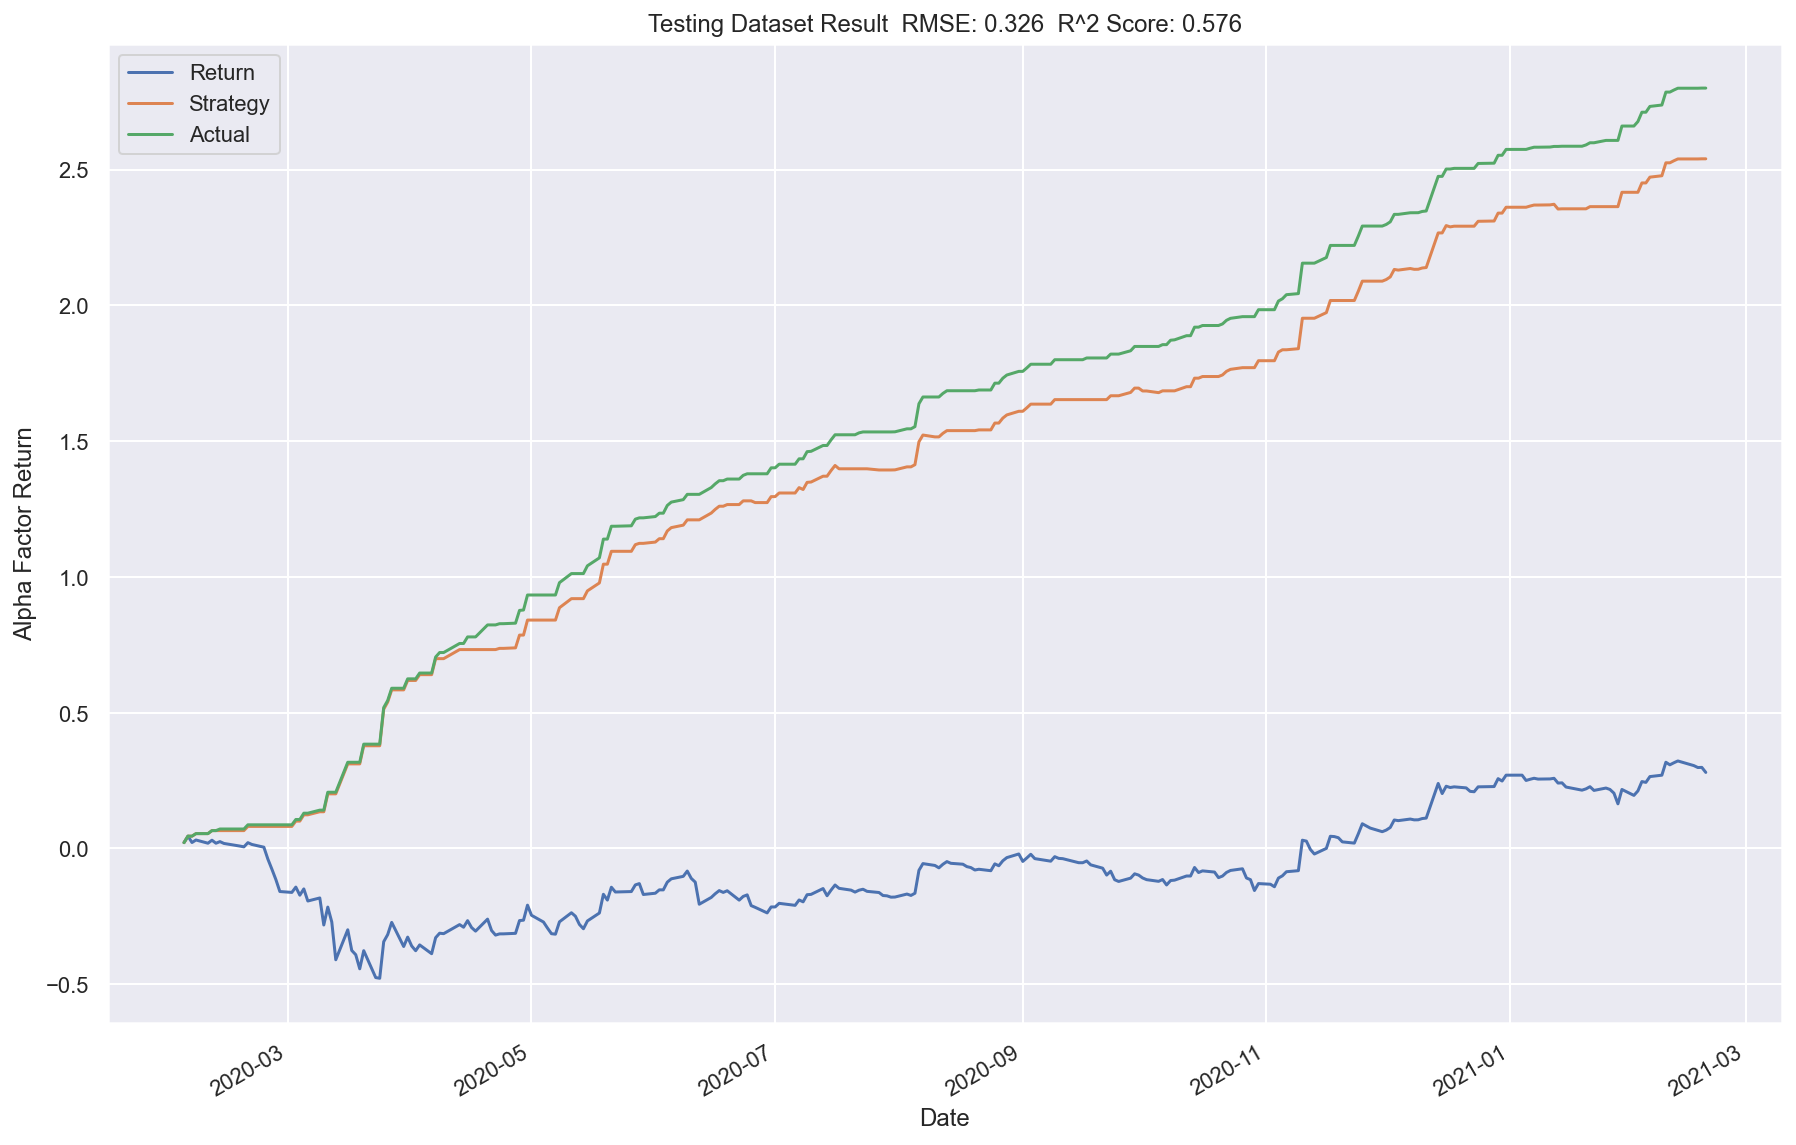

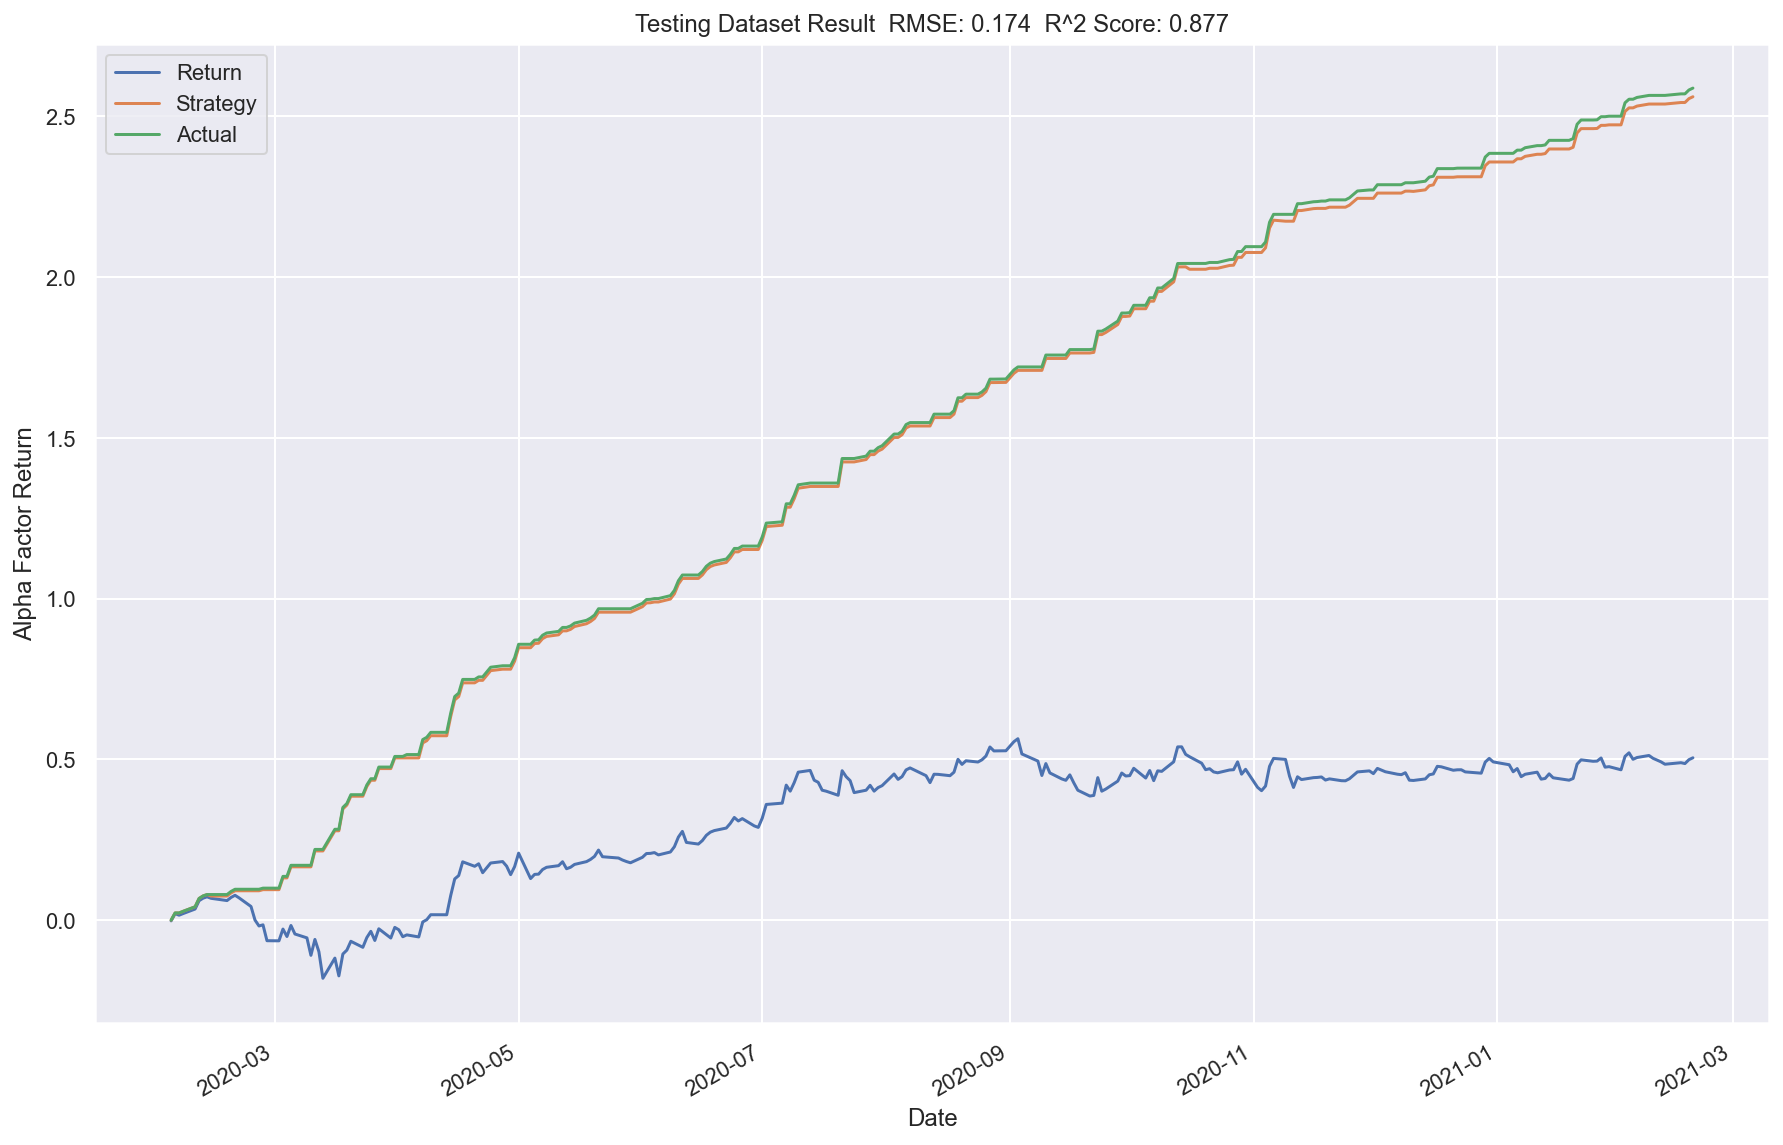

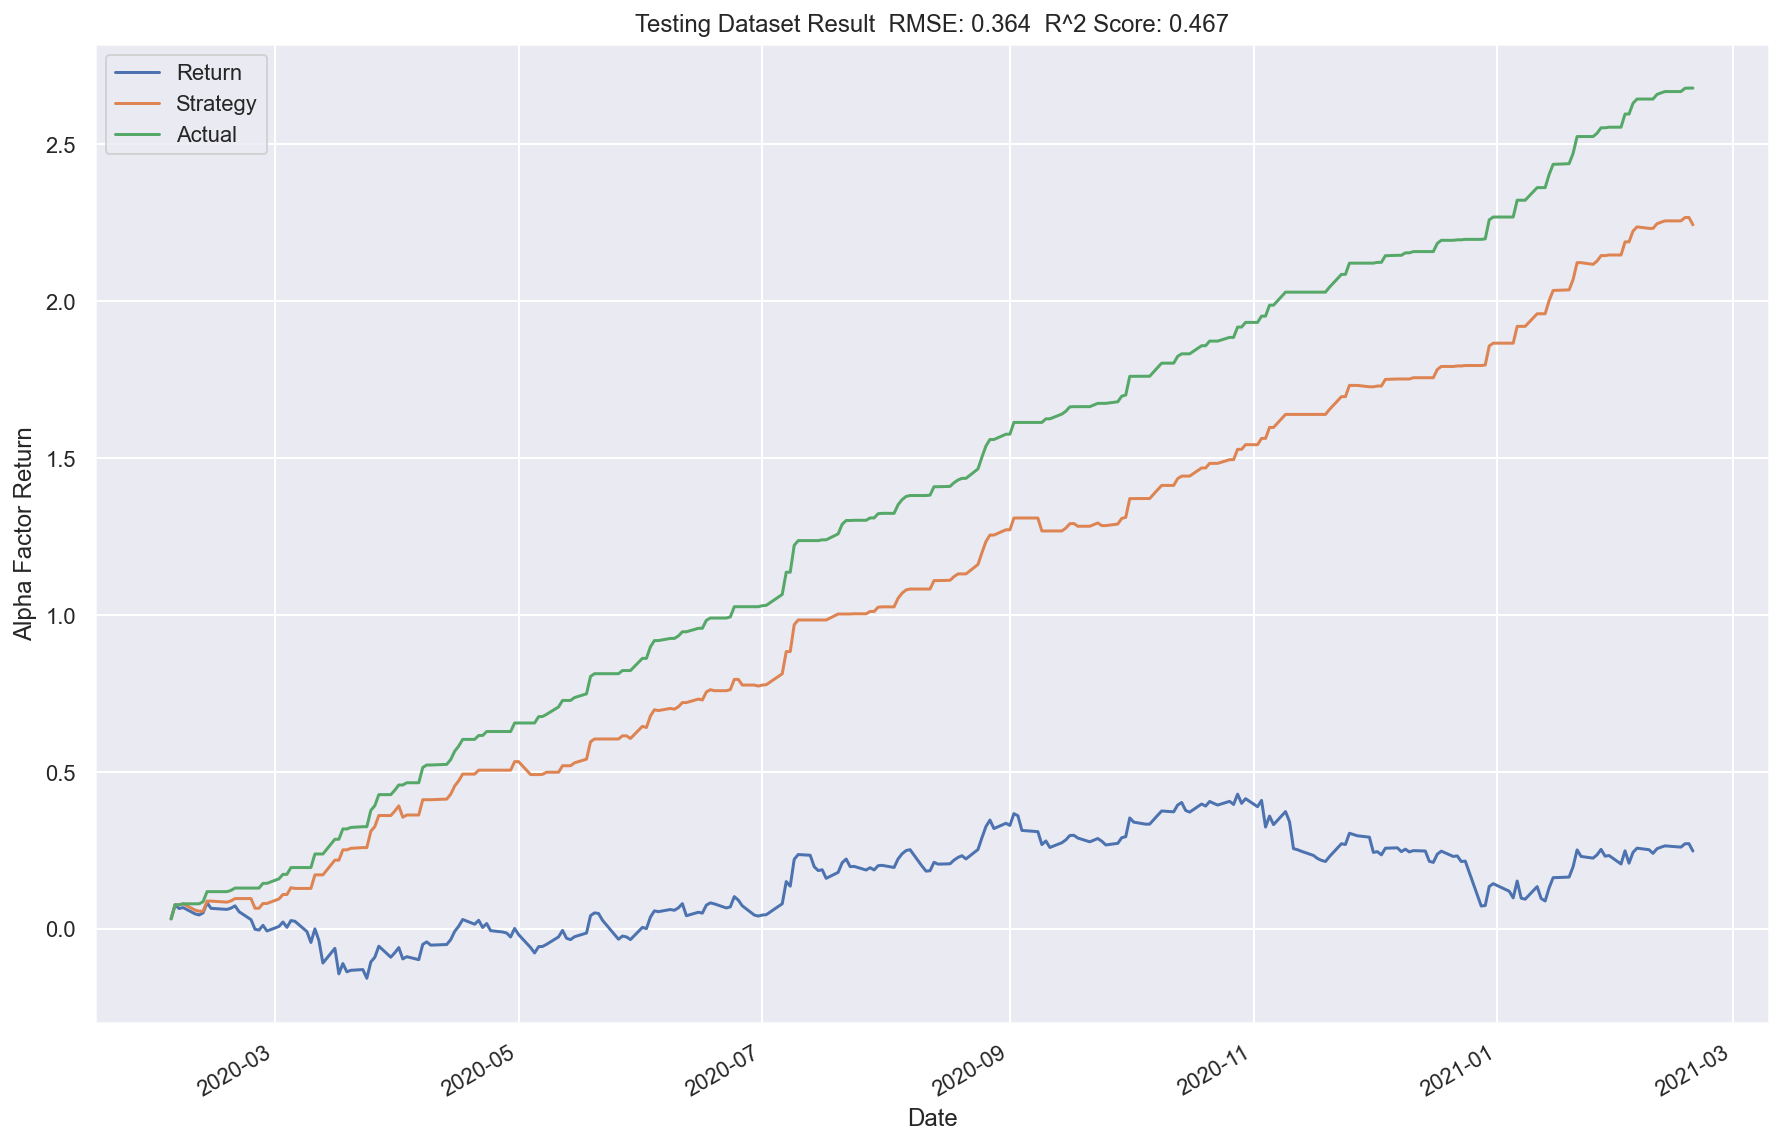

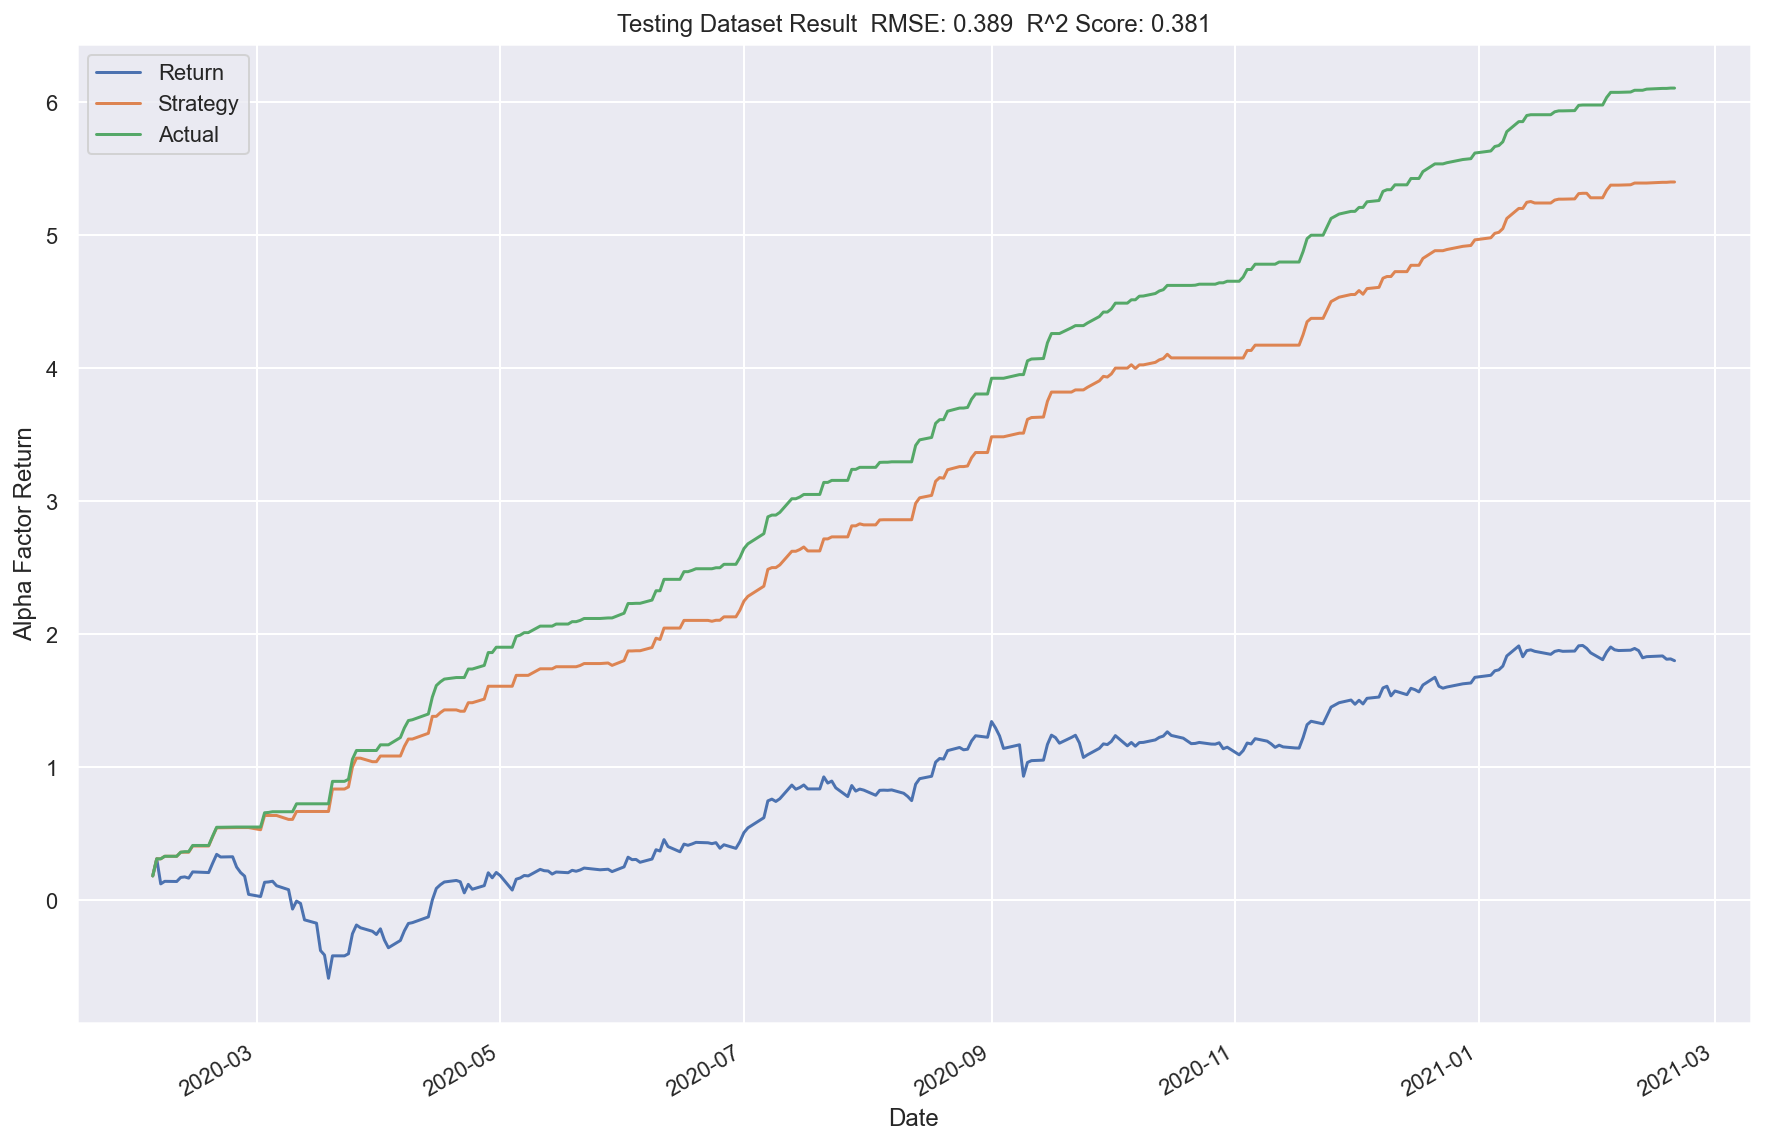

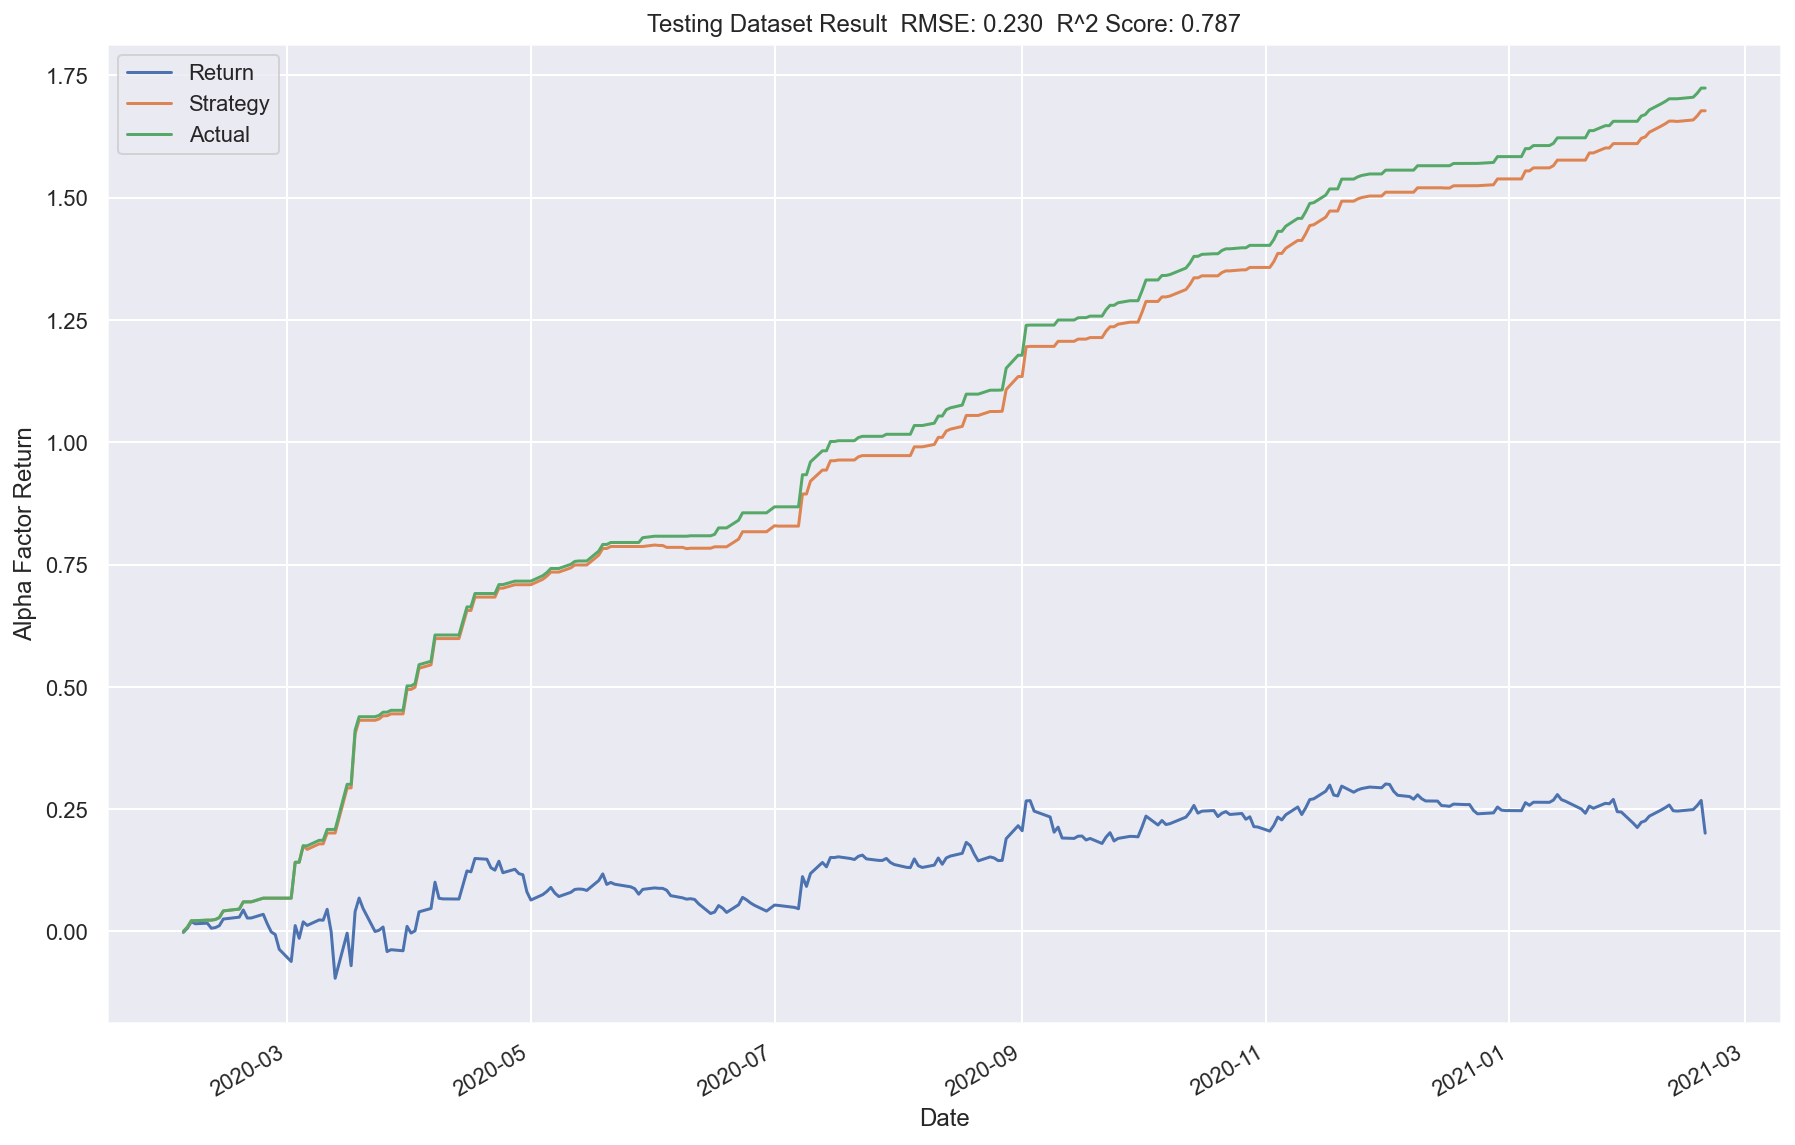

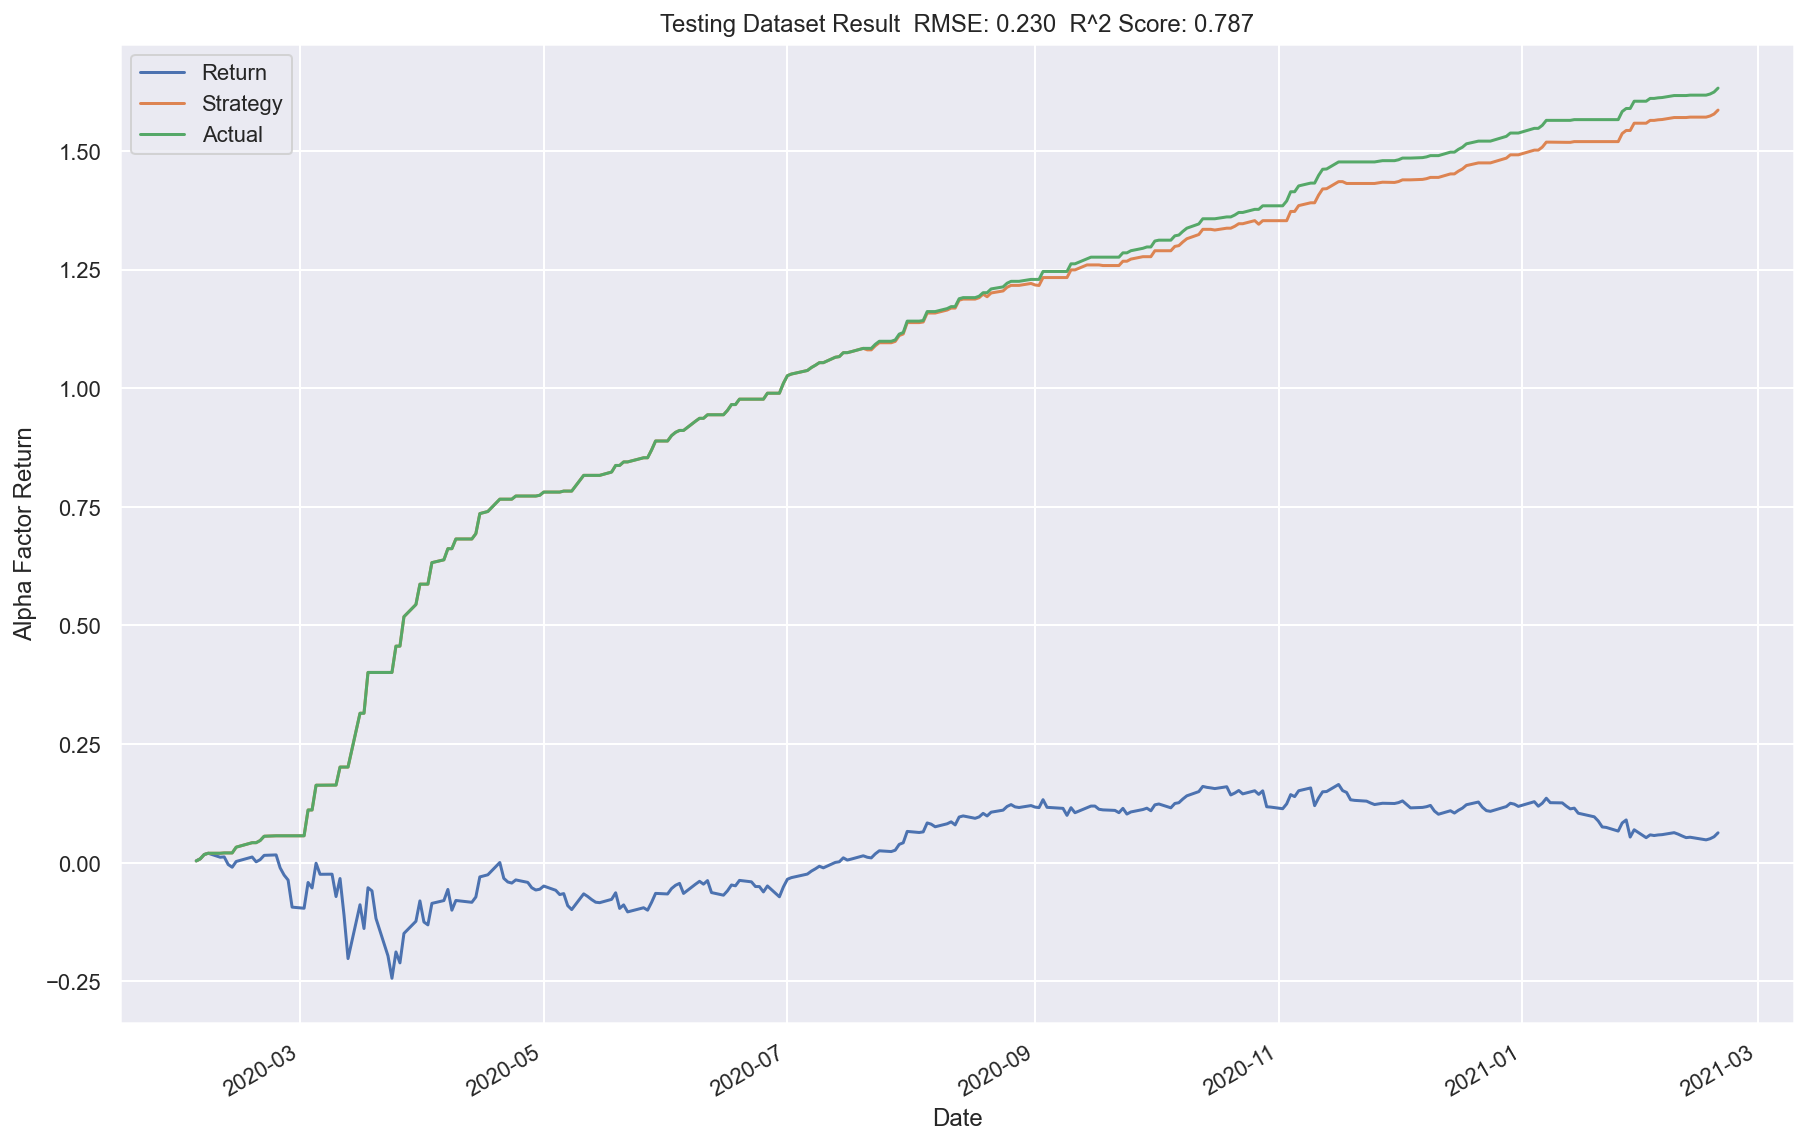

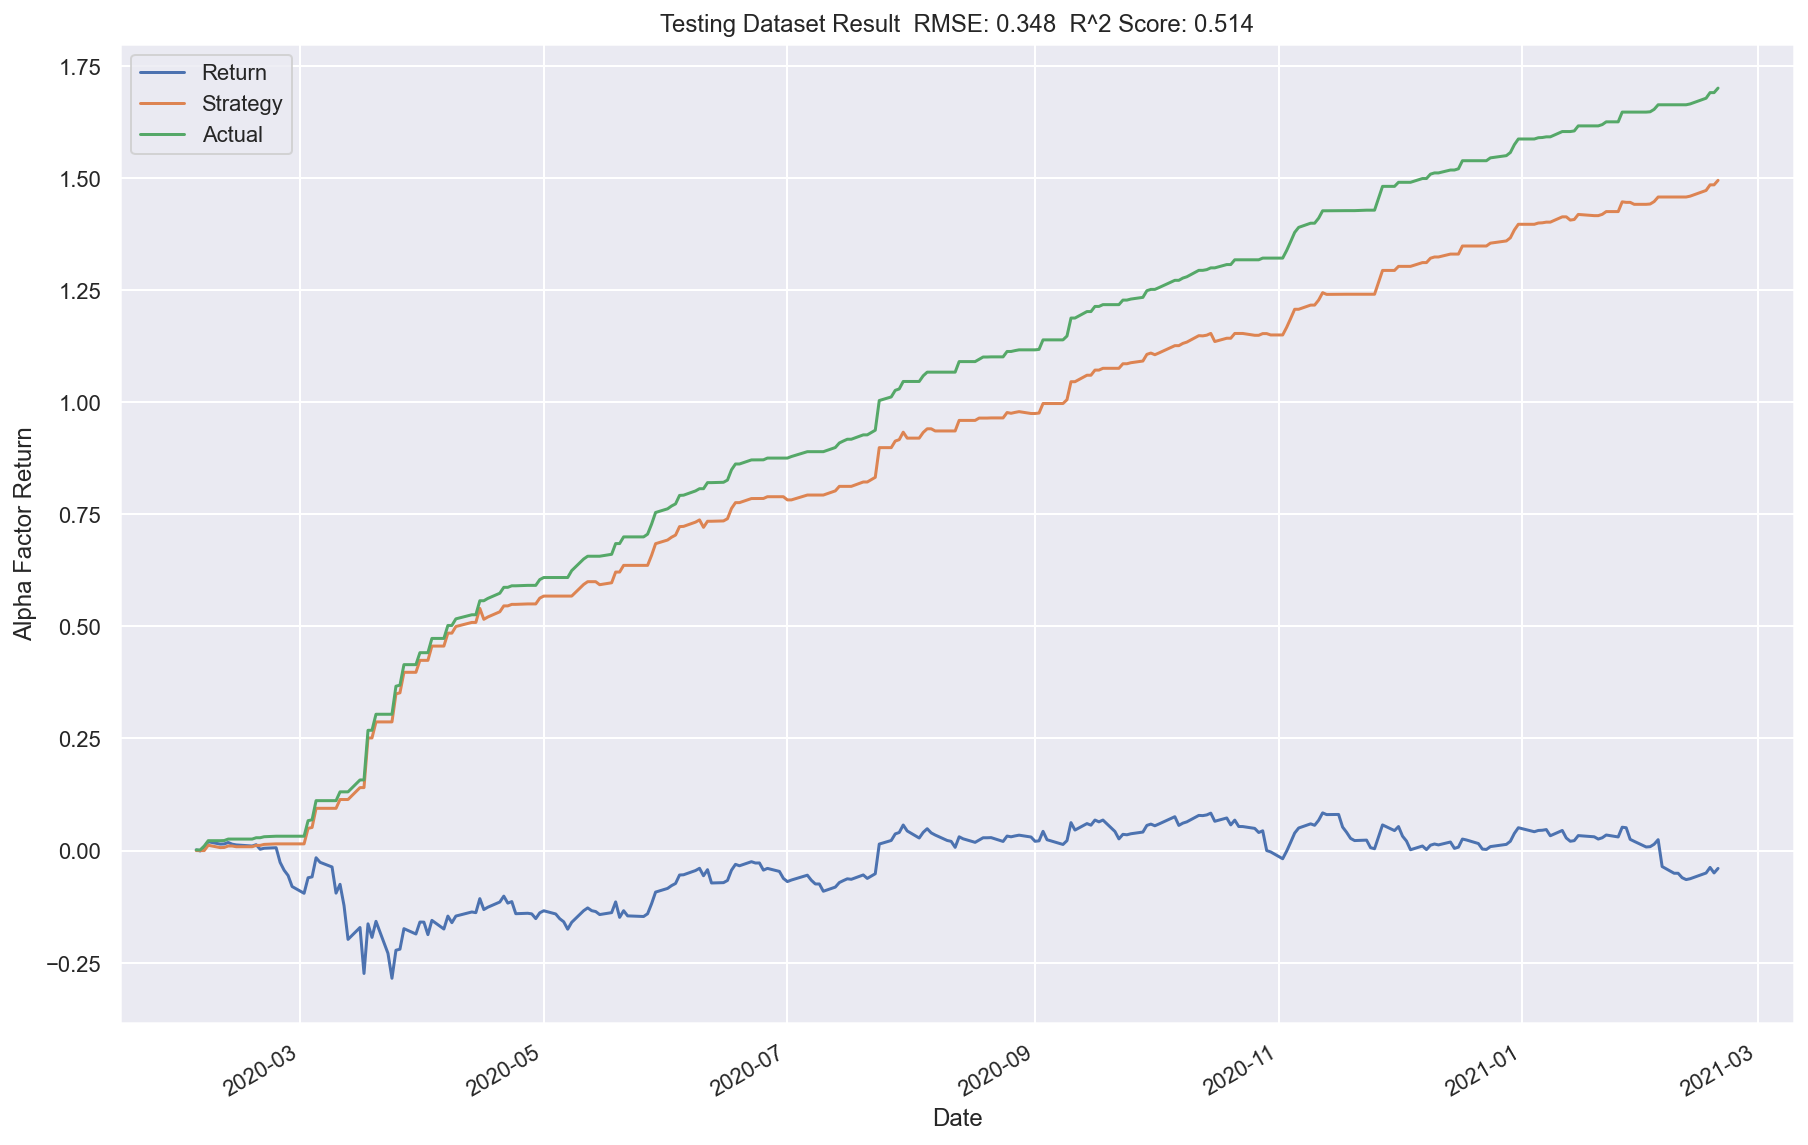

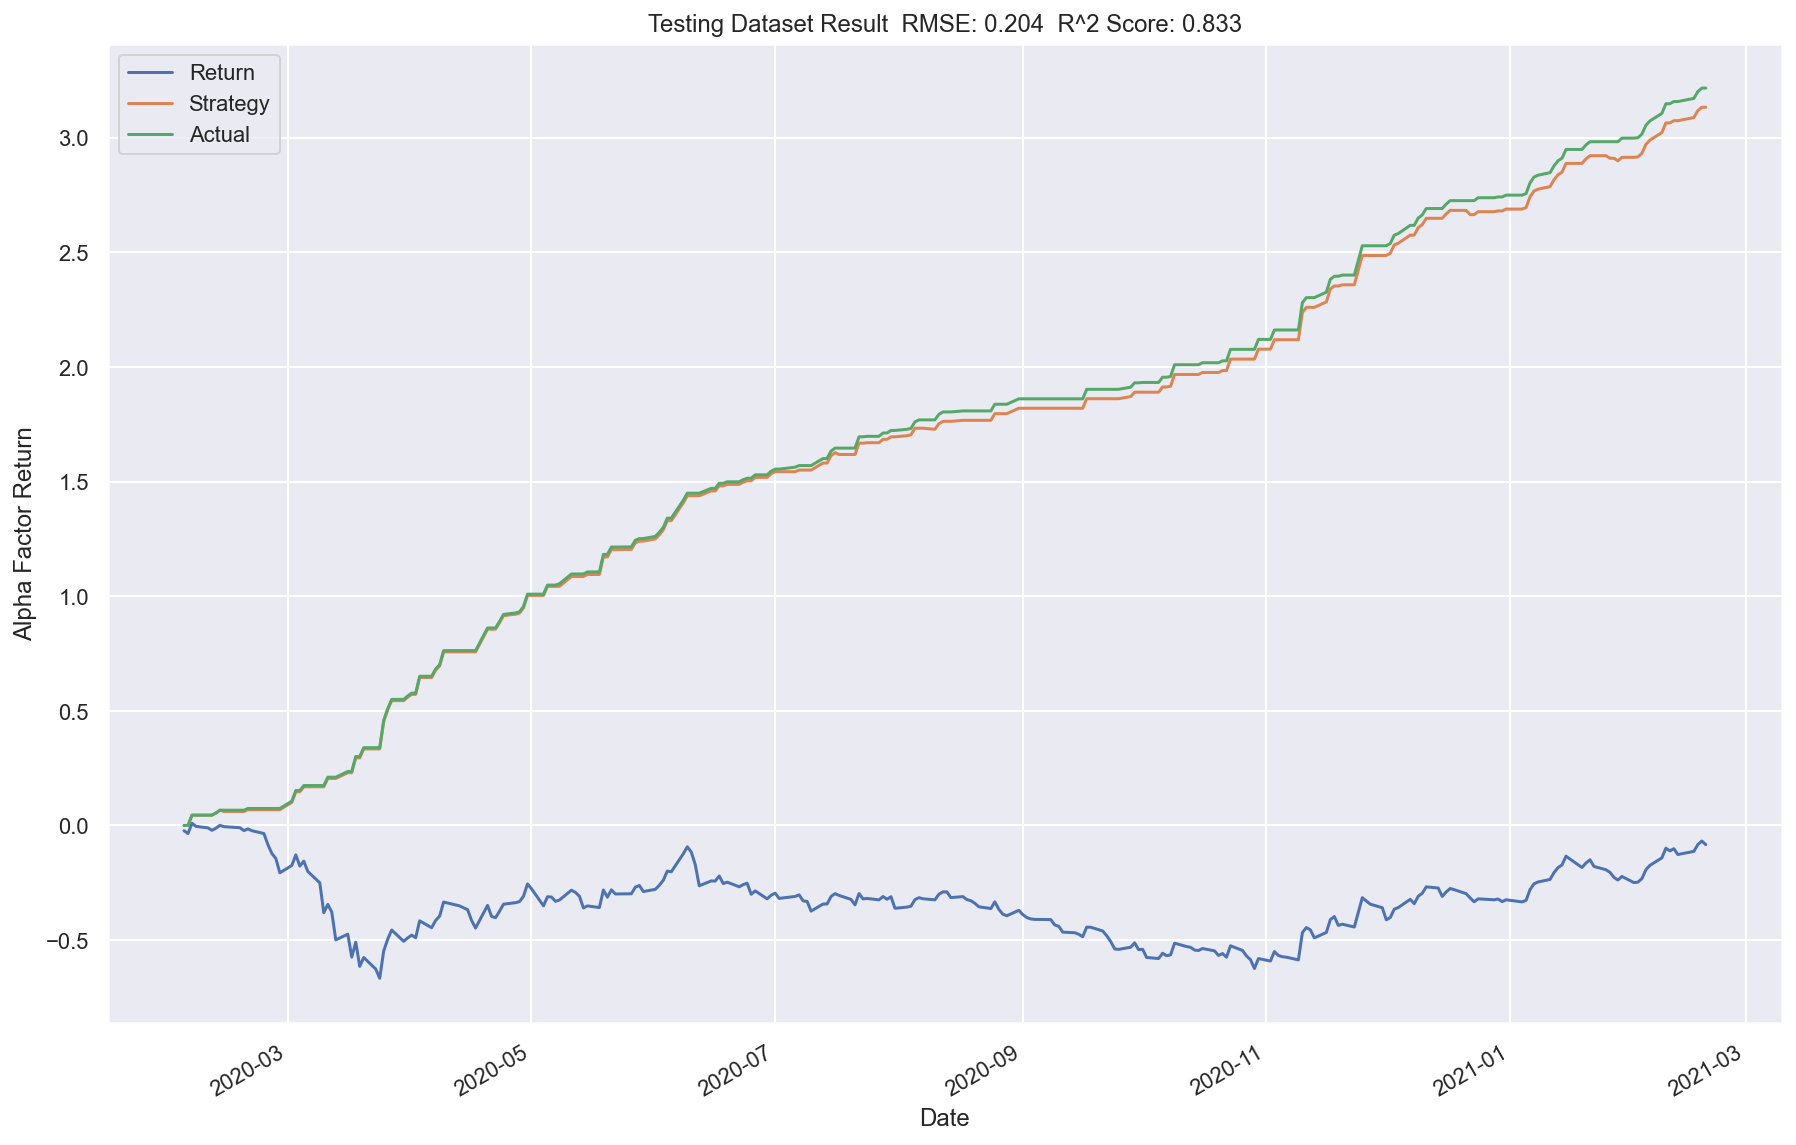

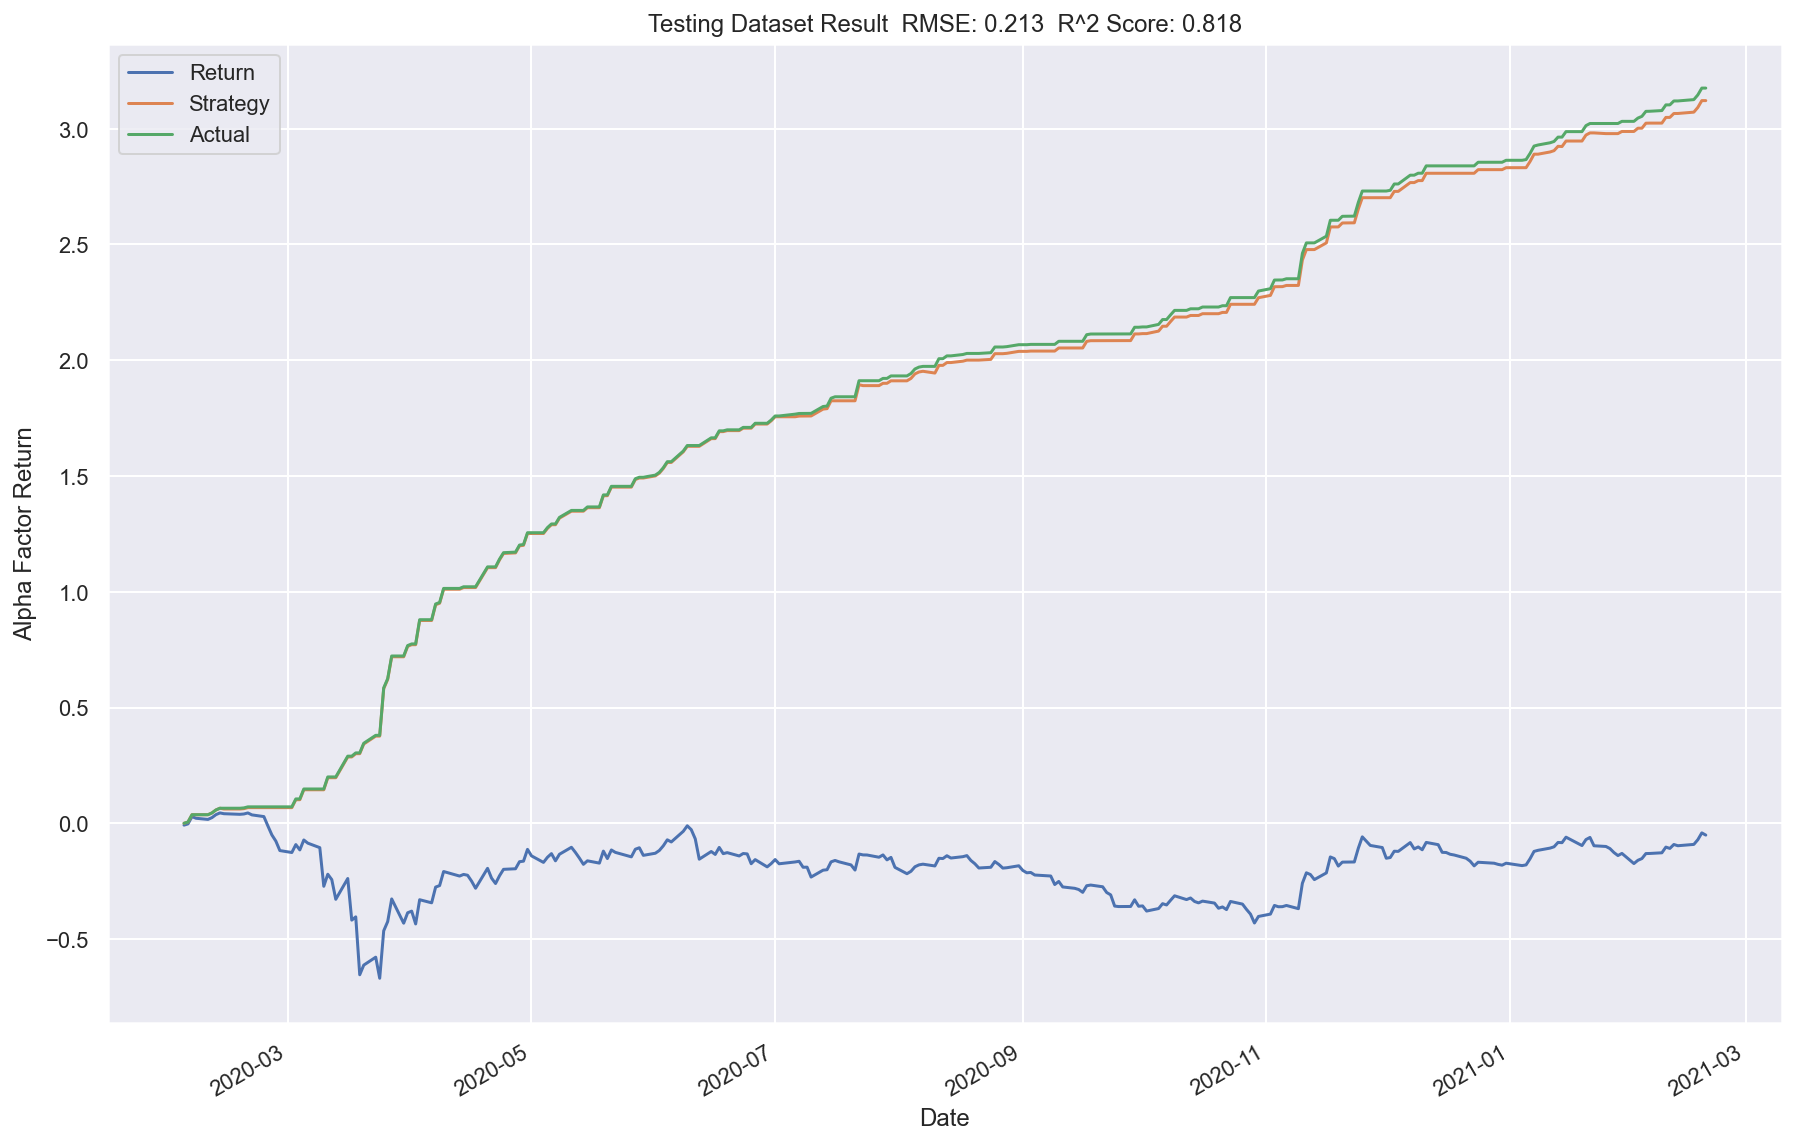

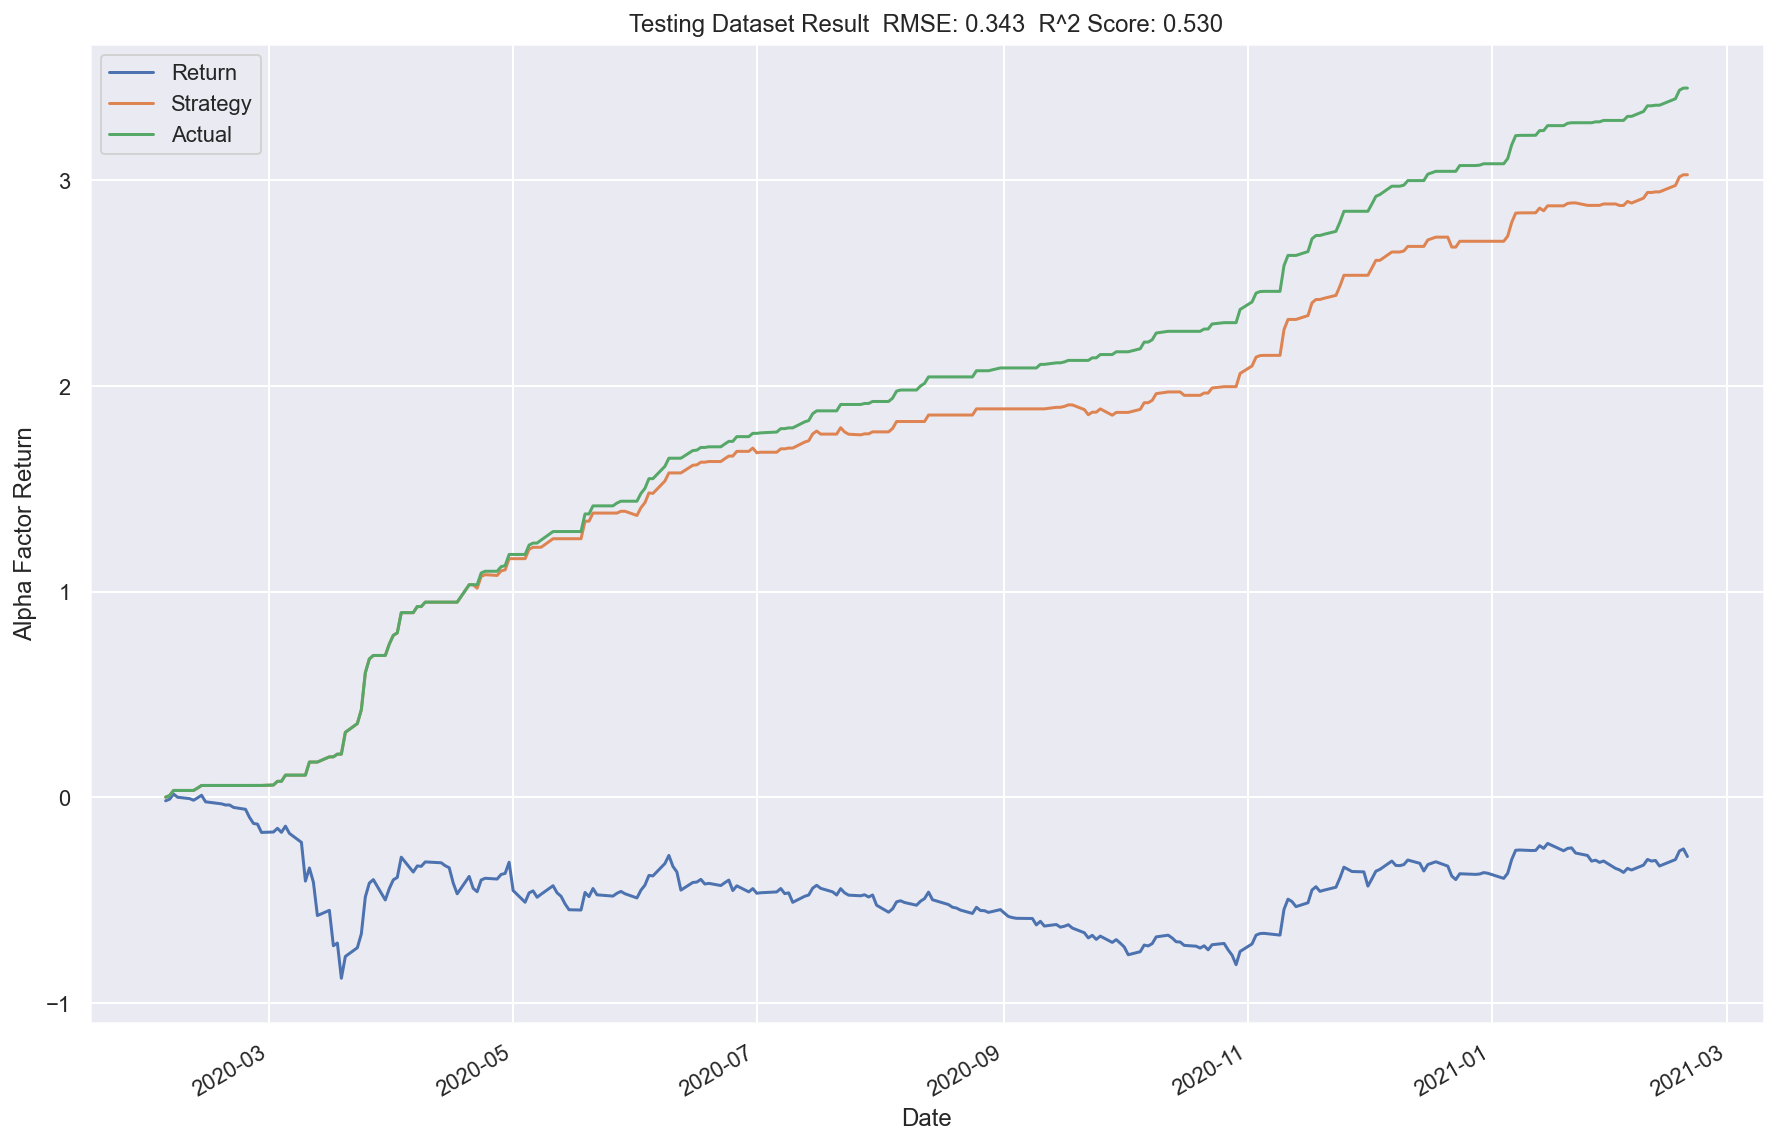

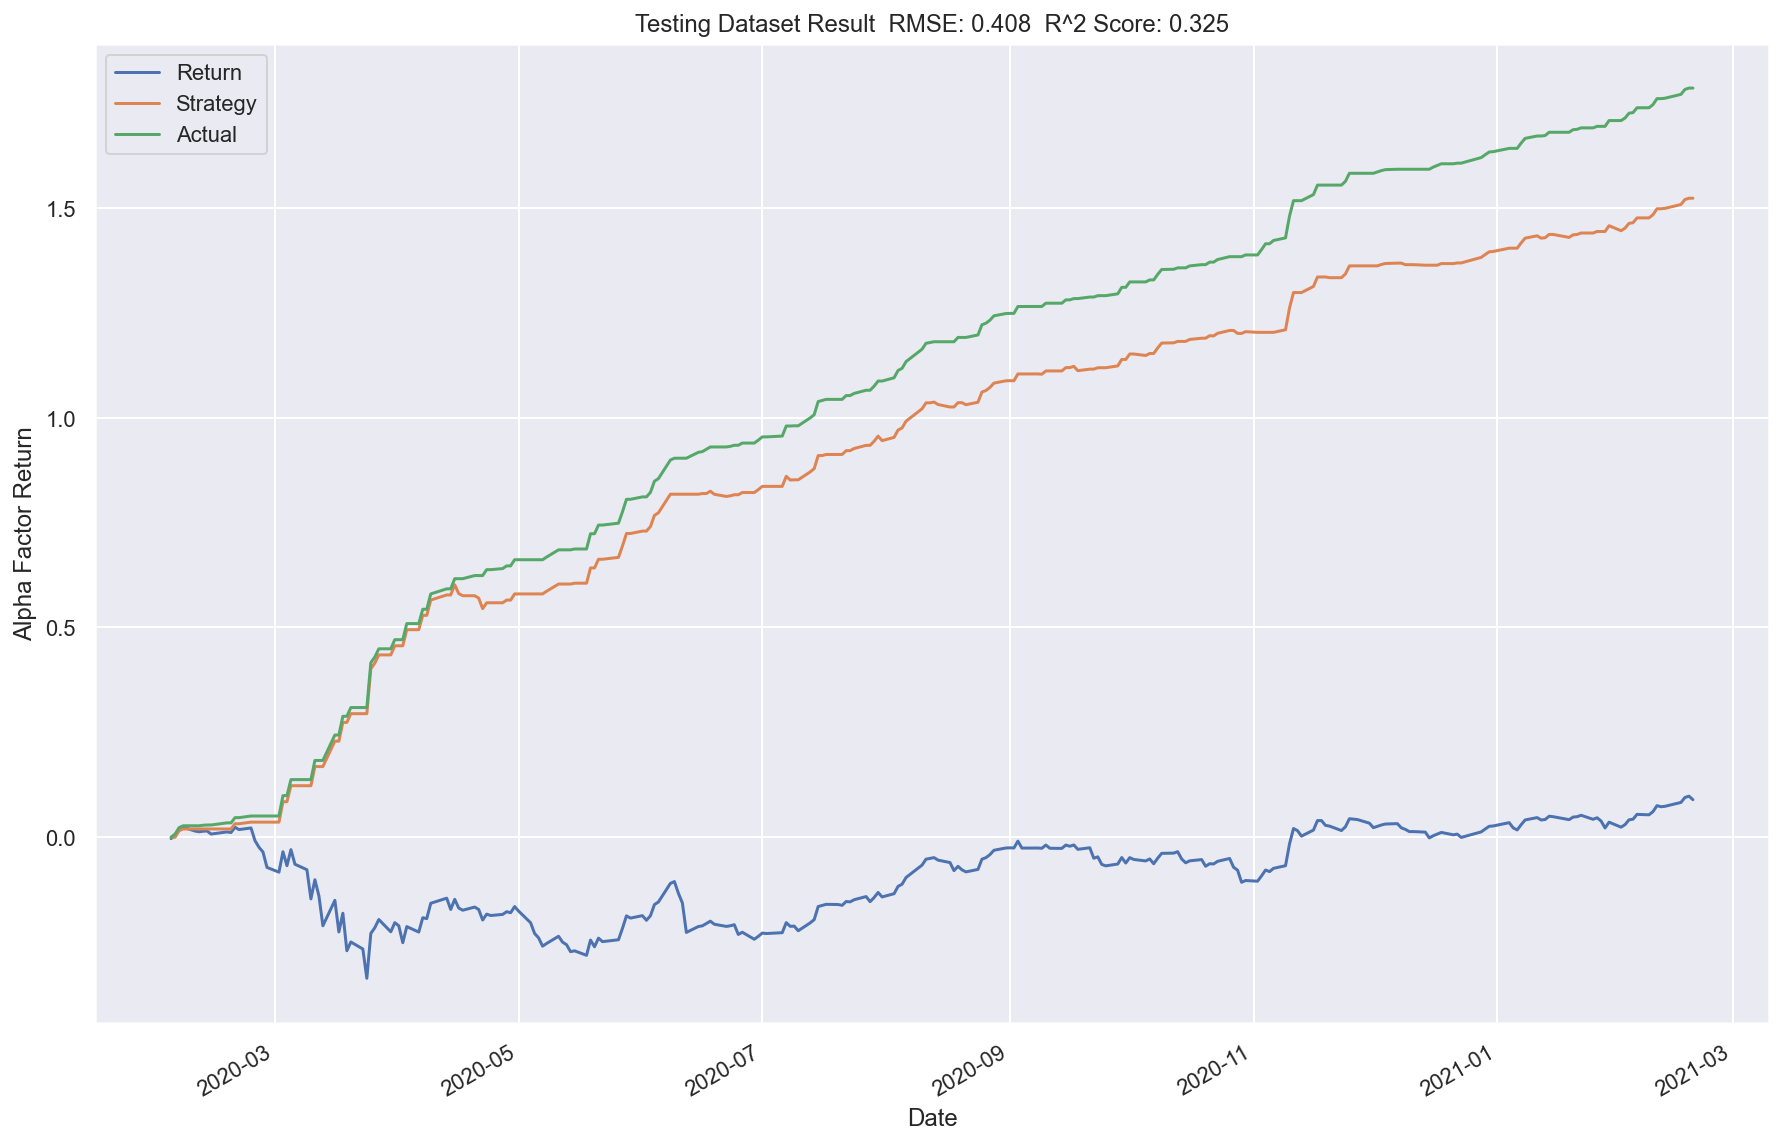

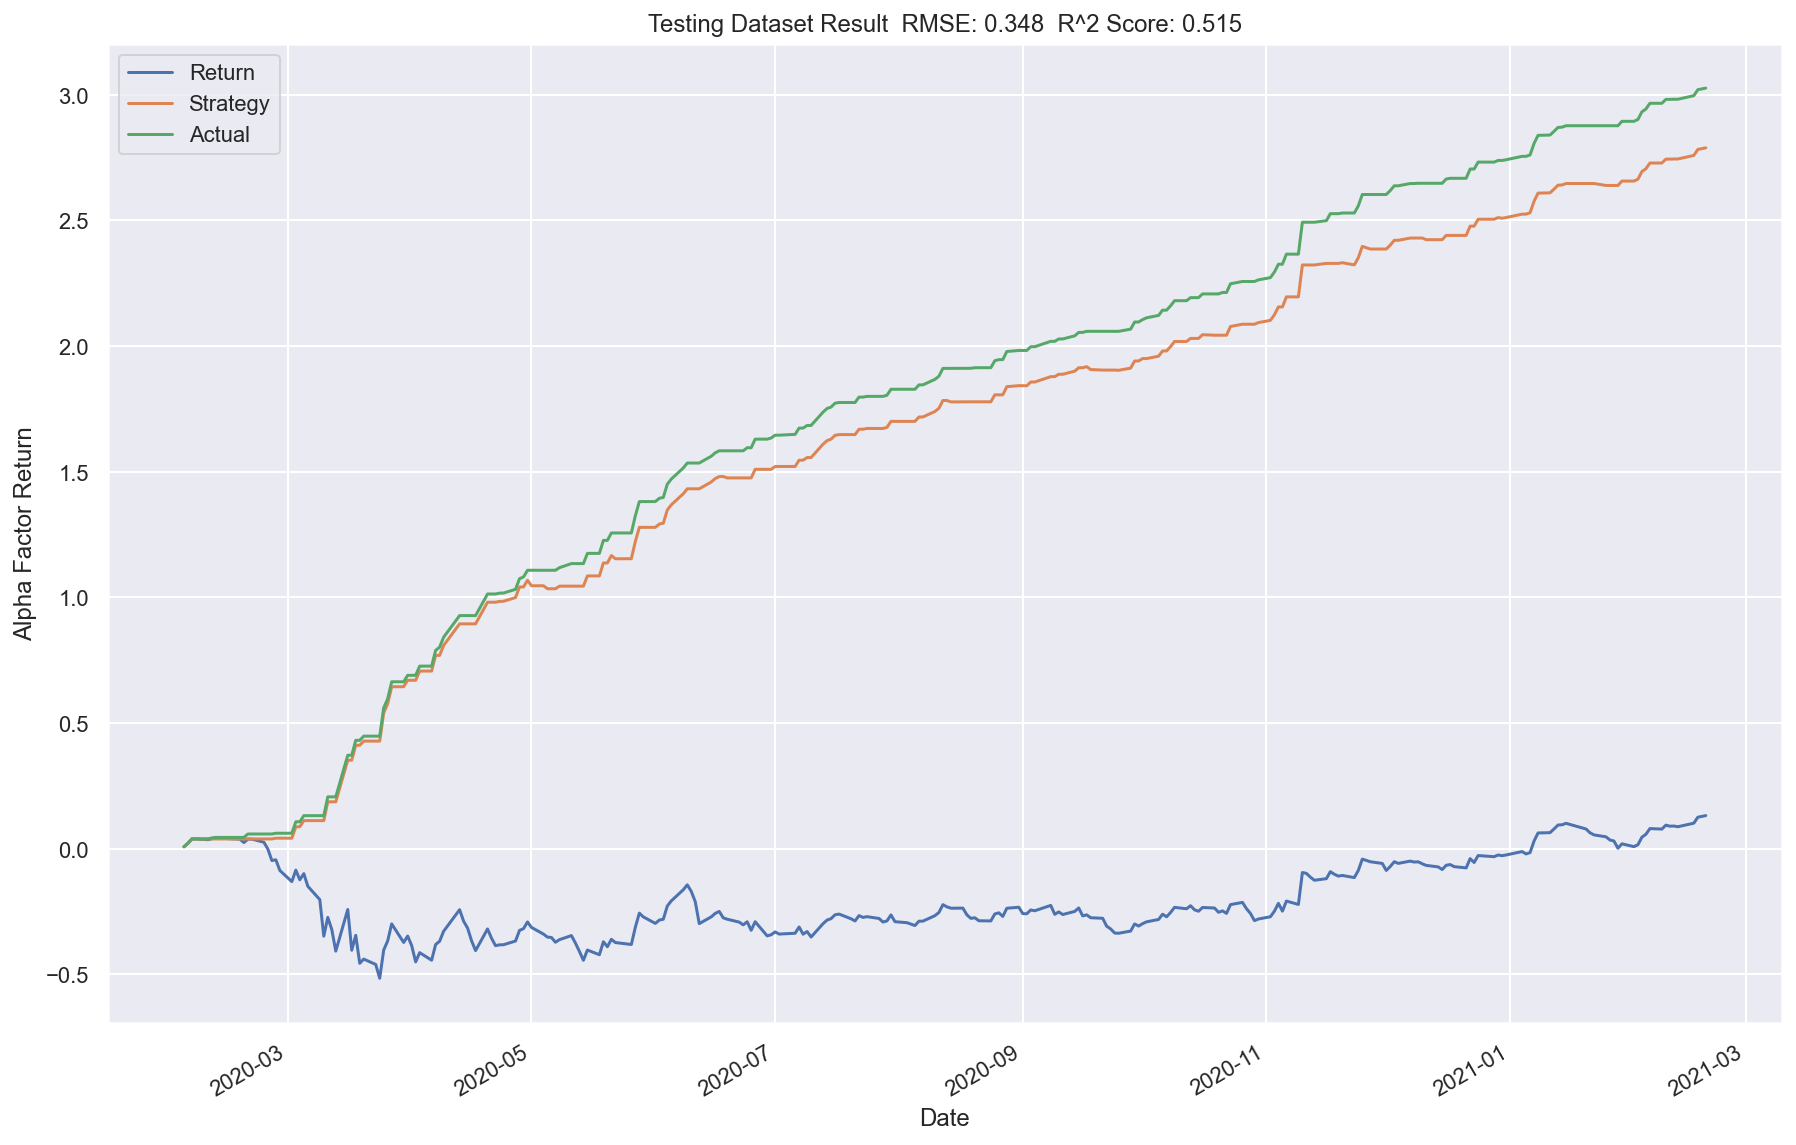

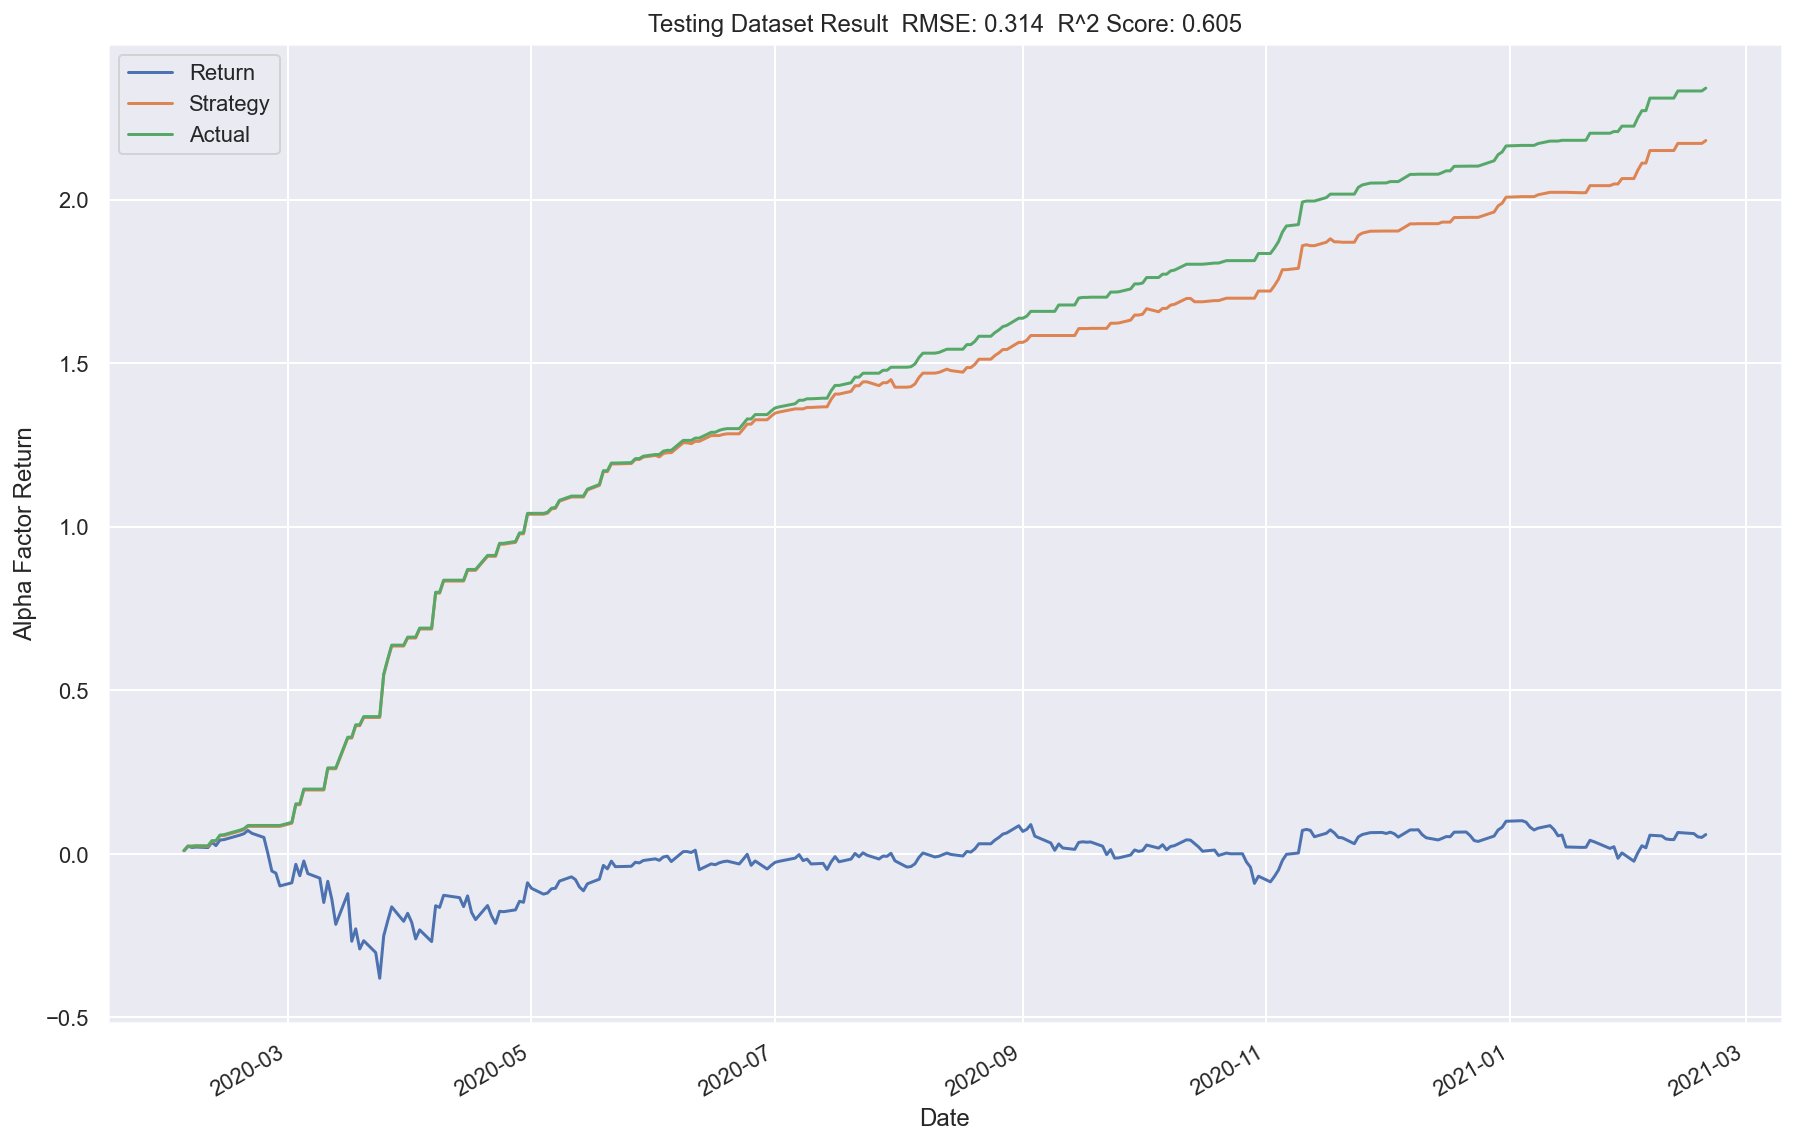

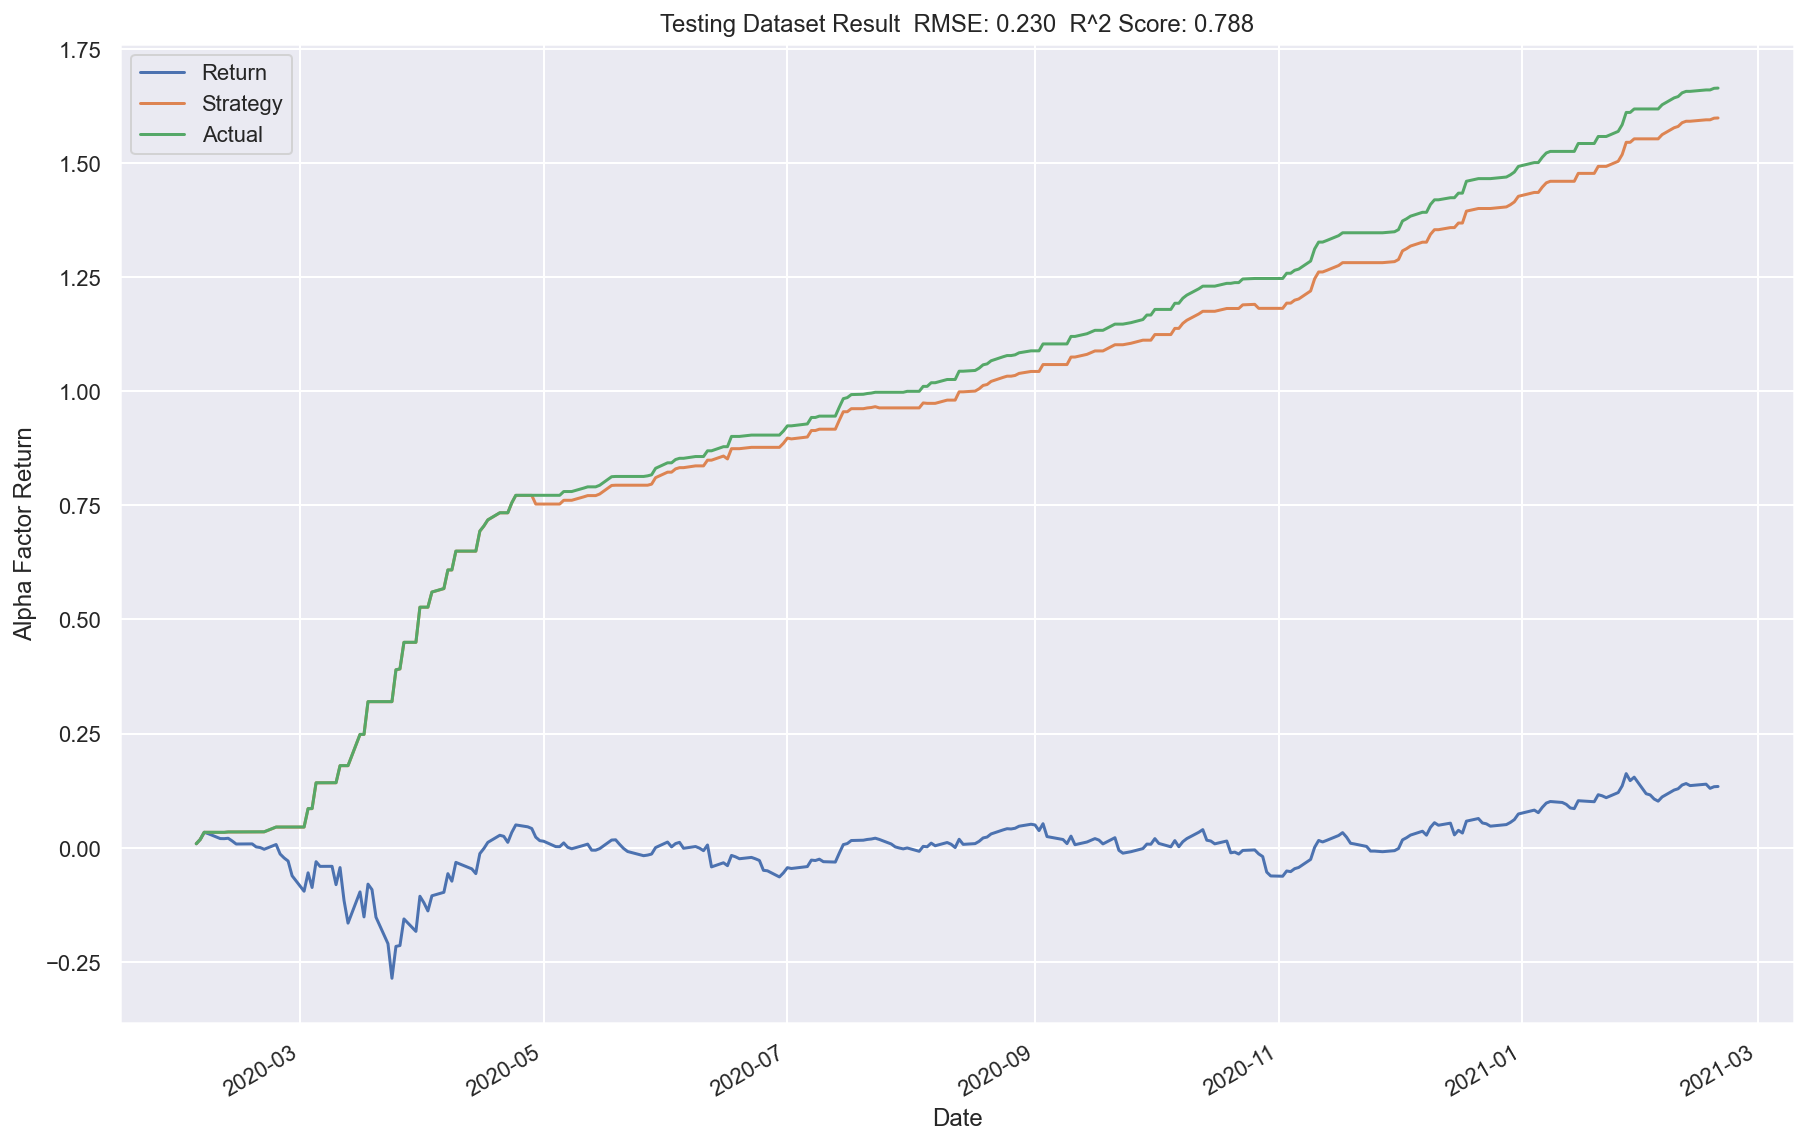

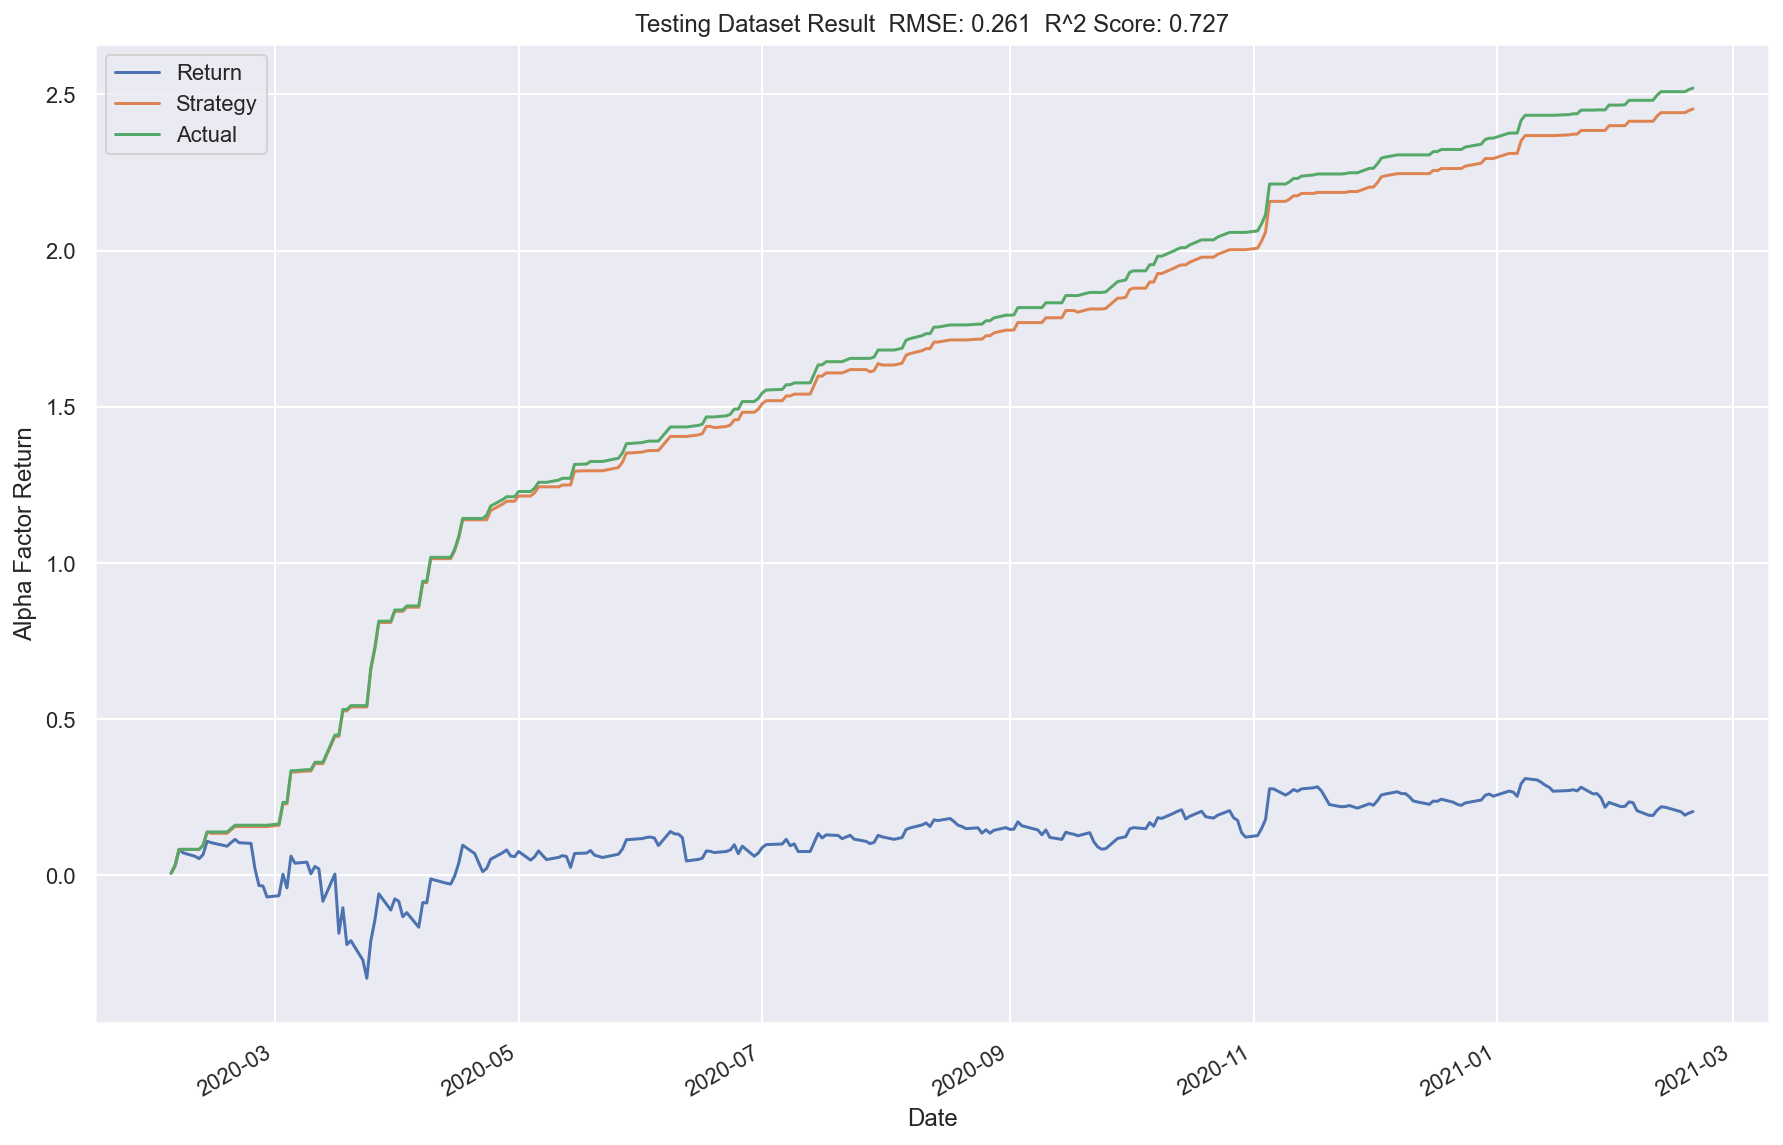

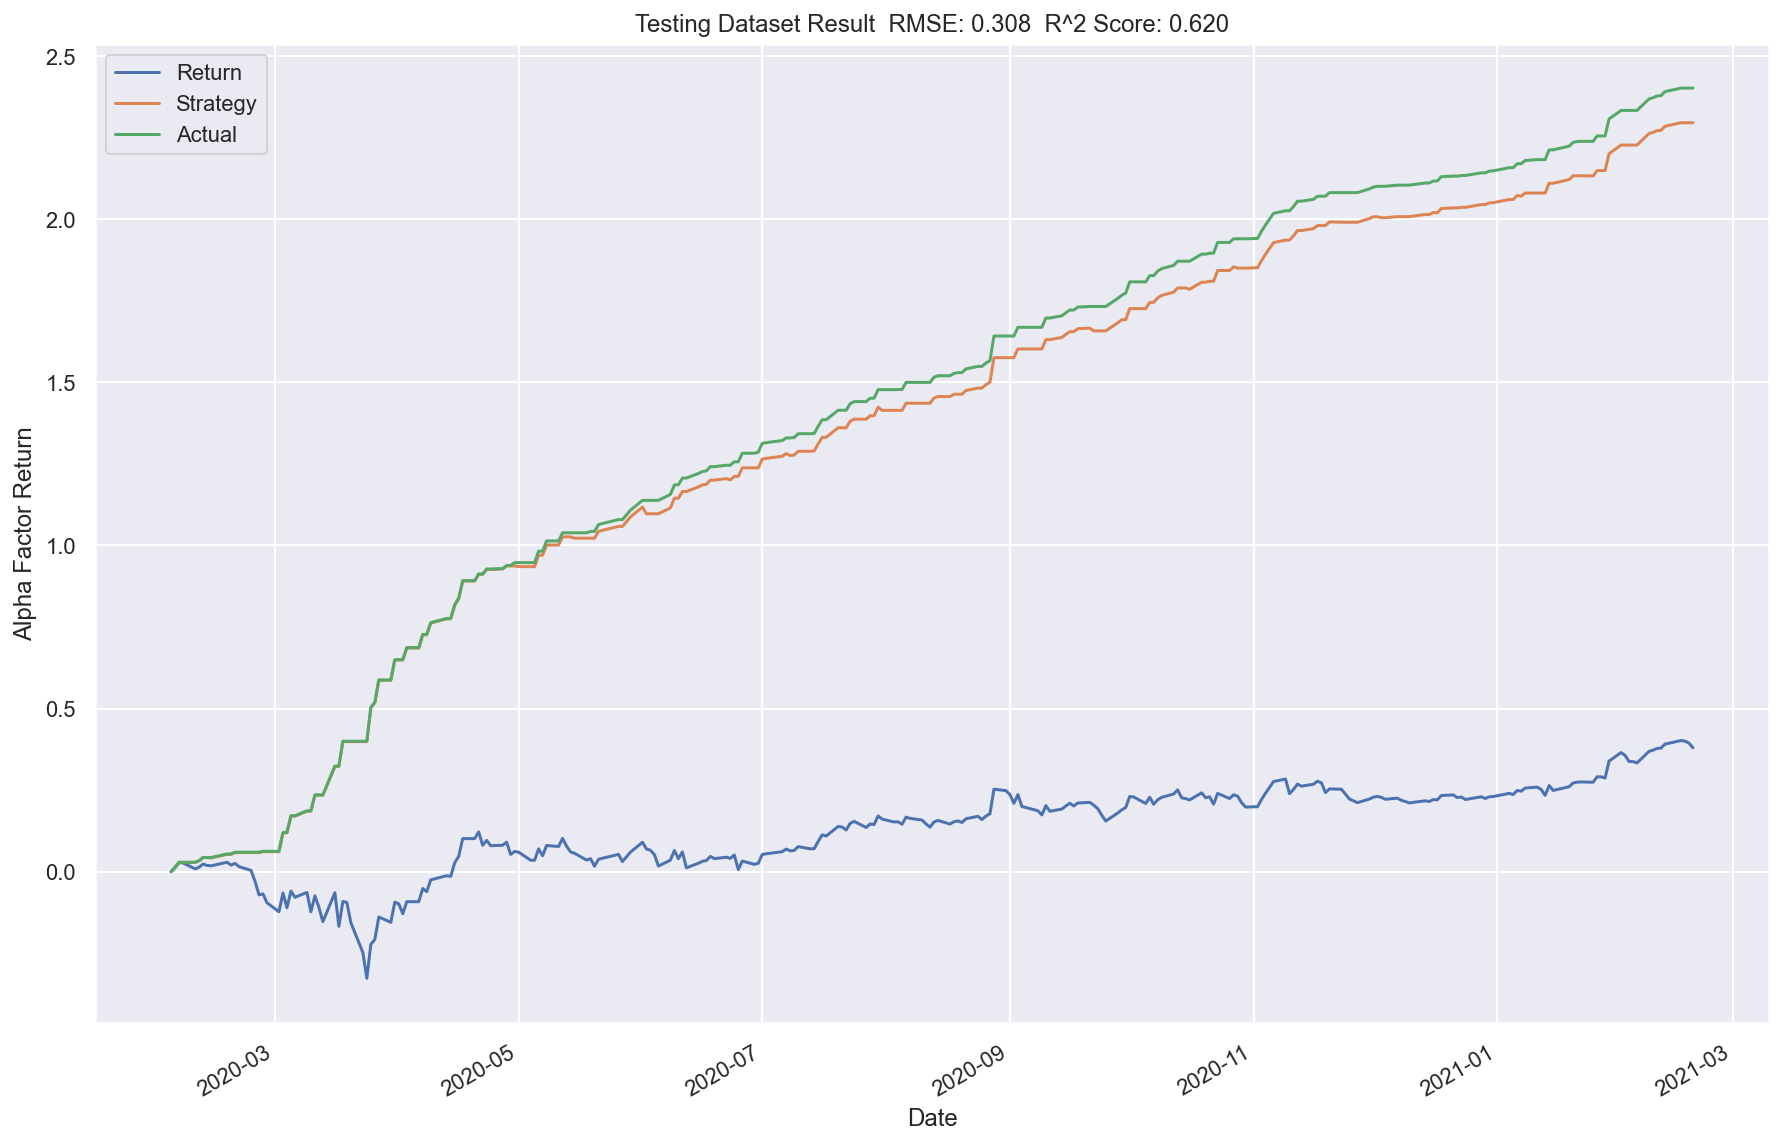

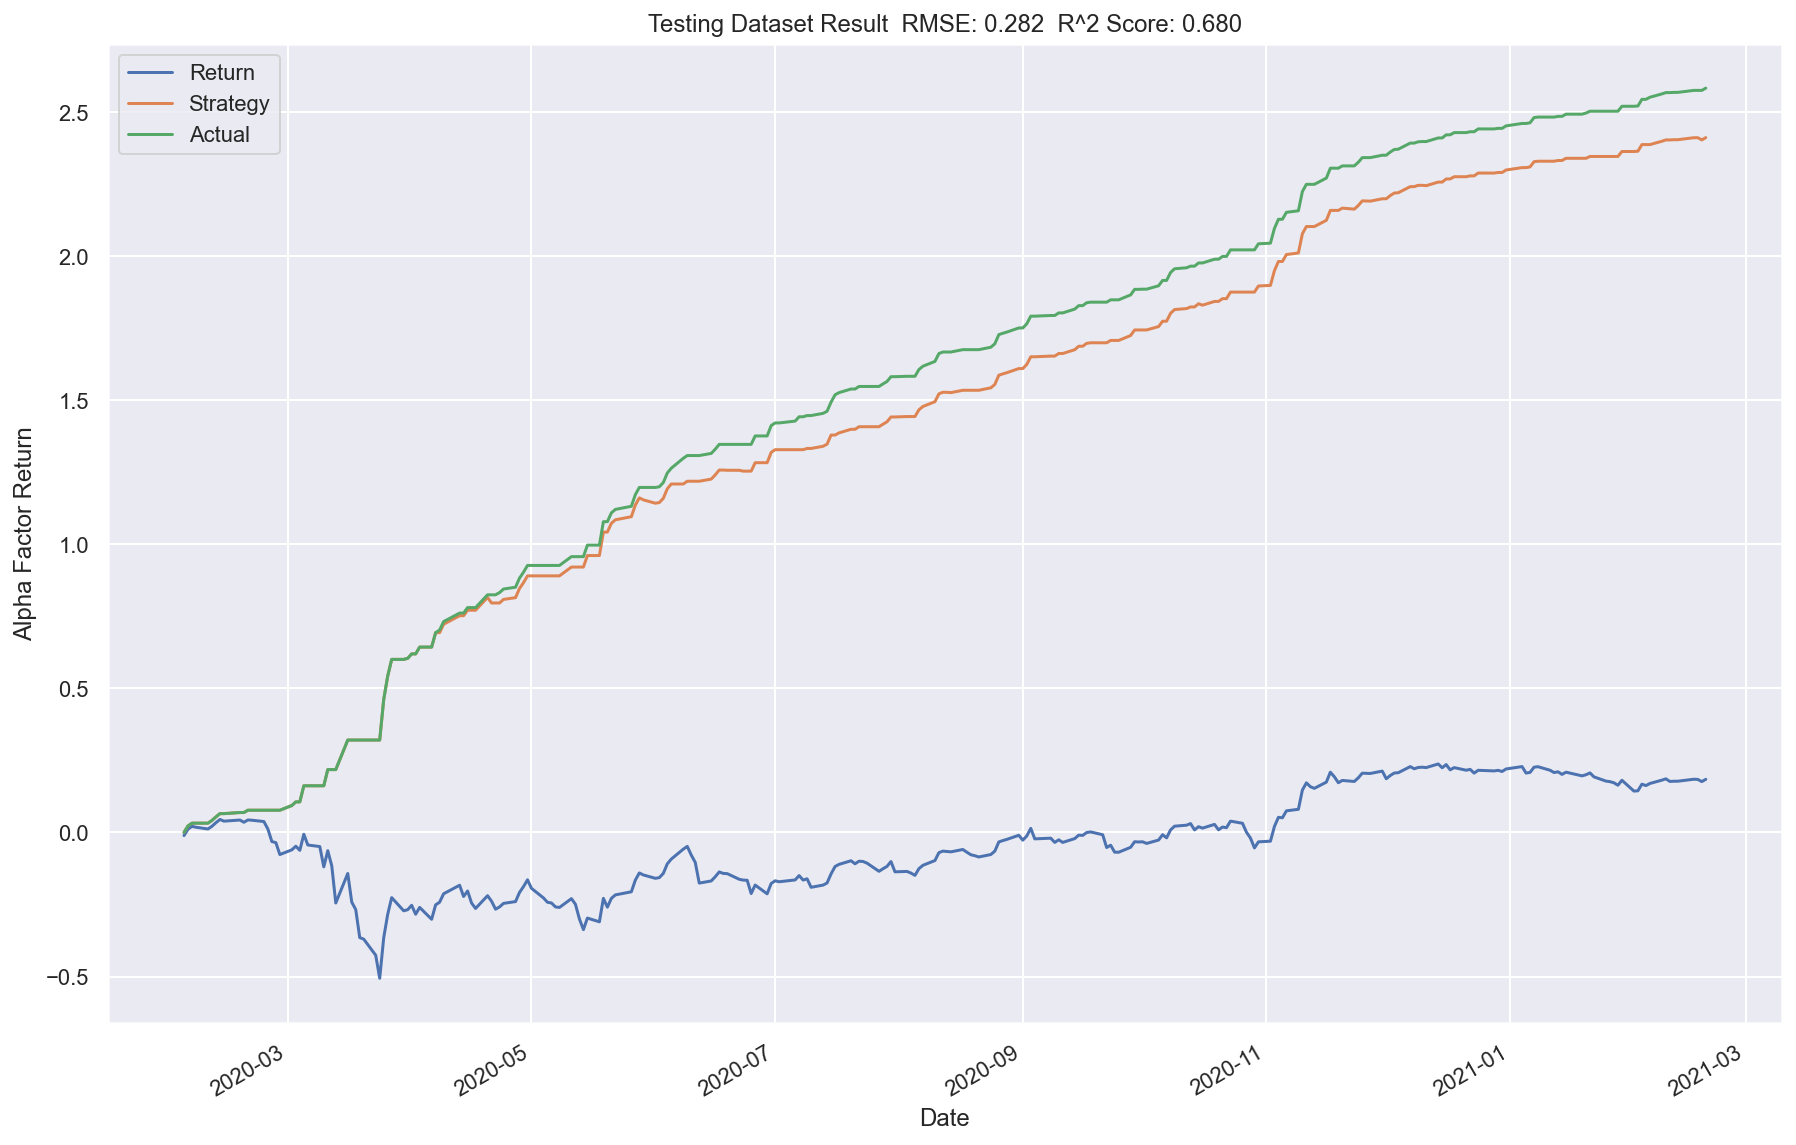

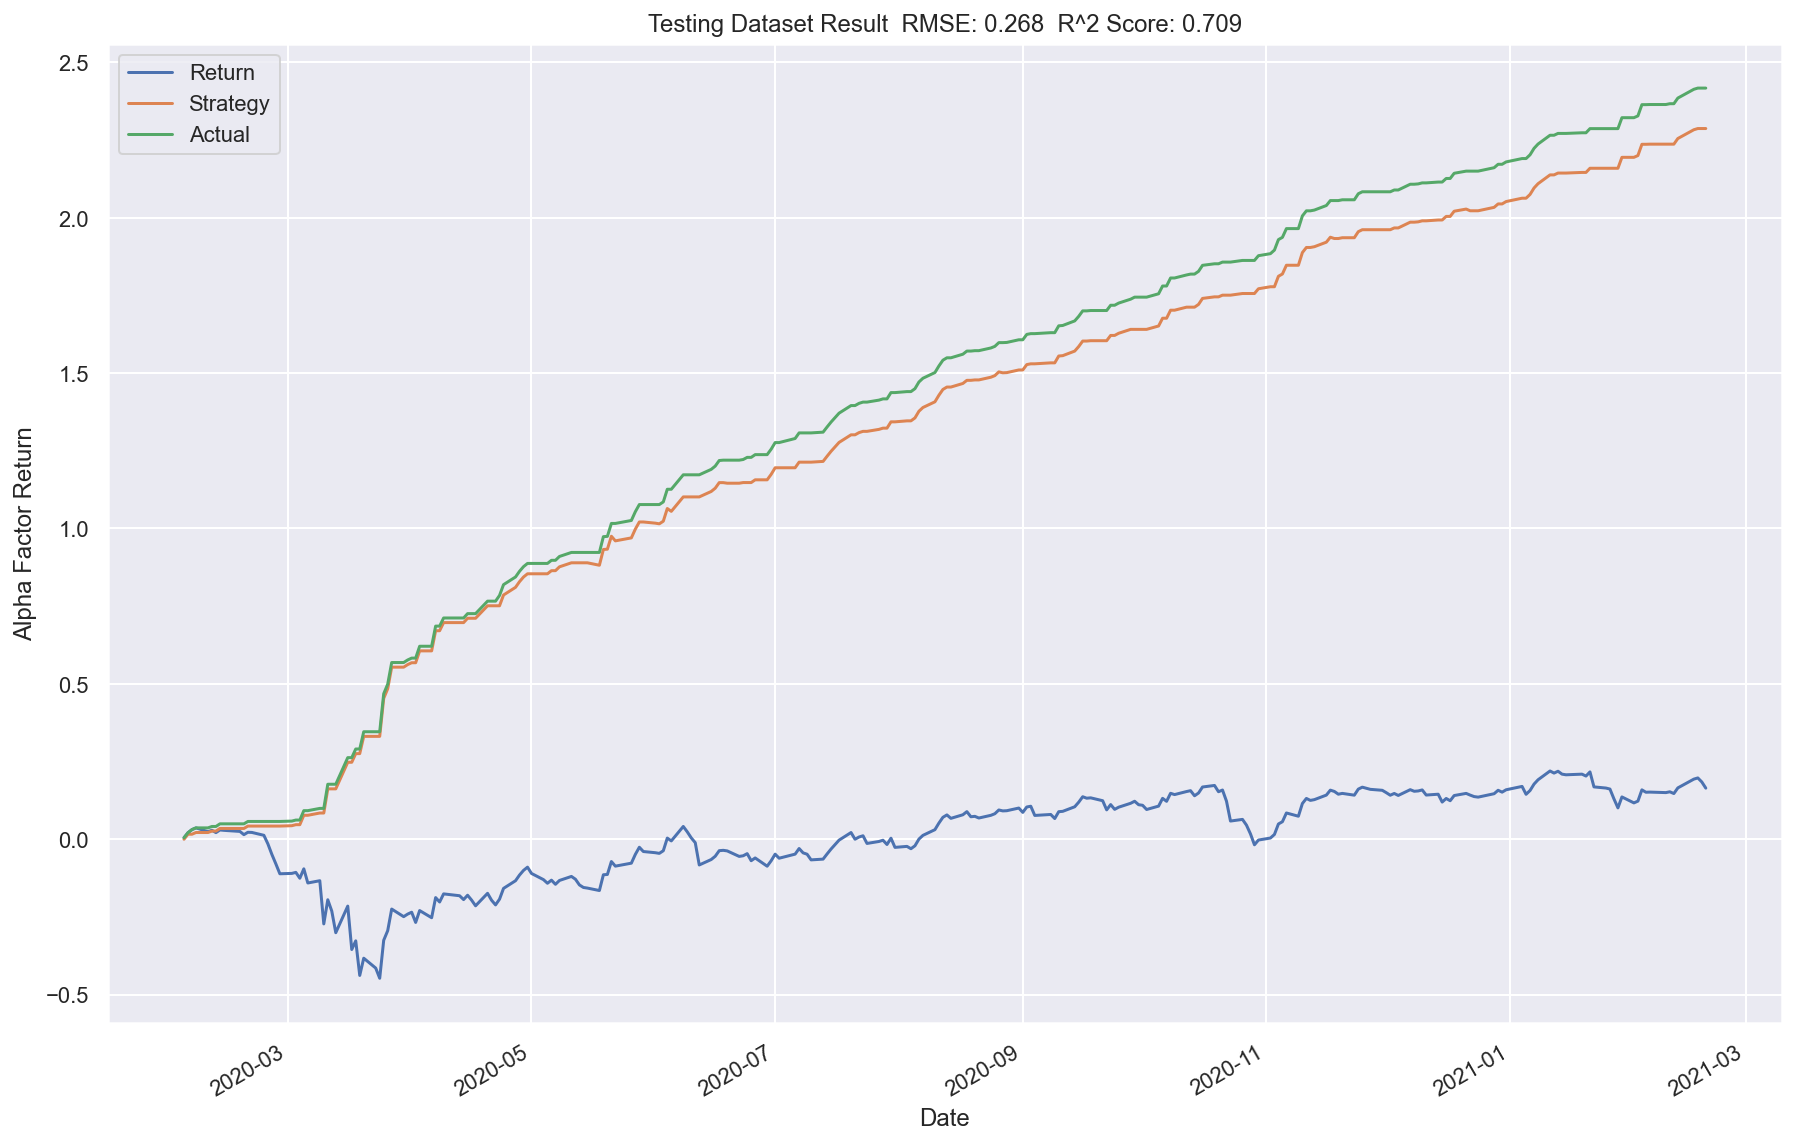

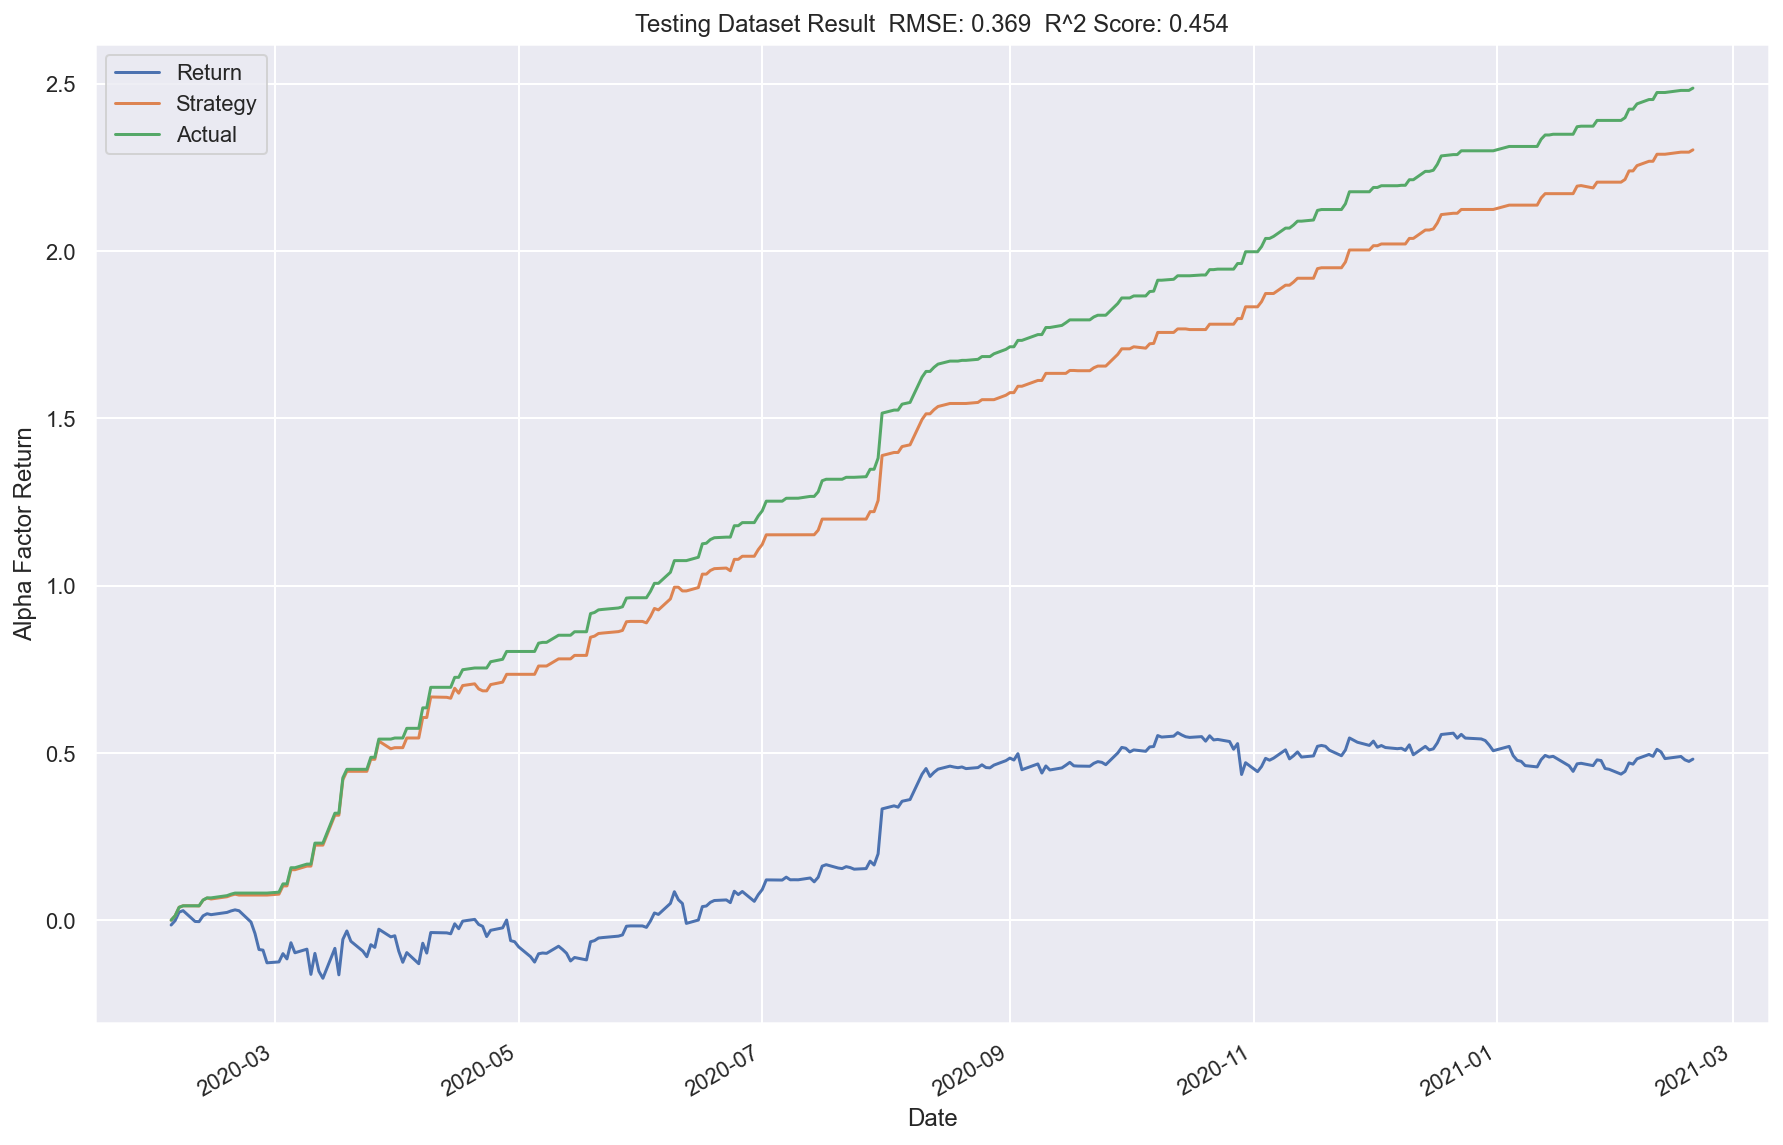

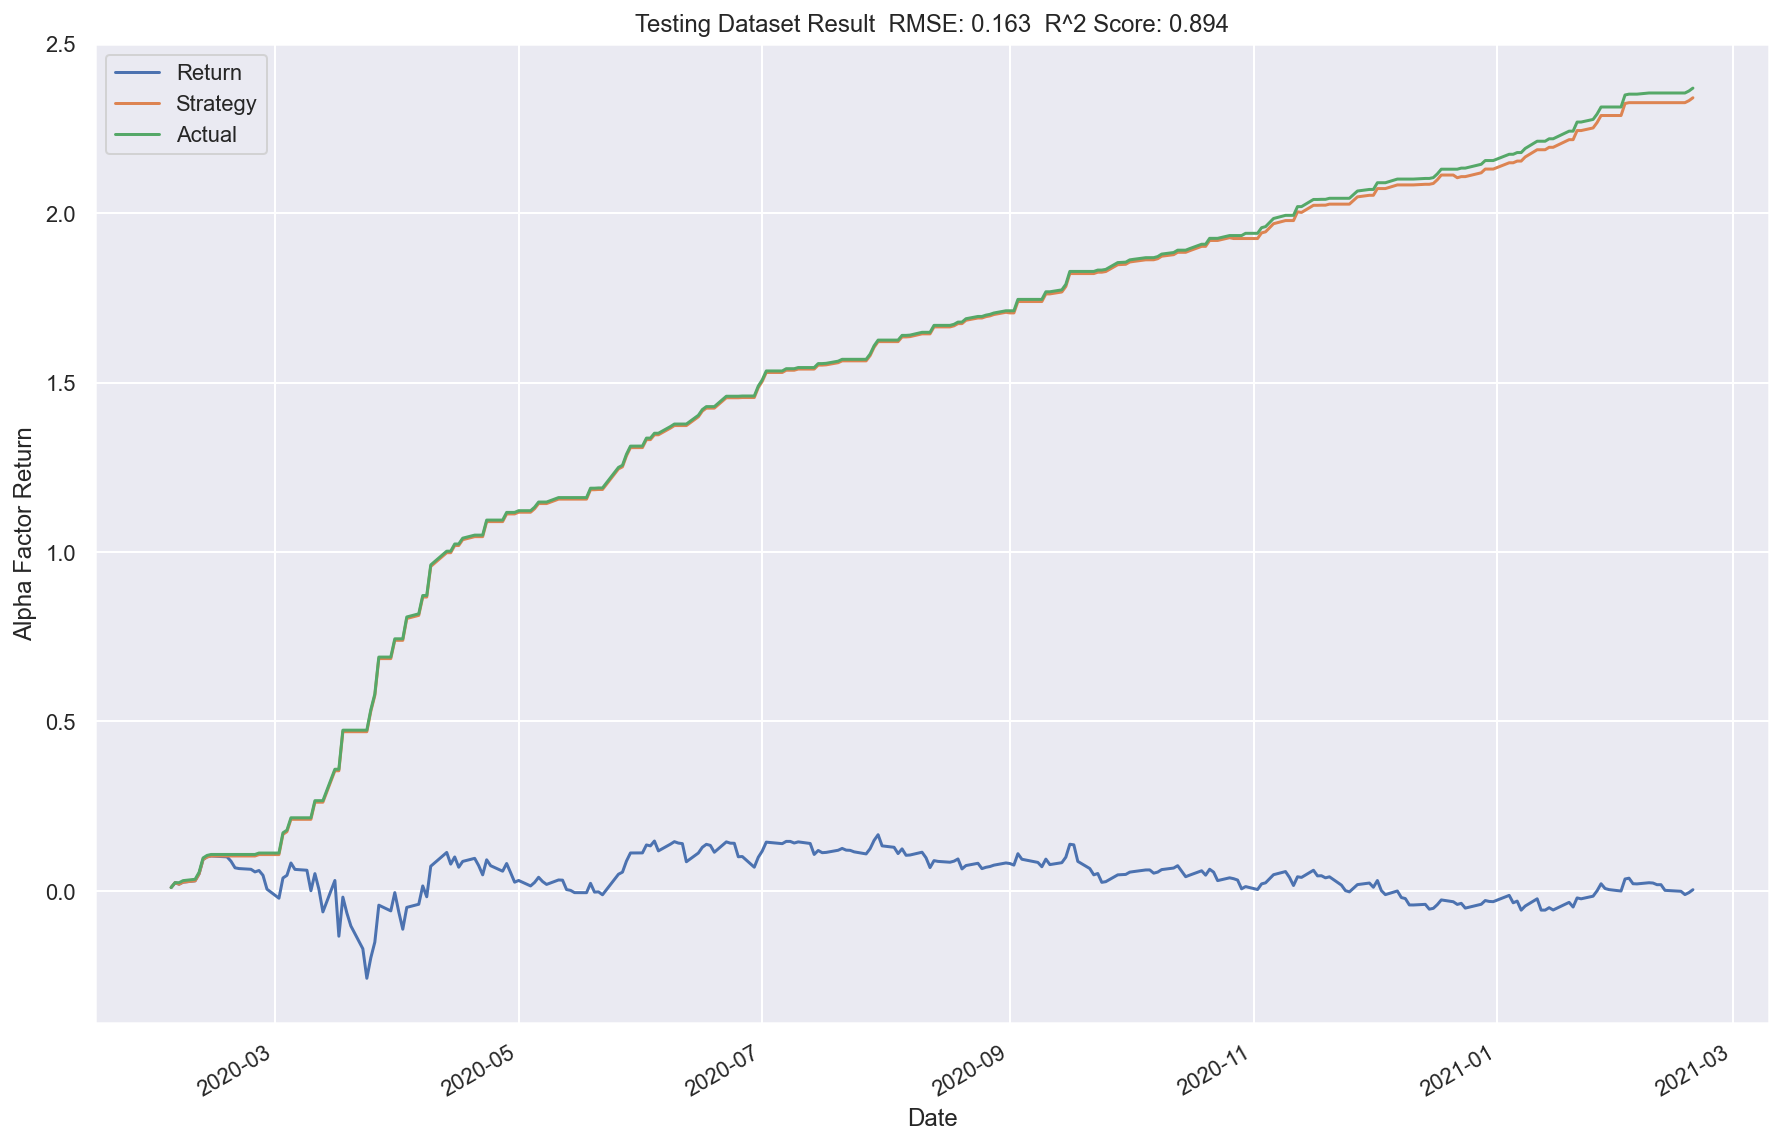

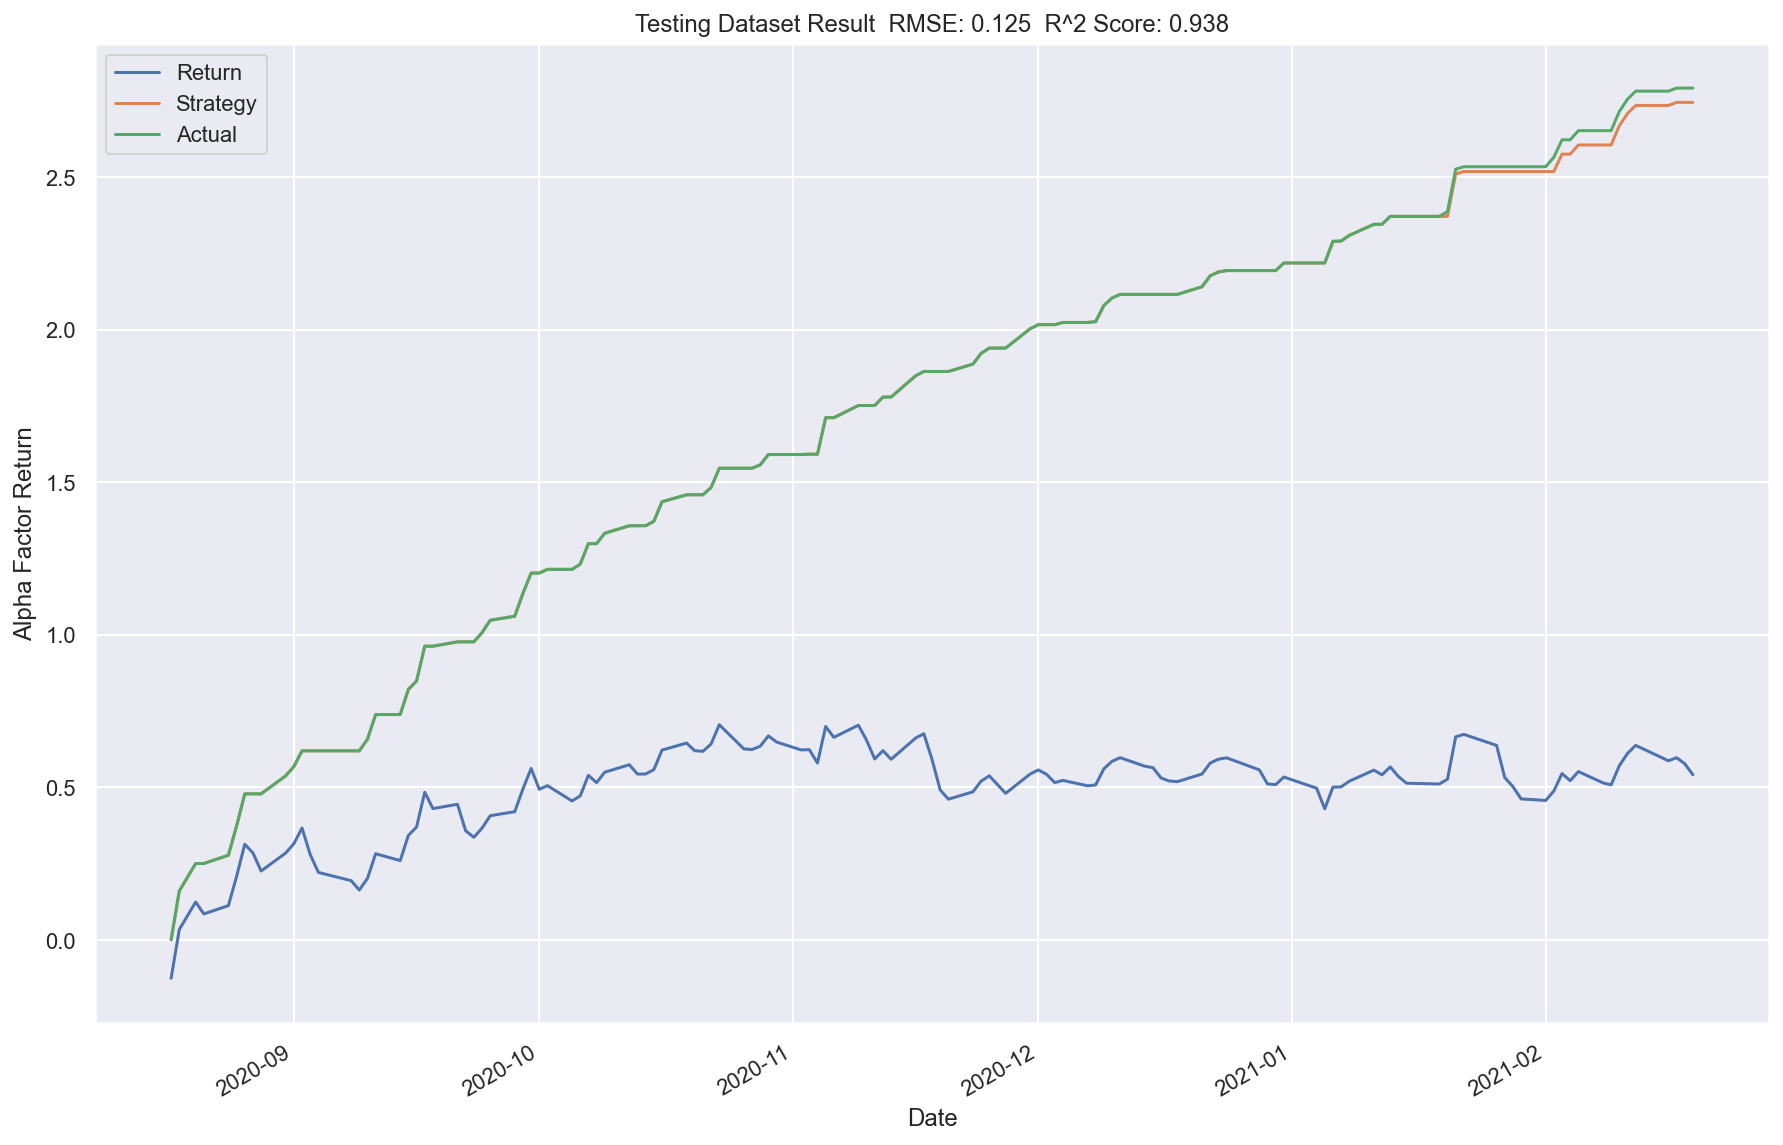

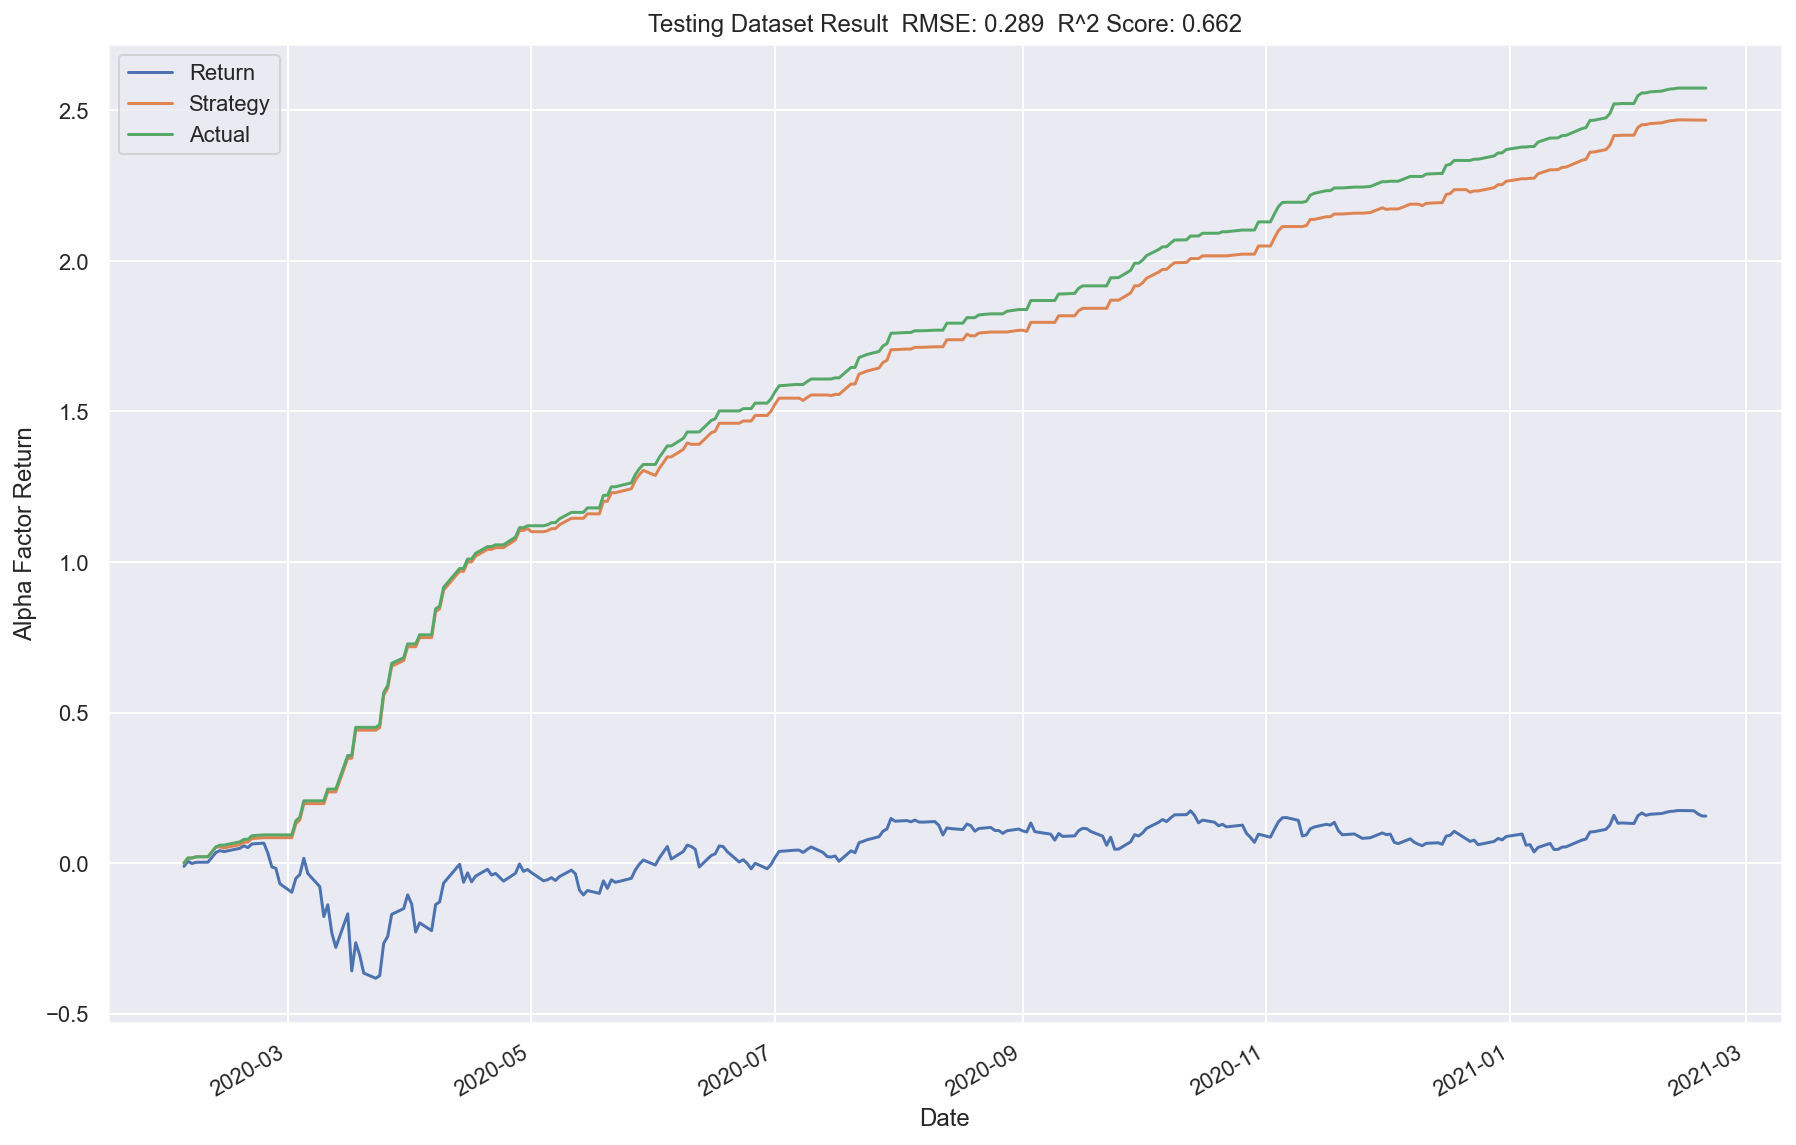

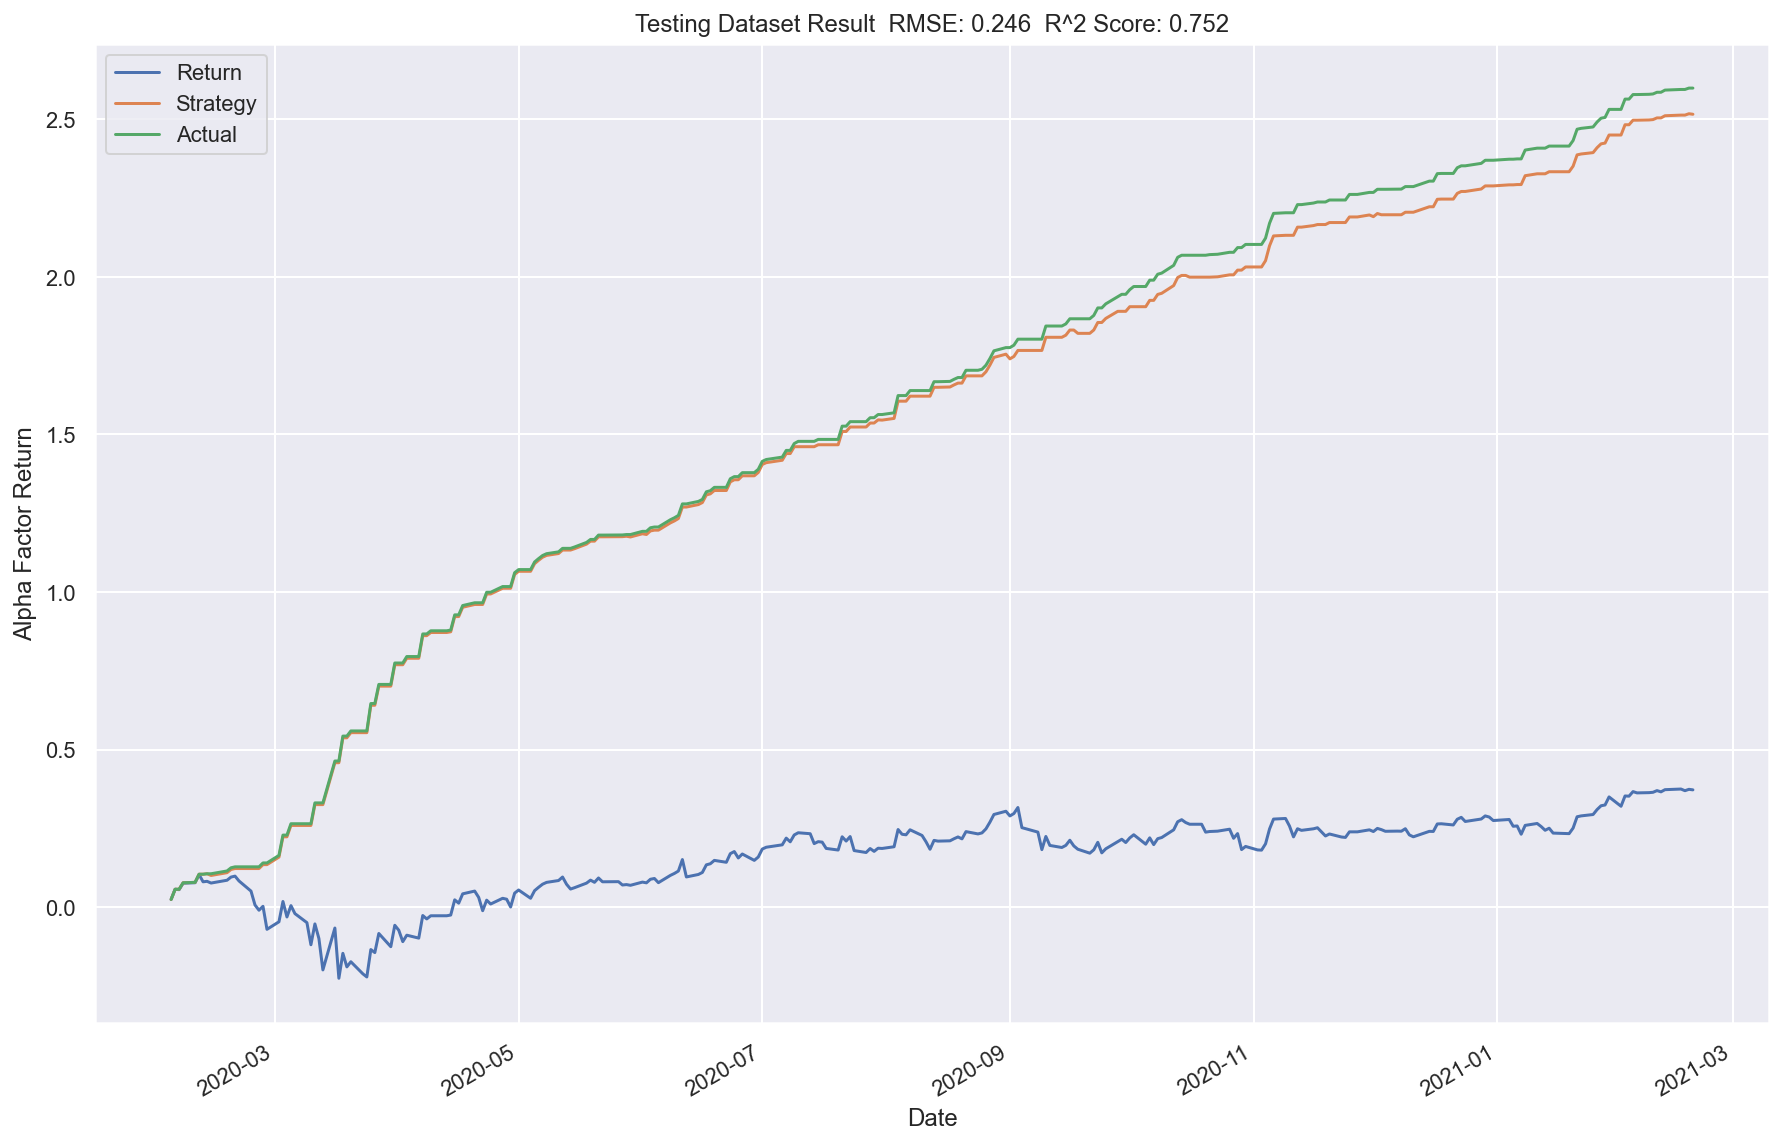

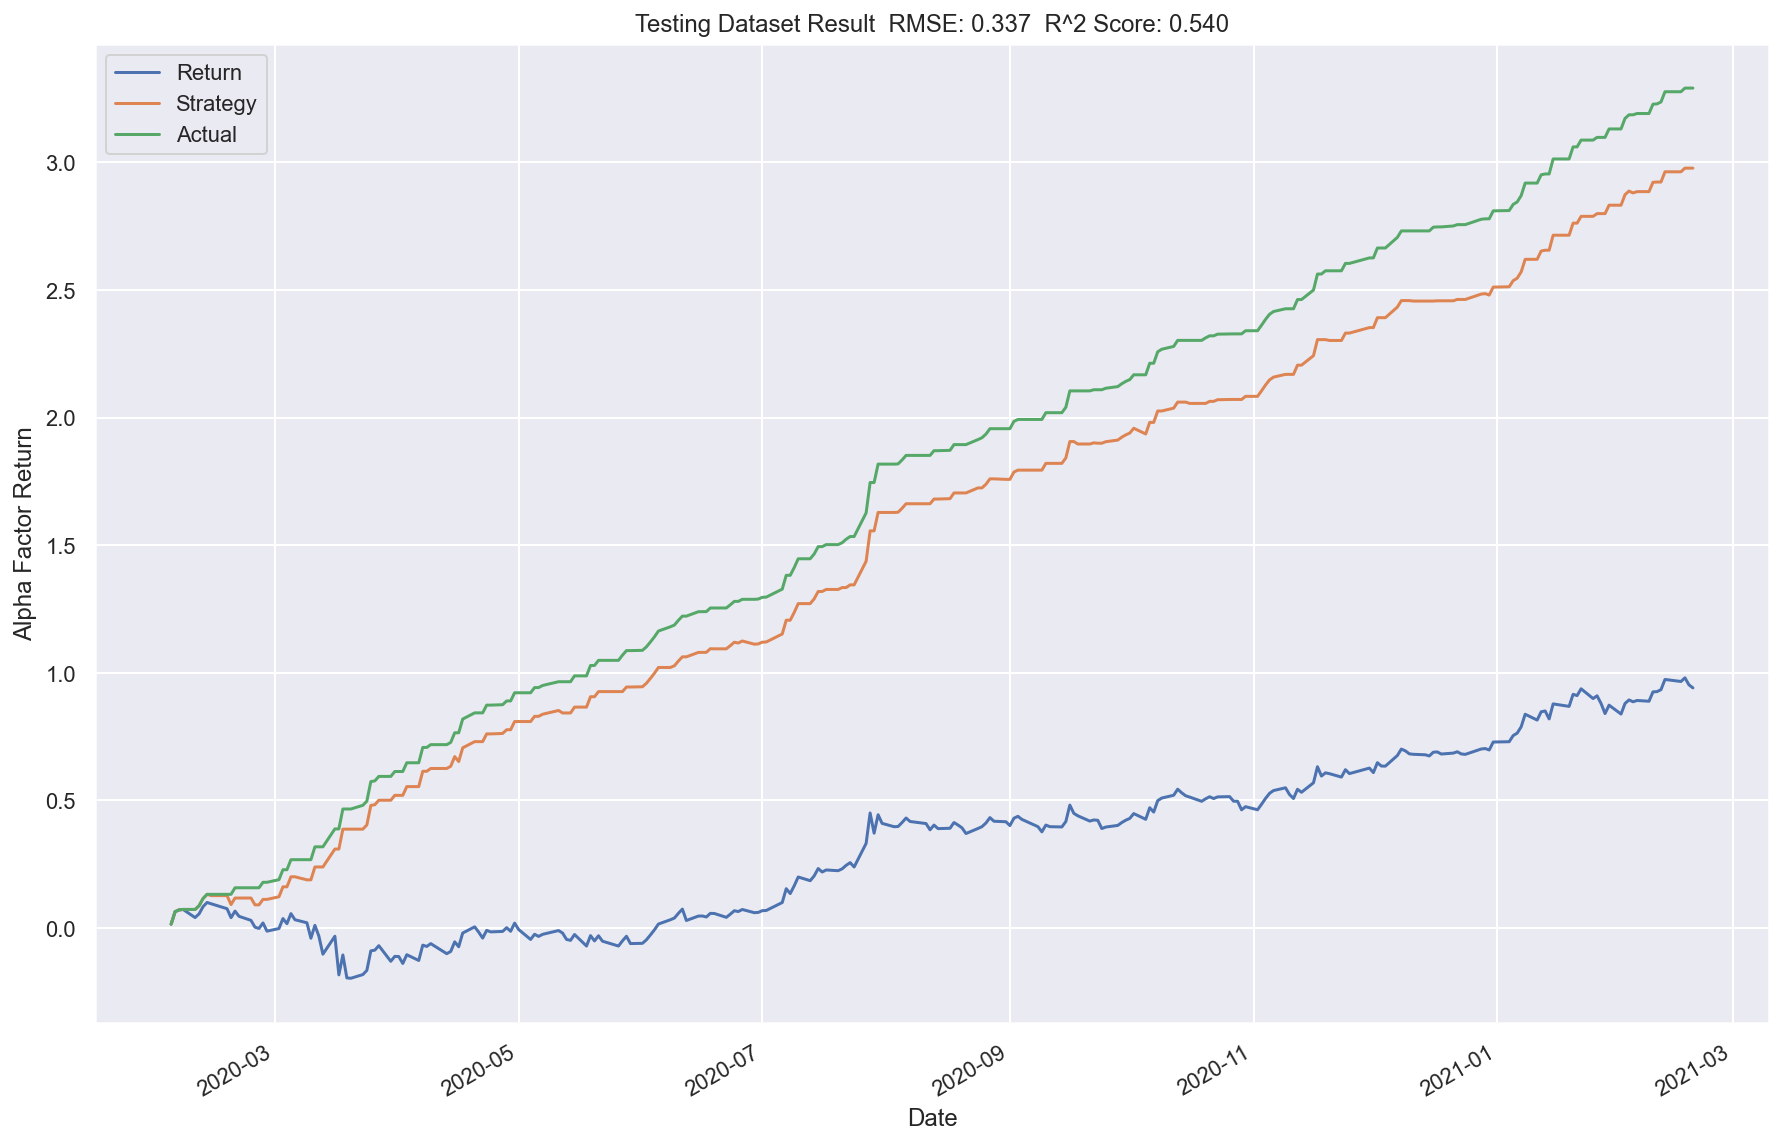

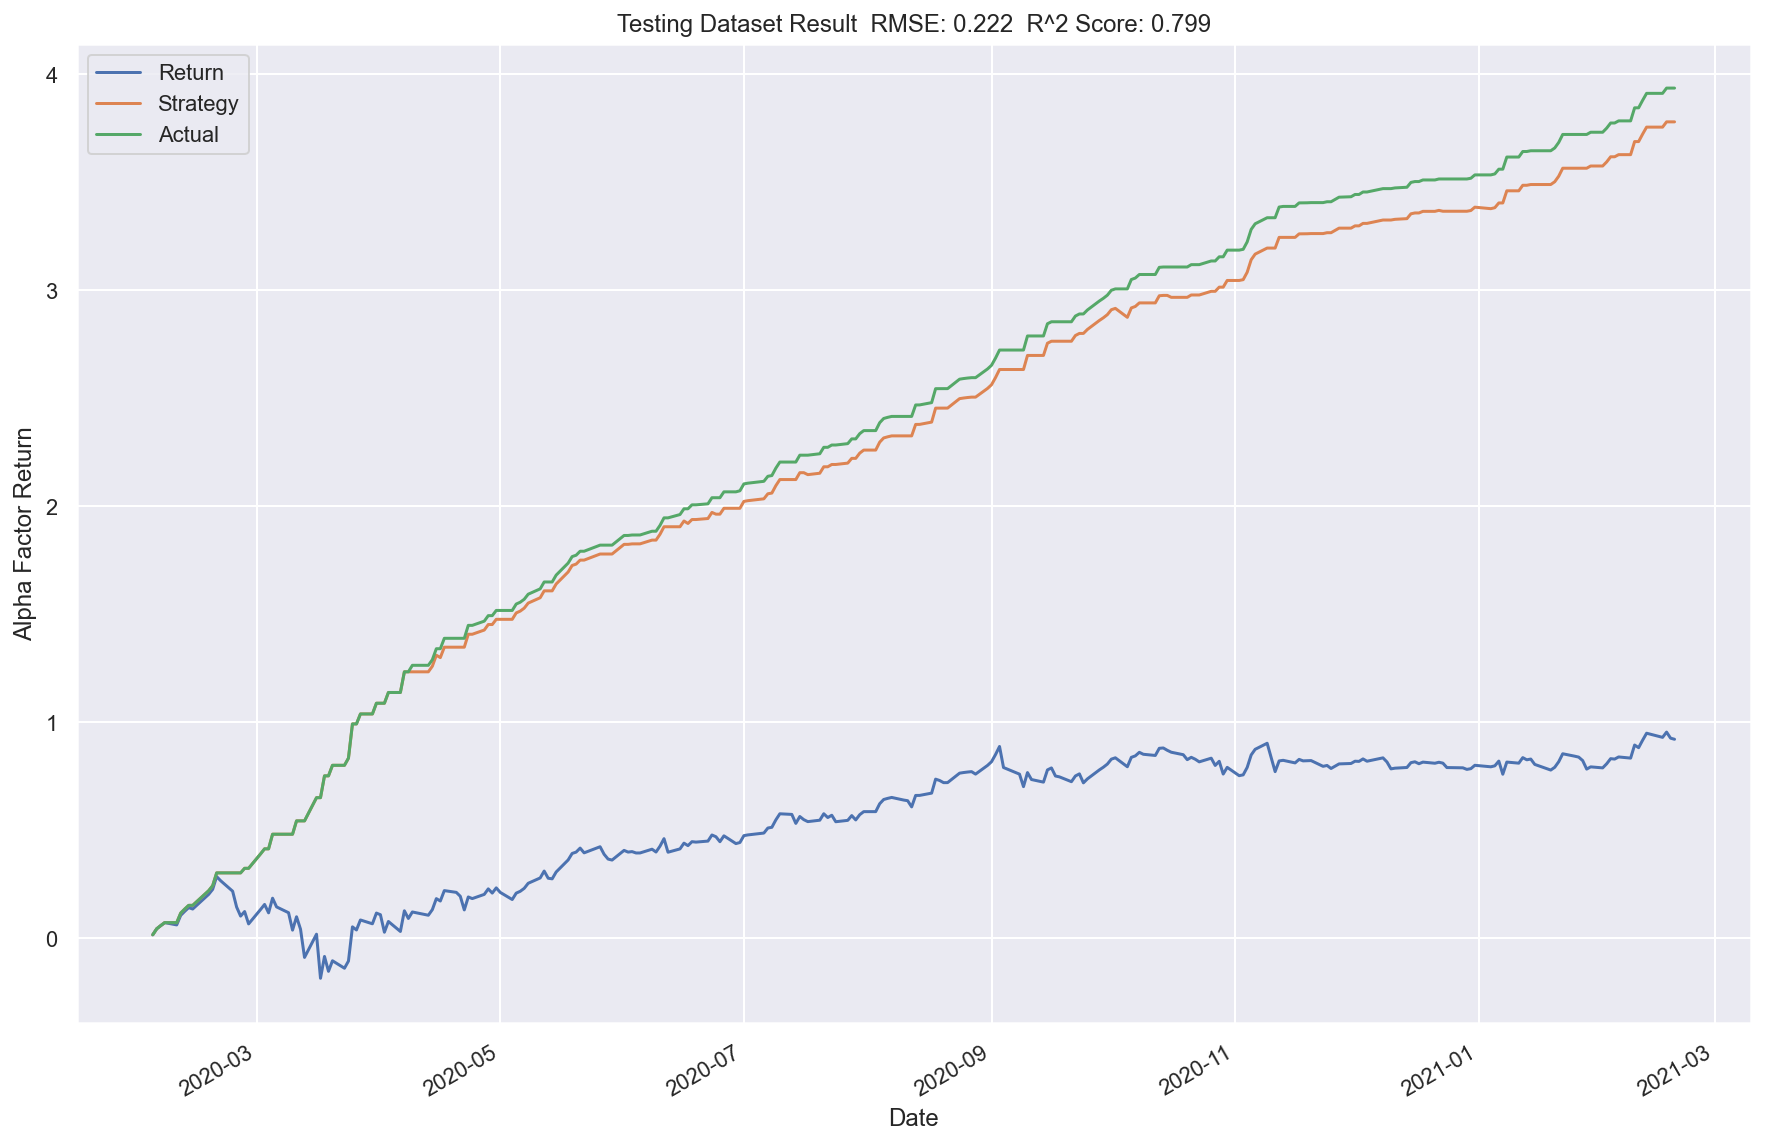

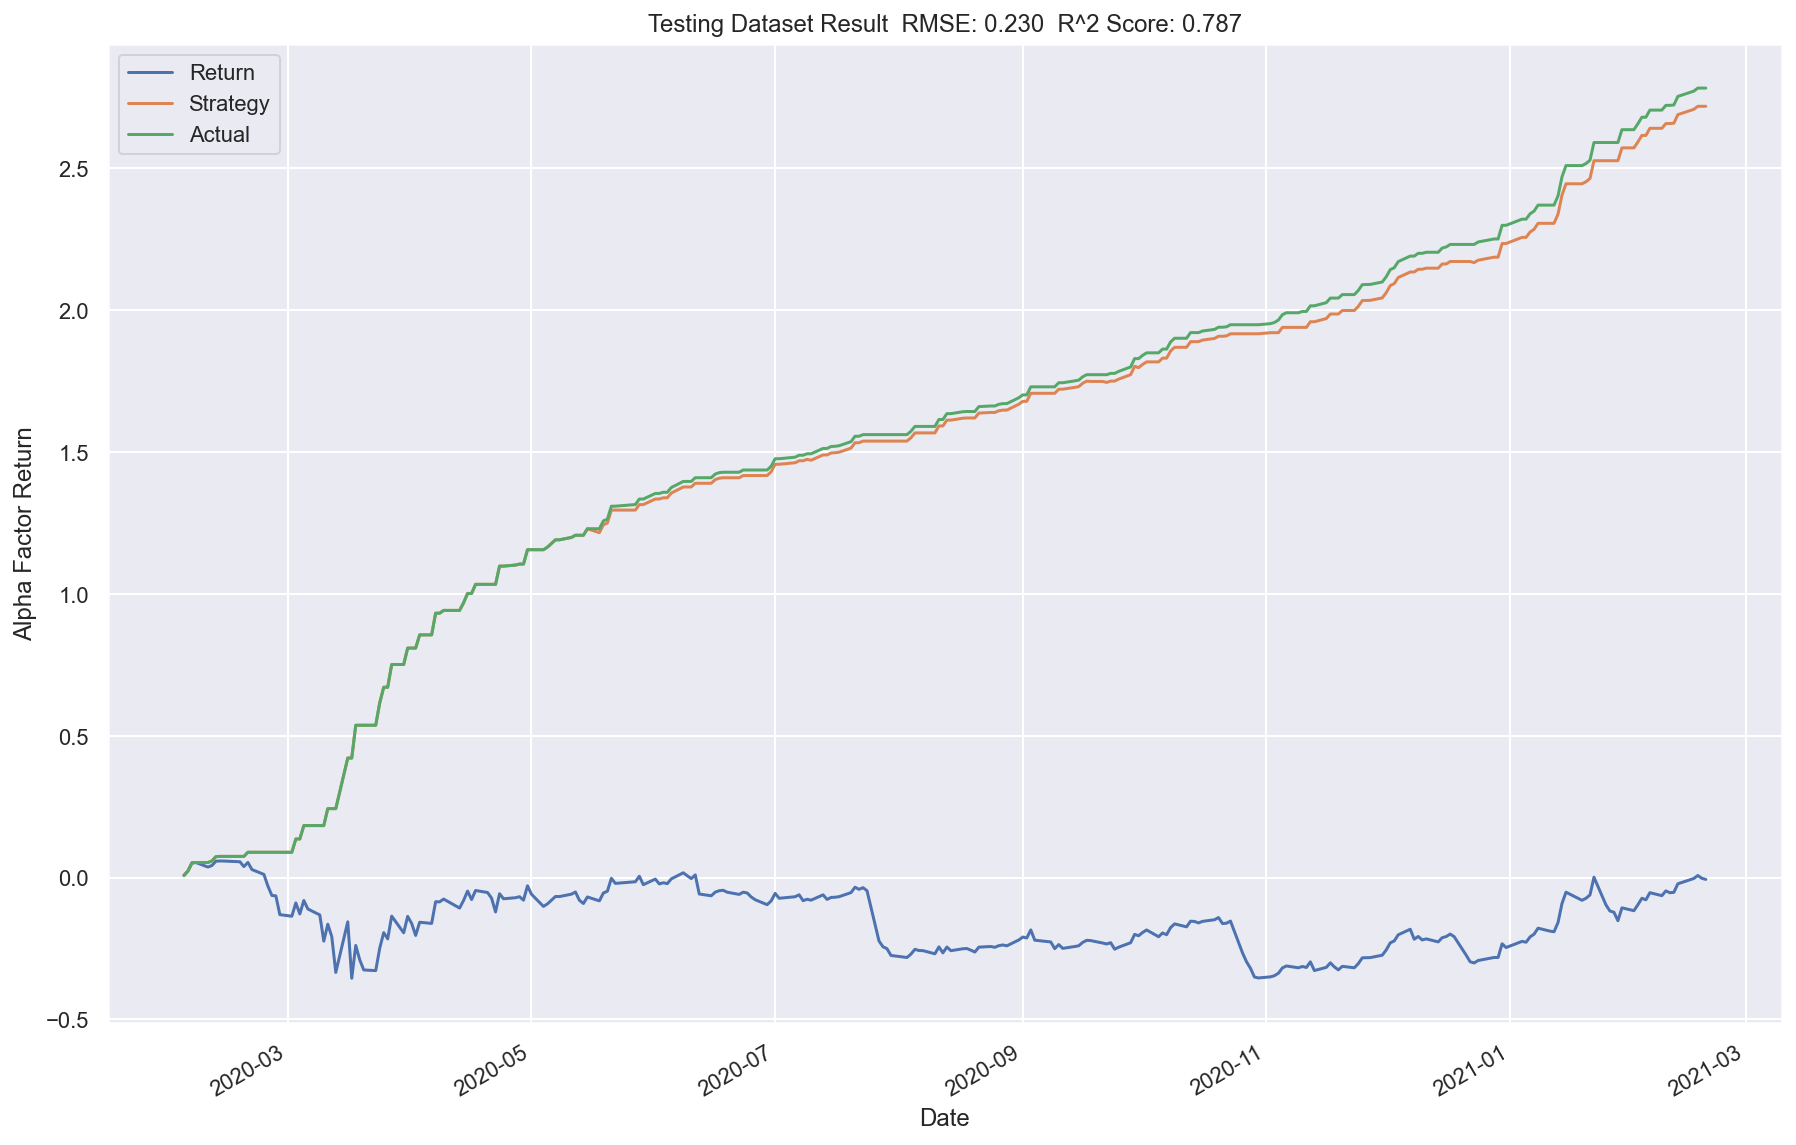

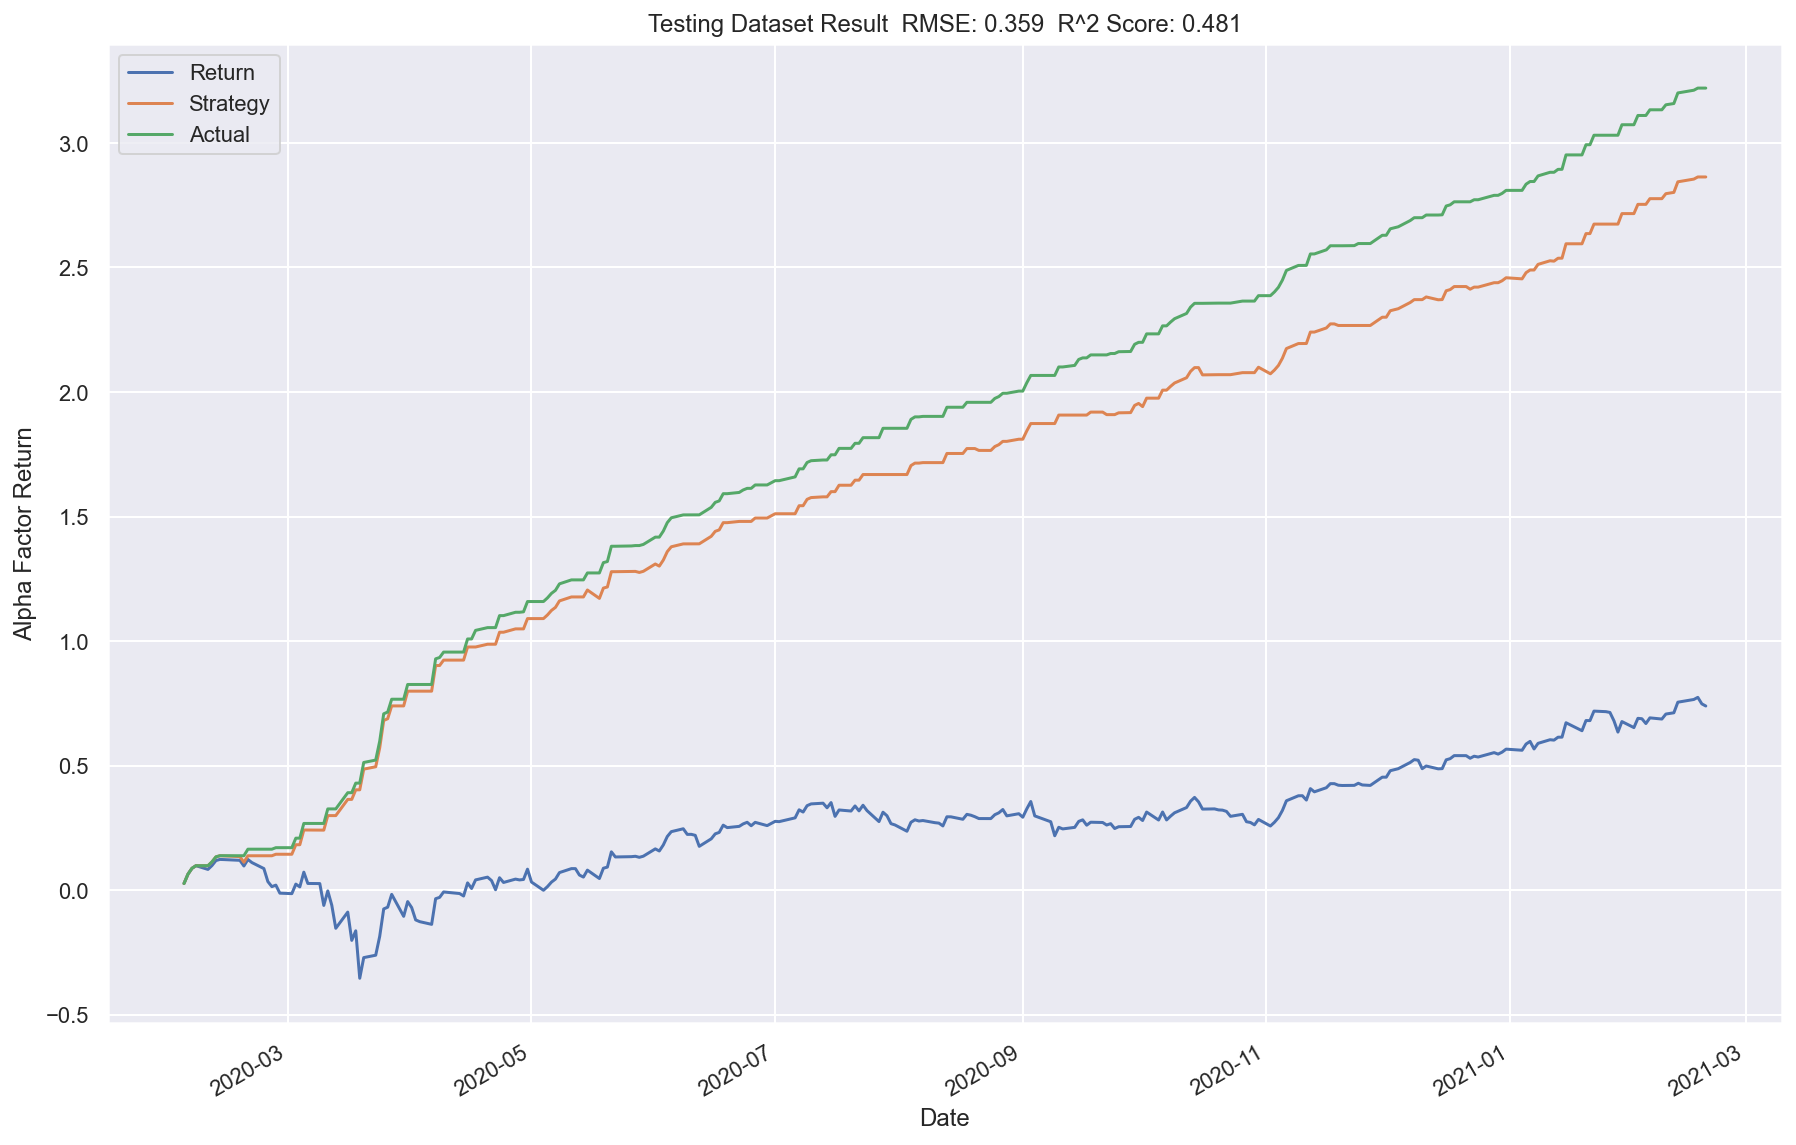

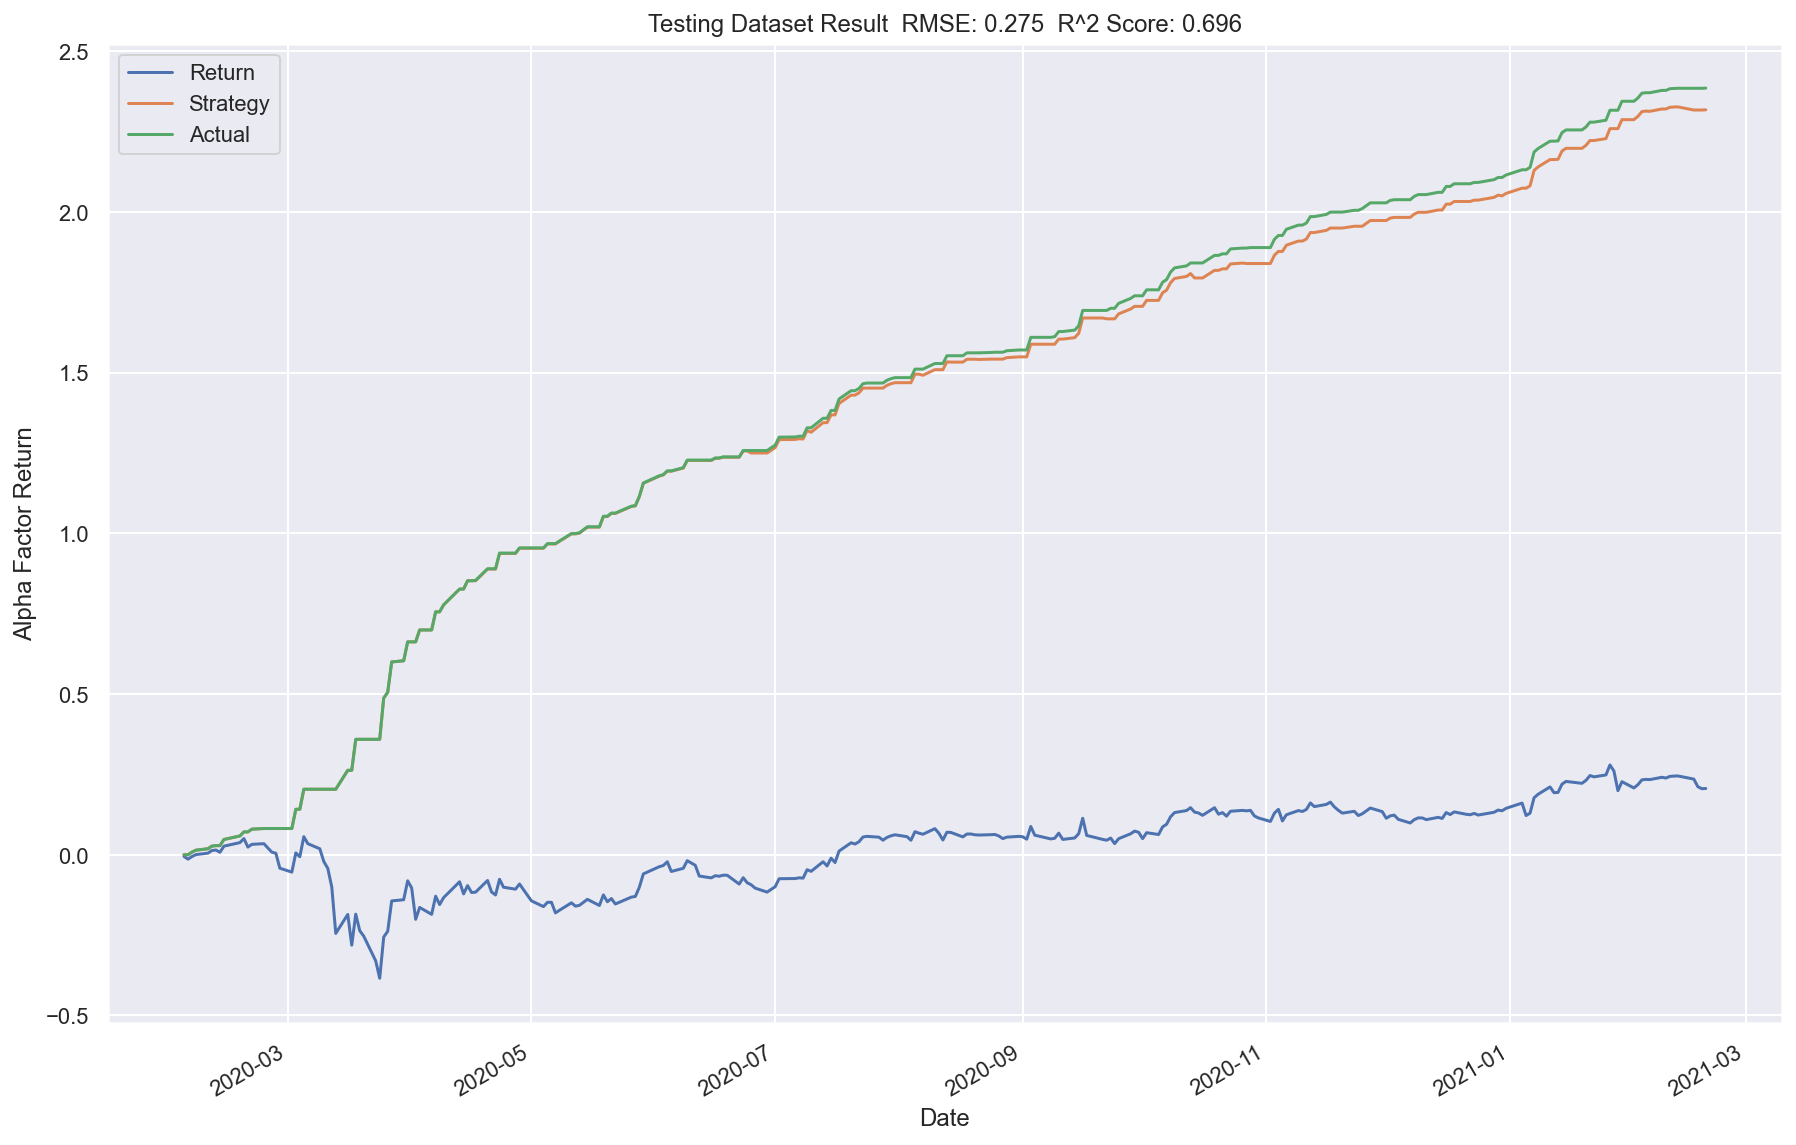

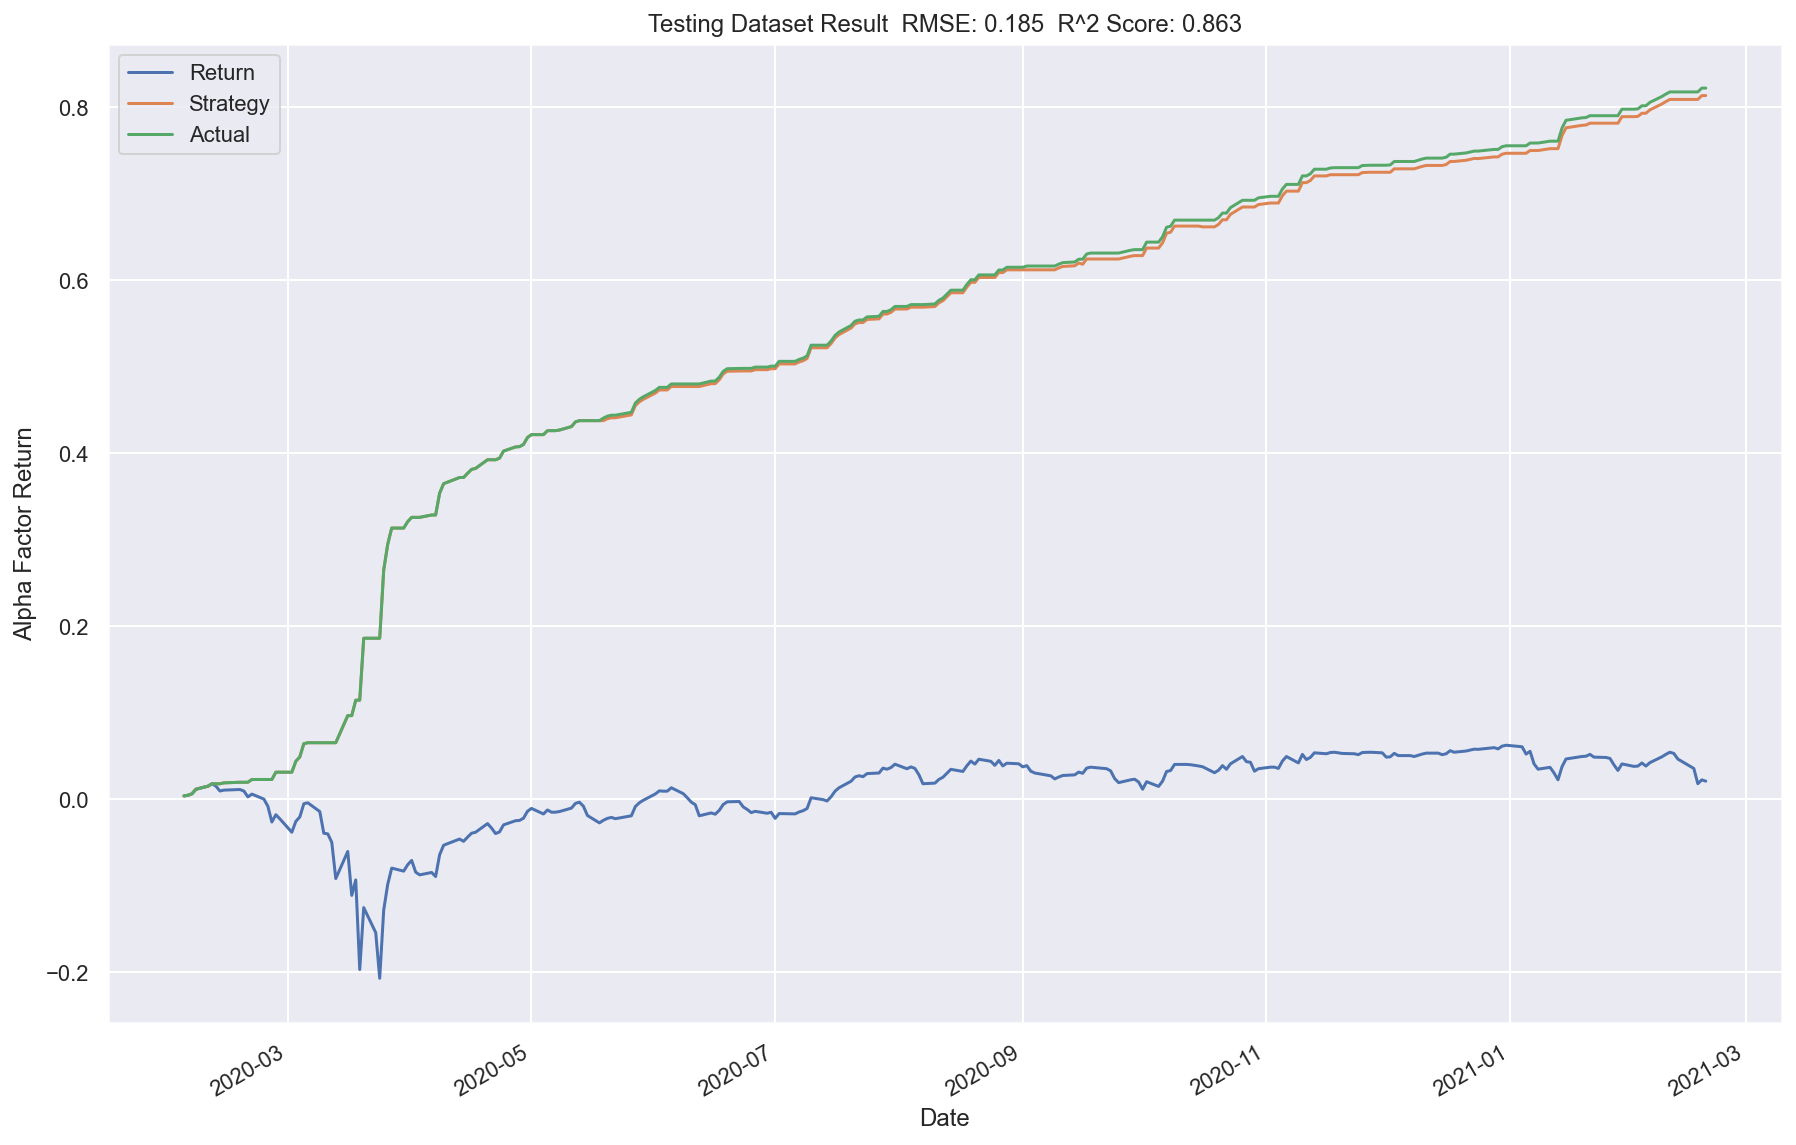

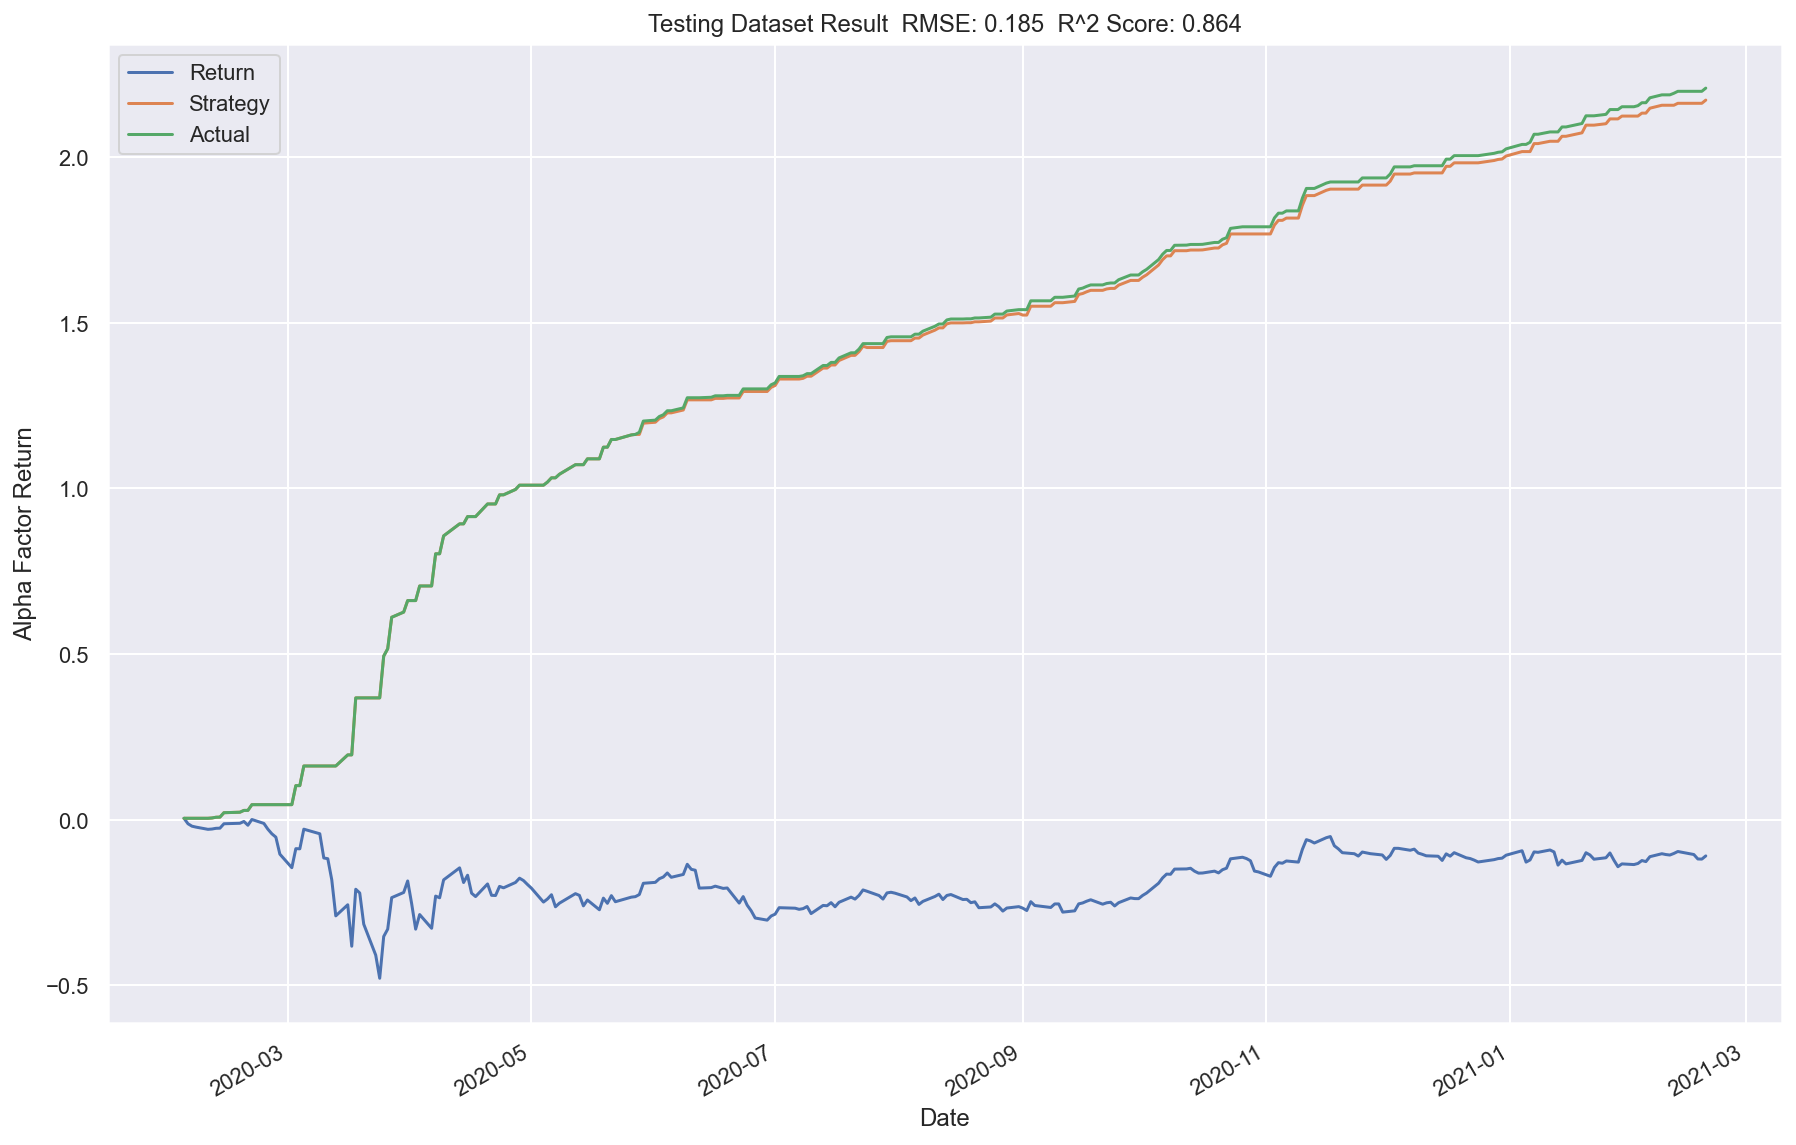

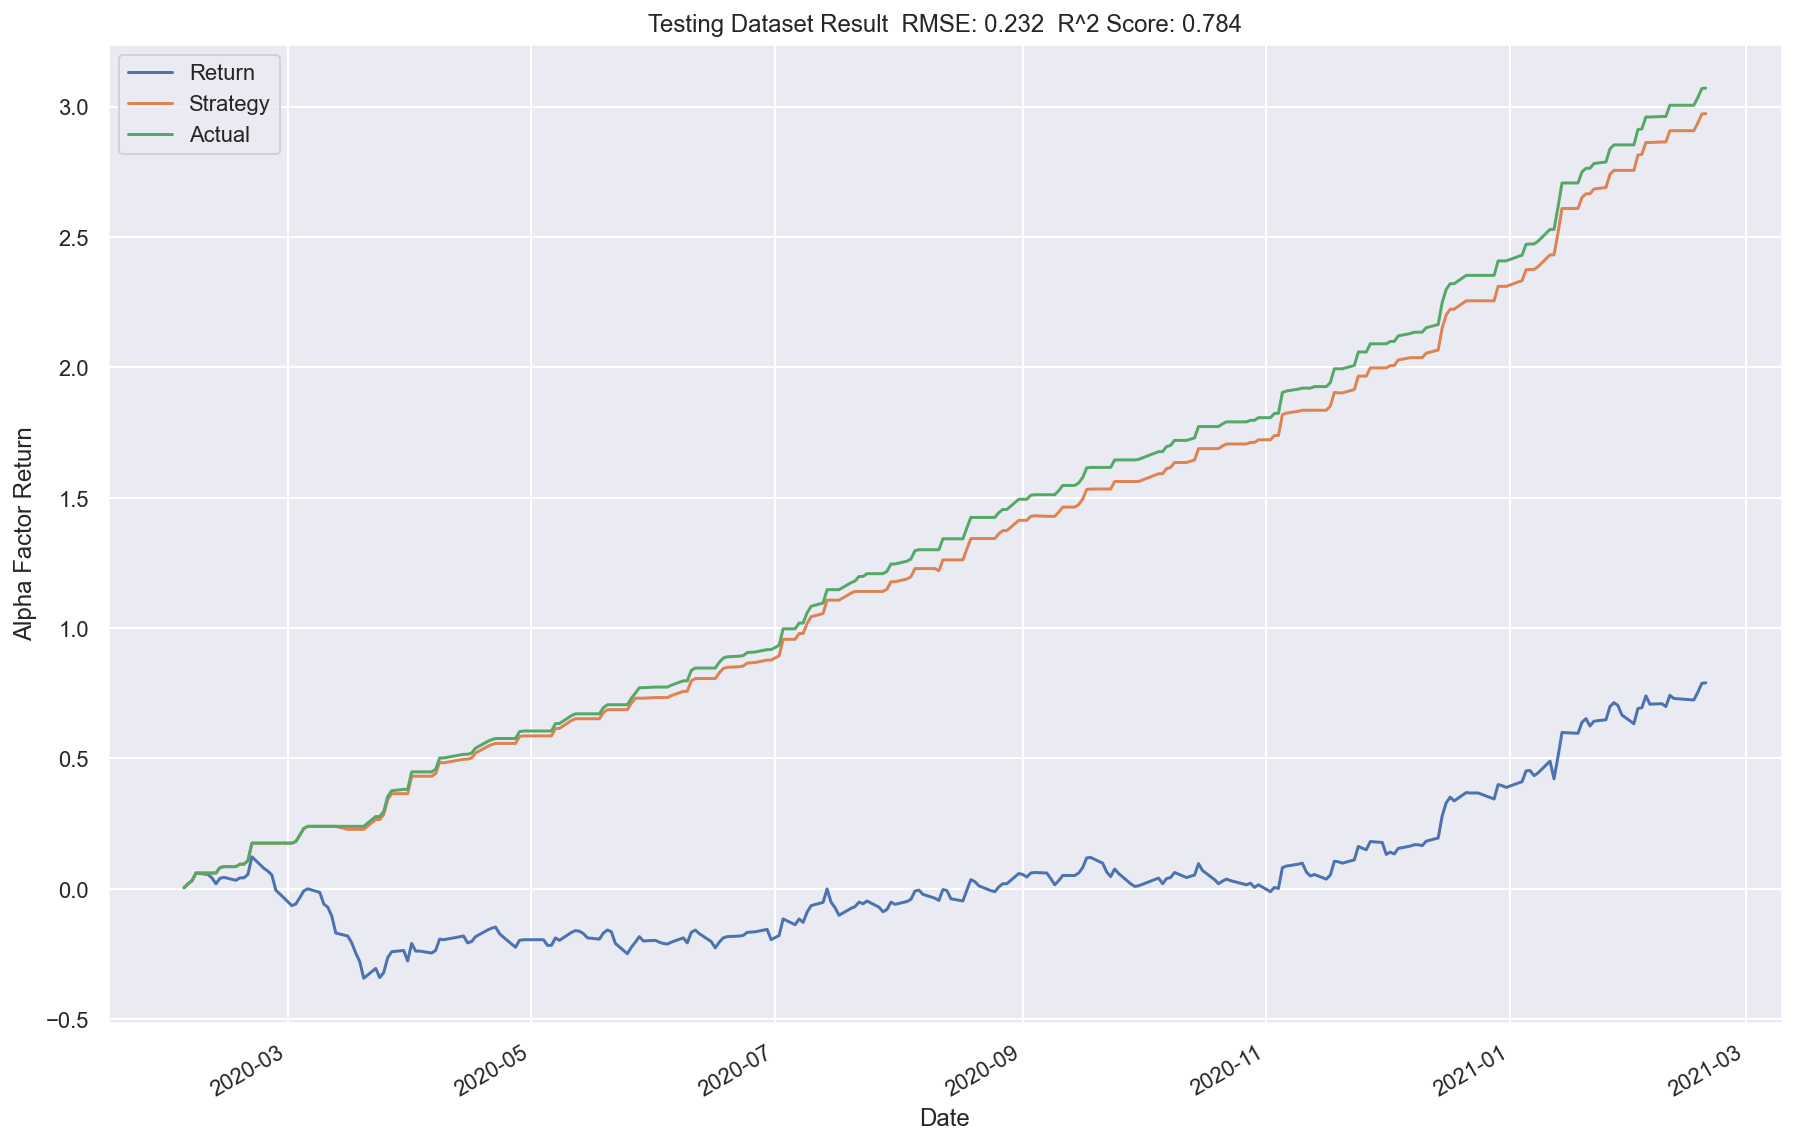

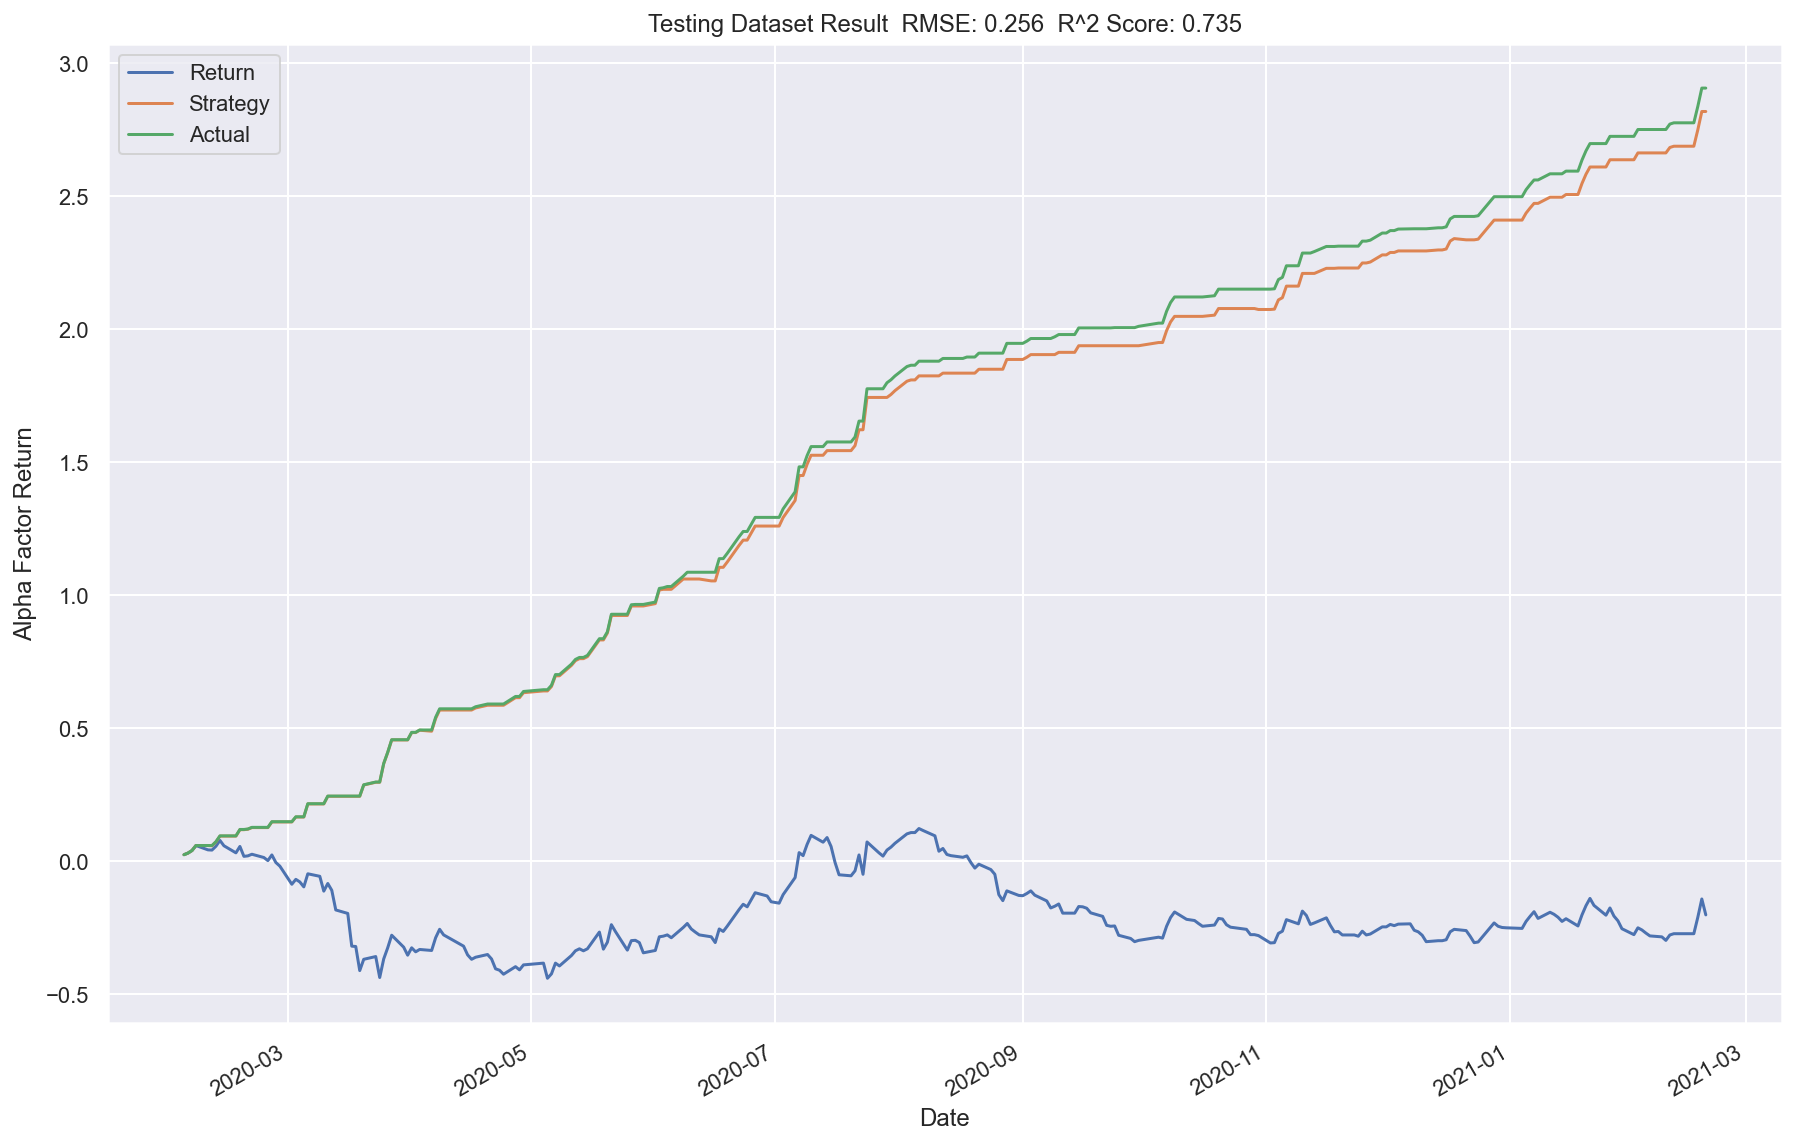

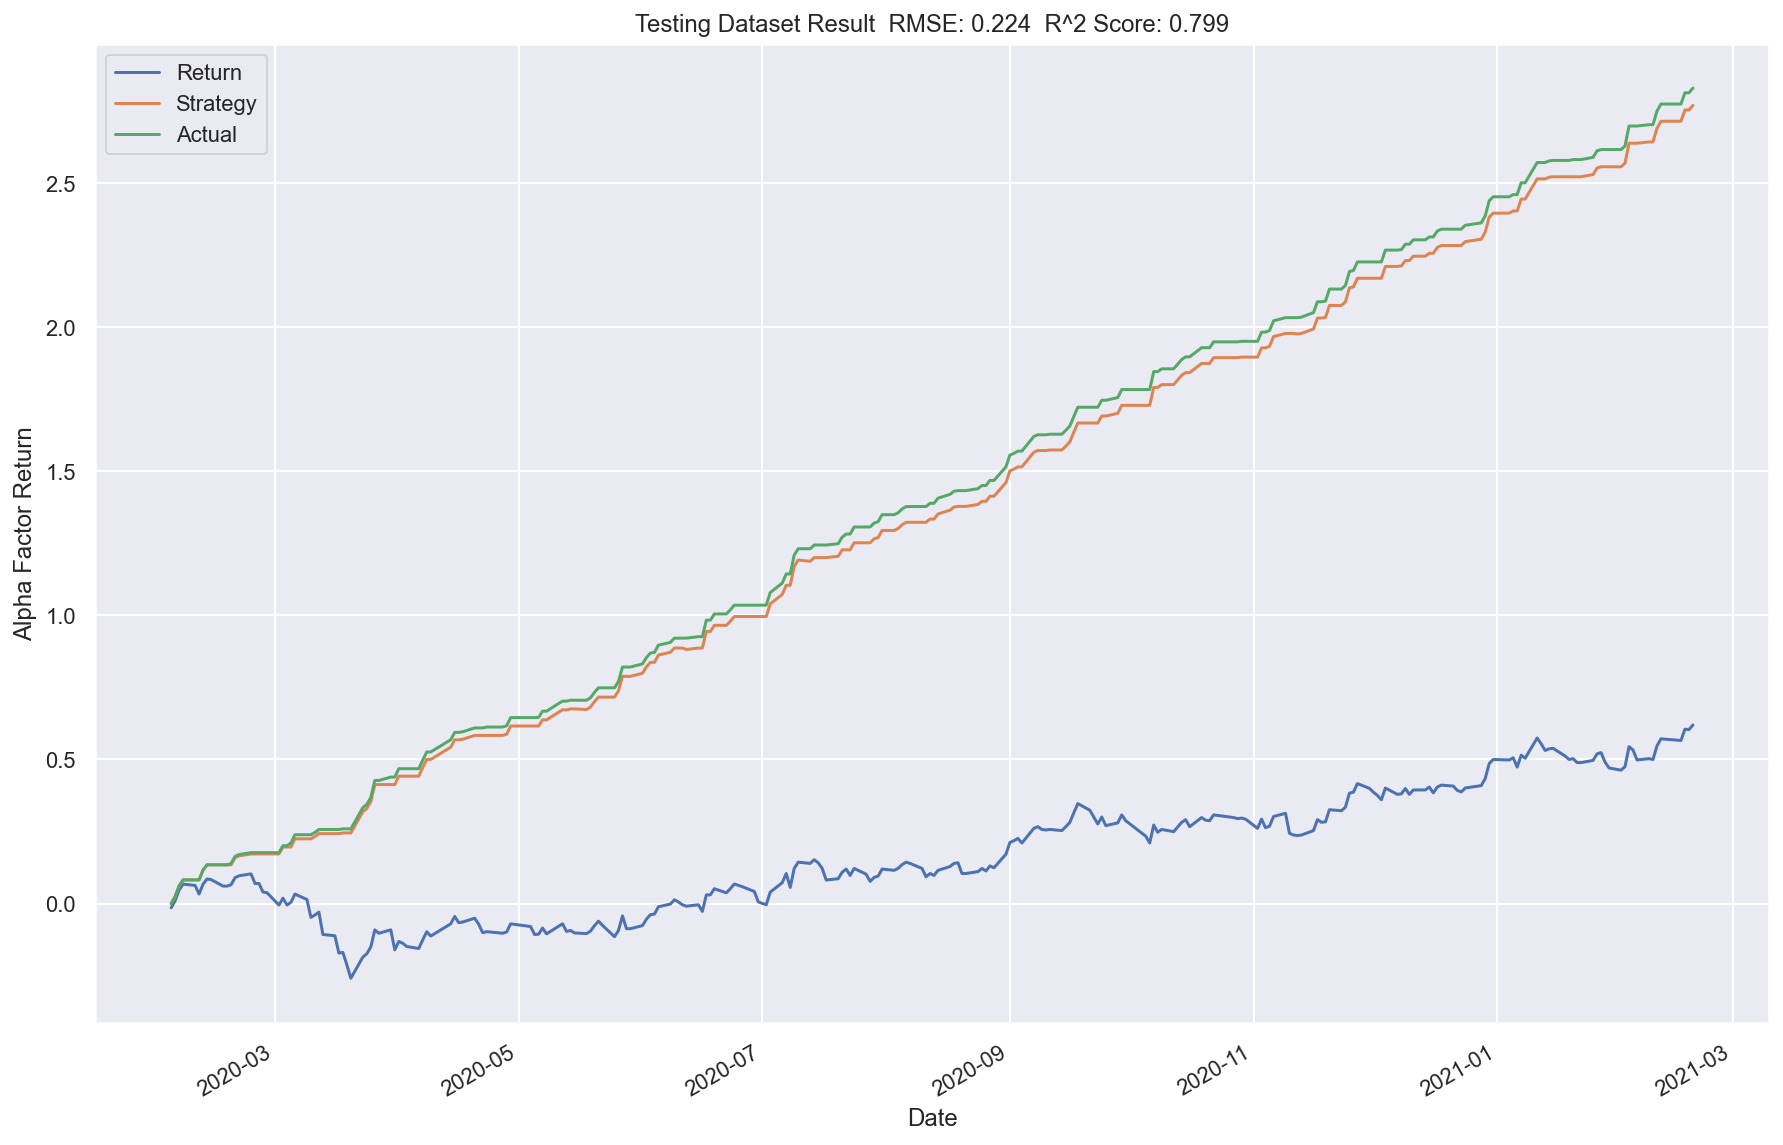

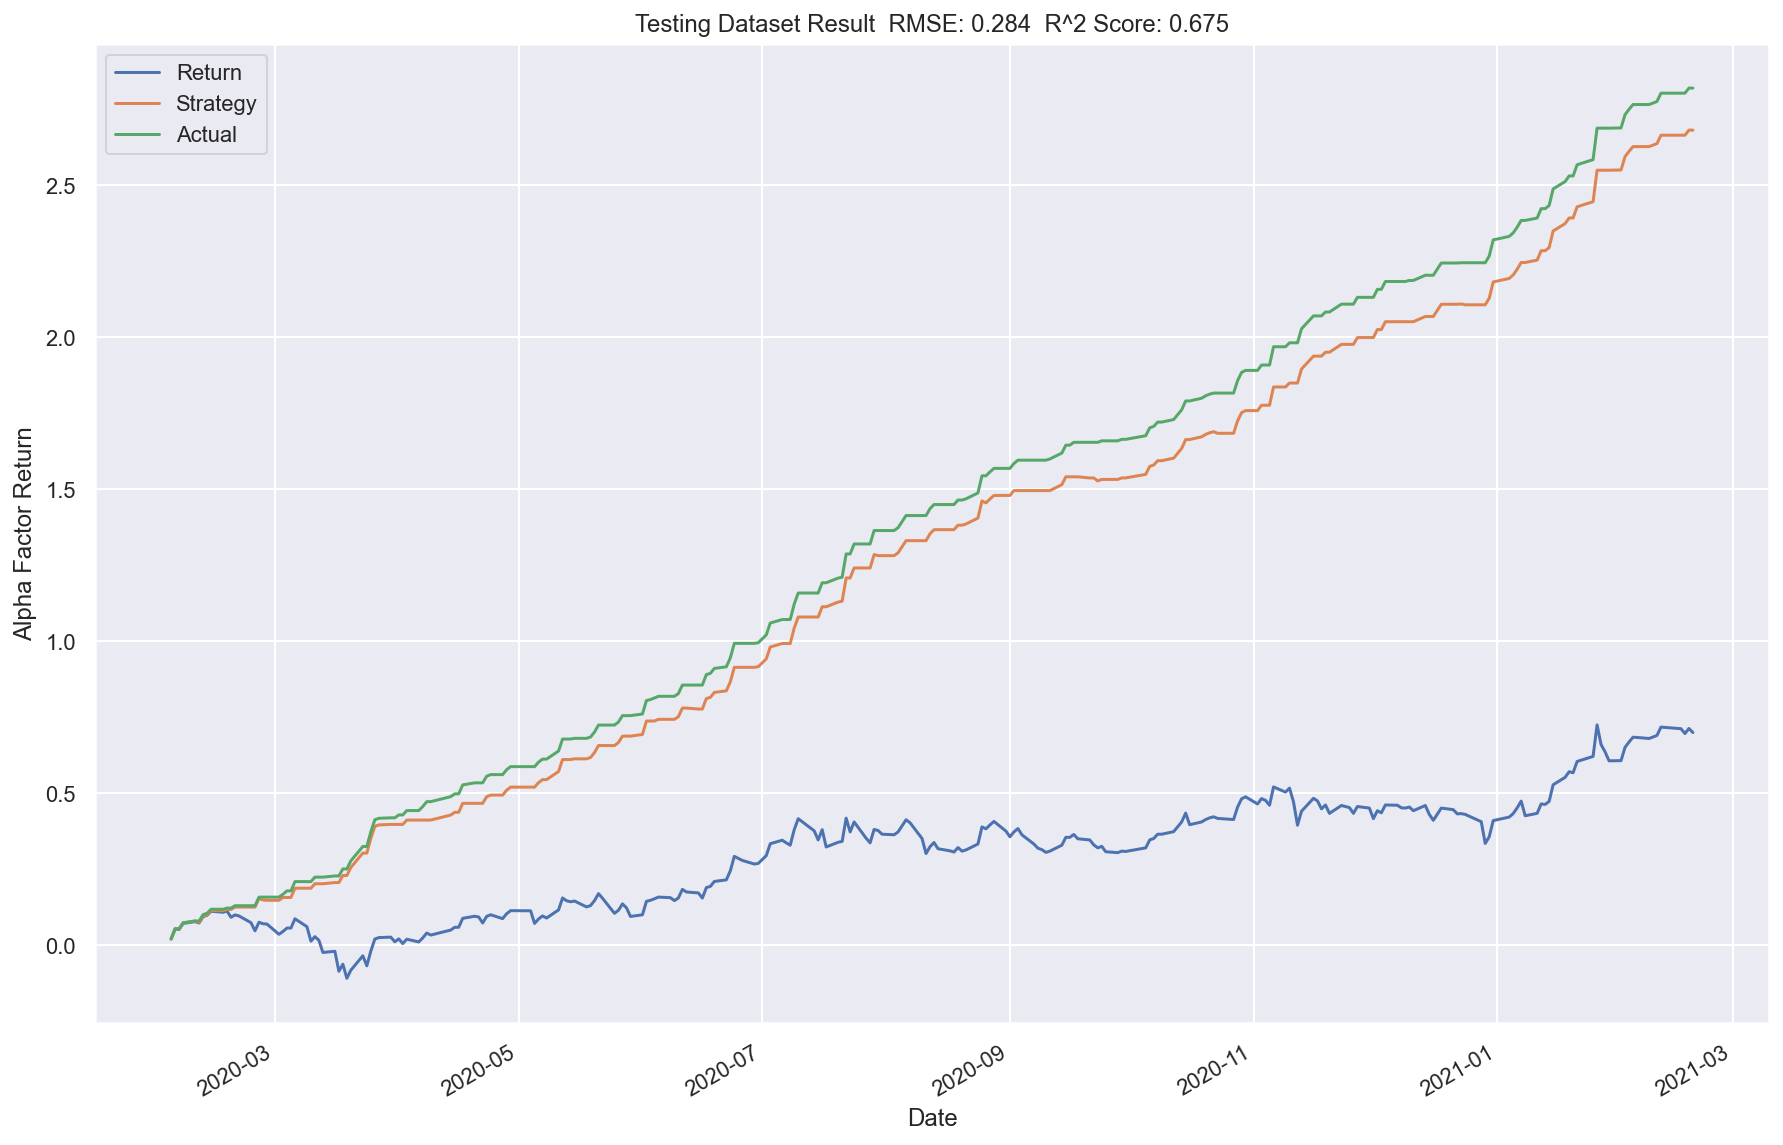

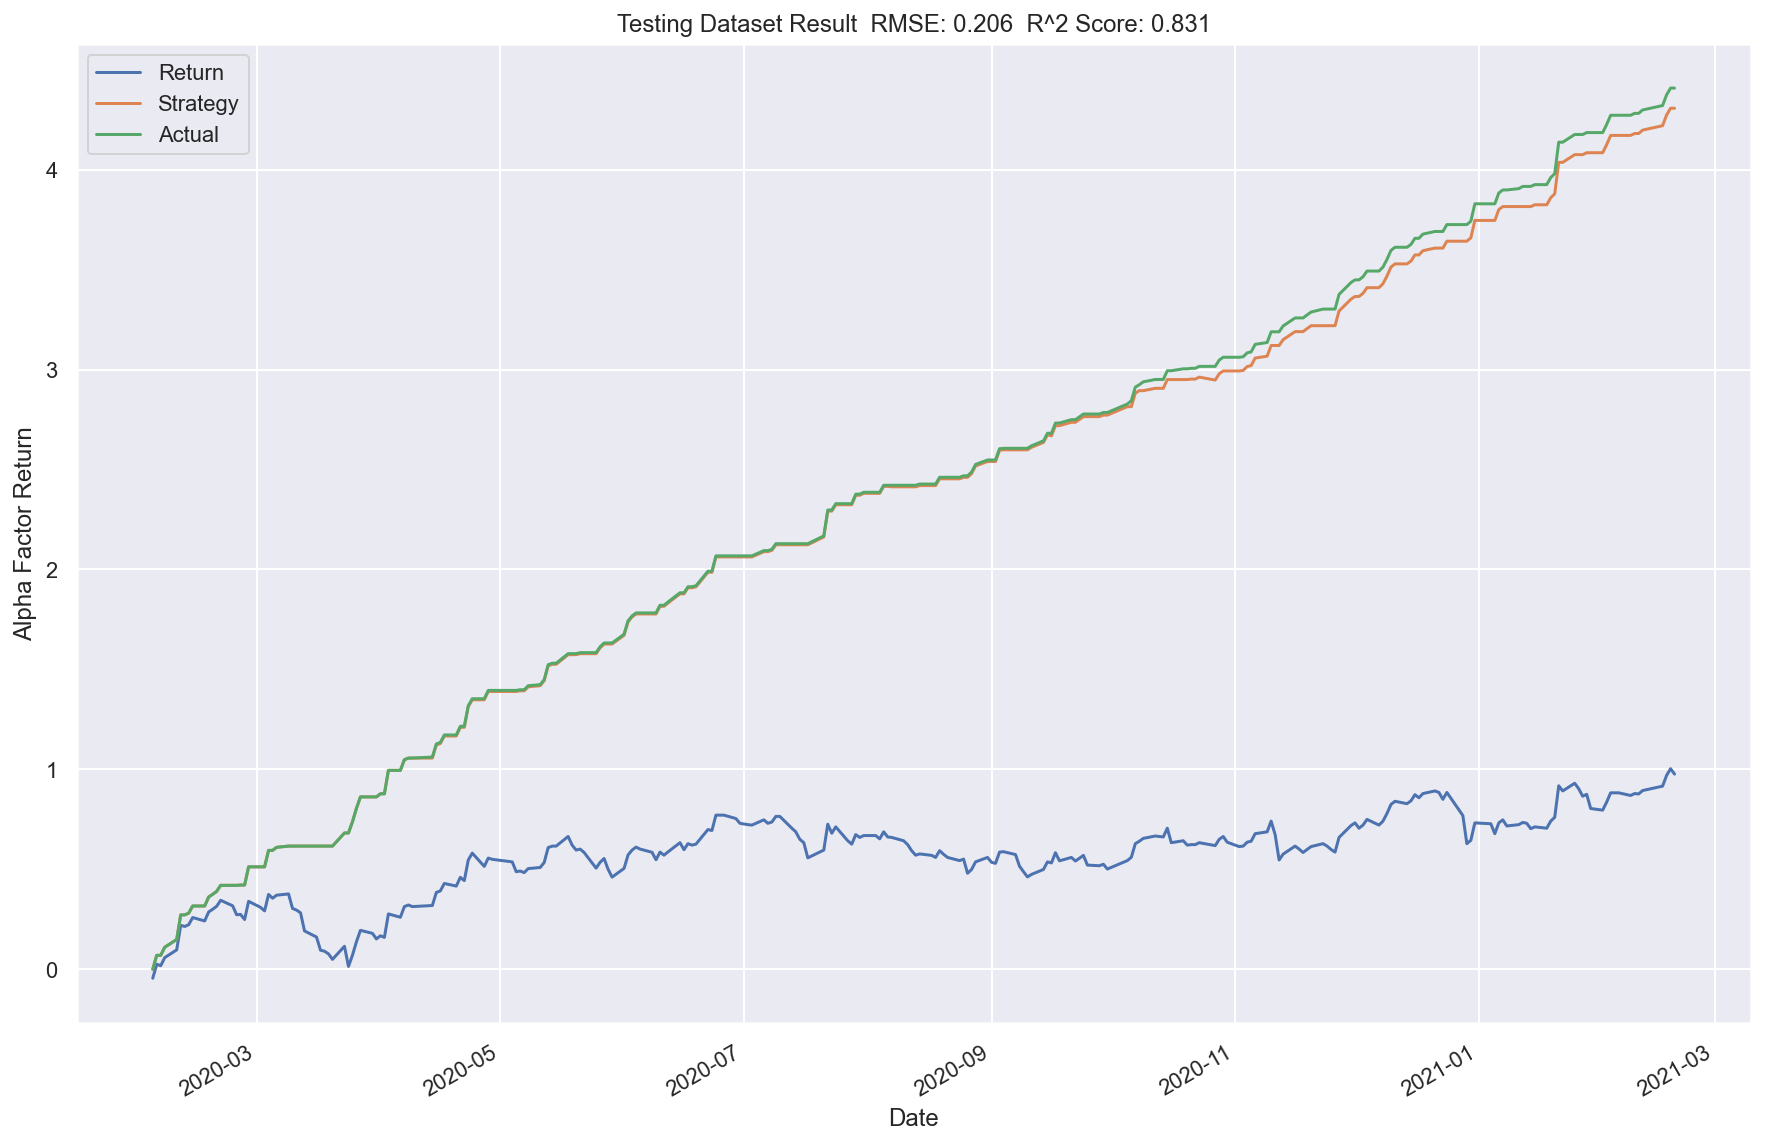

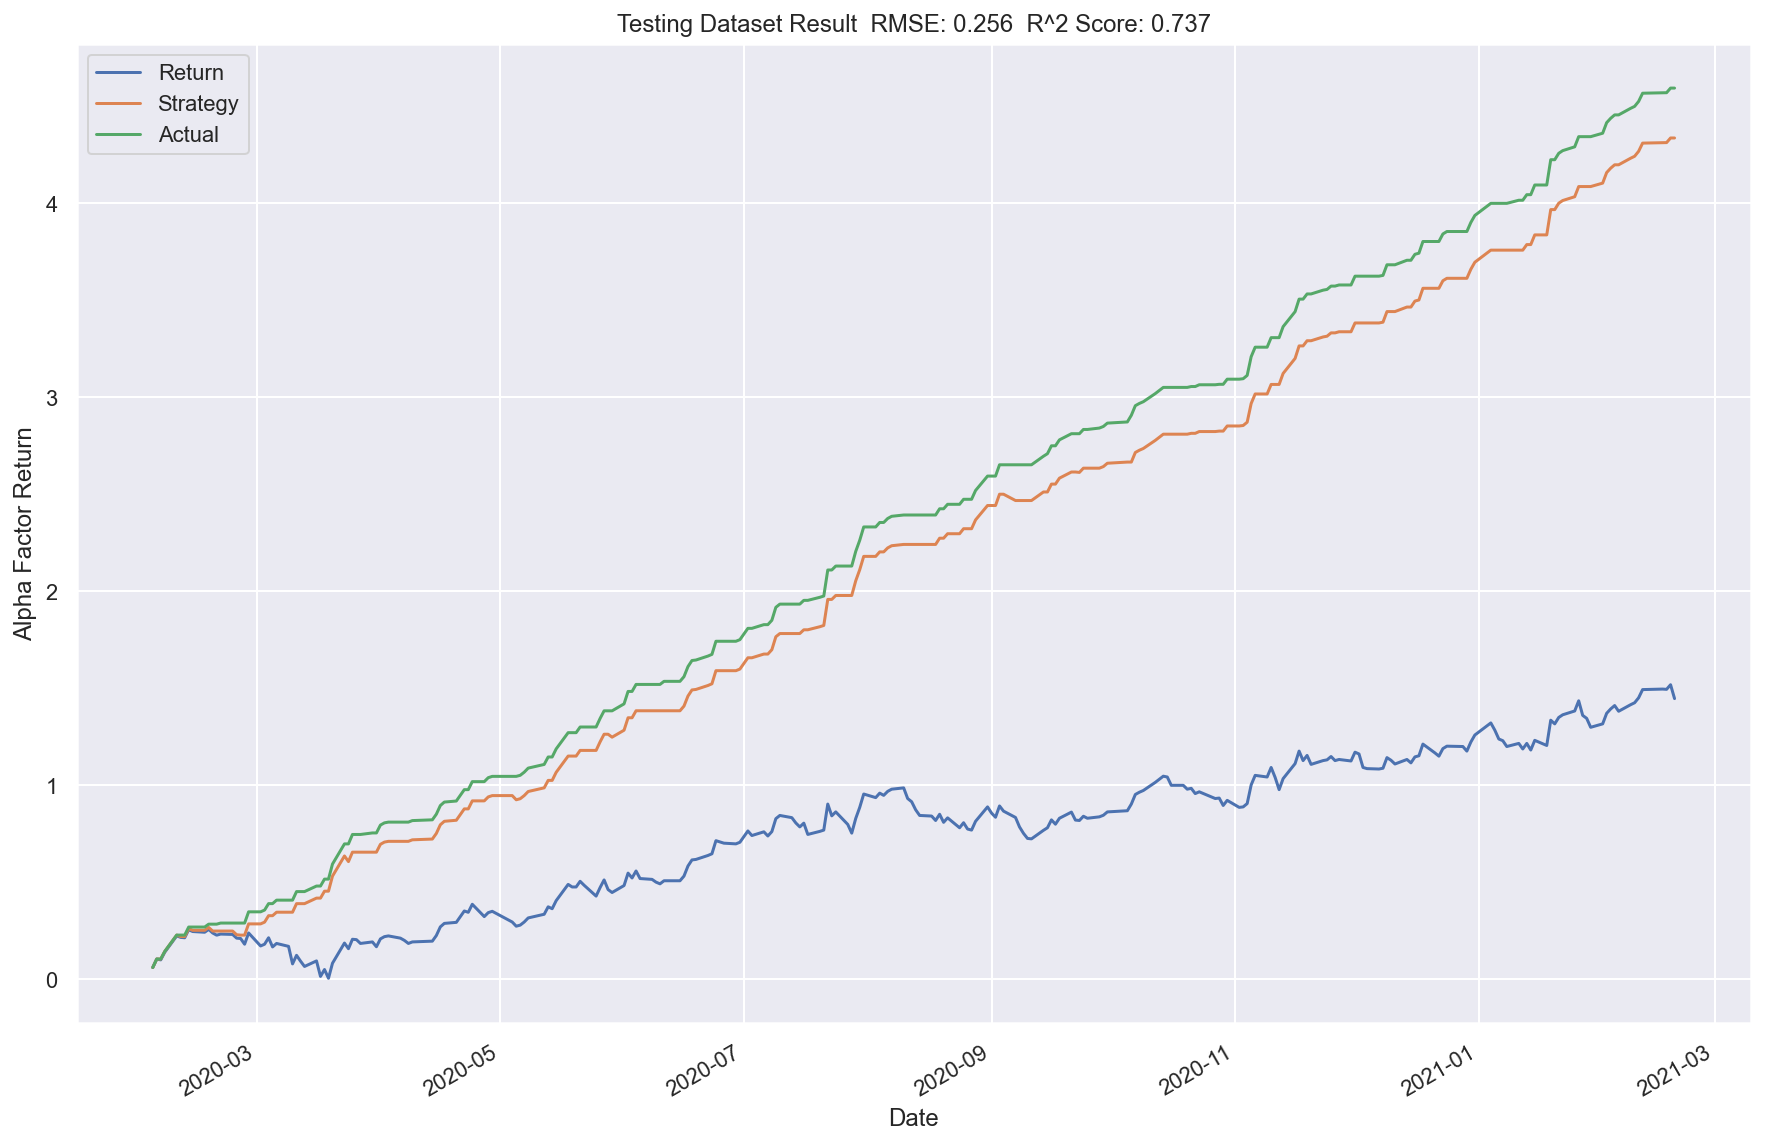

In [5]:
for Industries in Dict:
    for Symbol in Dict[Industries]:
        Result(Symbol)